# Assignment 1 Text Analysis


## Setting up the project

### Importing Libraries

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string



In [407]:
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Accessing the data

In [408]:

file_path = "Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools", "Appendix - tech tool examples"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0], engine = "openpyxl")
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1], engine = "openpyxl")
cc_df = pd.read_excel(file_path, sheet_name=sheets[4], engine = "openpyxl")
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2], engine = "openpyxl")
st_df = pd.read_excel(file_path, sheet_name=sheets[5], engine = "openpyxl")
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3], engine = "openpyxl")
tt_df = pd.read_excel(file_path, sheet_name=sheets[6], engine = "openpyxl")
tt_eg = pd.read_excel(file_path, sheet_name=sheets[7], engine = "openpyxl")


In [409]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
    ("tt_eg", tt_eg)
]

for name, df in df_list:
    print(f"{name} columns: )", df.info())
    print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB
occupation_df columns: ) None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value              

## Basic Data Pre-processing and Exploration

## Initial Exploratory Data Analysis

### EDA - Occupation List Dataframe

In [410]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [411]:
occupation_df.head()

Occupation Type  ANZSCO Code Sub-Profile Code  \
0        ANZSCO 4         1111              NaN   
1        ANZSCO 4         1112              NaN   
2        ANZSCO 4         1211              NaN   
3        ANZSCO 4         1213              NaN   
4        ANZSCO 4         1215              NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1                         General Managers   
2                      Aquaculture Farmers   
3                        Livestock Farmers   
4                   Broadacre Crop Growers   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  General Managers plan, organise, direct, contr...  
2  Aquaculture Farmers plan, organise, control, c...  
3  Livestock Farmers plan, organise, control, coo...  
4  Broadacre Crop Growers plan, organise, control...

In [412]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation'
 'NEC Category']


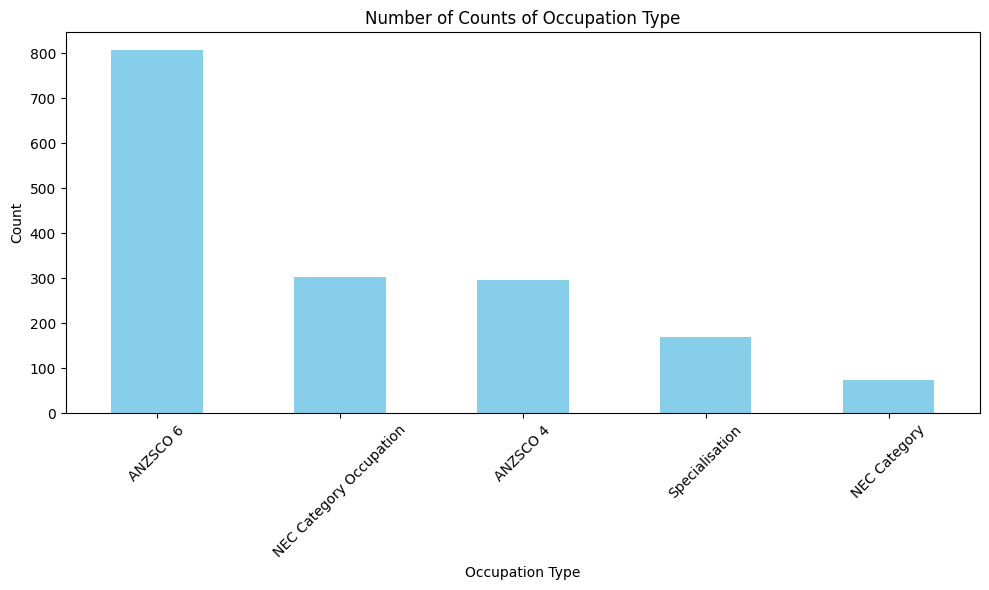

In [413]:
import matplotlib.pyplot as plt

# Count occurrences of each occupation type
occupation_counts = occupation_df['Occupation Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Number of Counts of Occupation Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [414]:
print("There are",occupation_df['ANZSCO Title'].count(), "different occupations listed")

There are 1650 different occupations listed


In [415]:
# Count occurrences of each ANZSCO Title
duplicate_counts = occupation_df['ANZSCO Title'].value_counts()

# Filter only titles that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if there are any duplicates and print results
if not duplicates.empty:
    print("Duplicated ANZSCO Titles and their counts:\n", duplicates)
else:
    print("There is no job duplication in the dataset.")


There is no job duplication in the dataset.


In [416]:
# Get unique occupation types where 'Sub-Profile Code' is not NaN
occupation_types_with_subprofile = occupation_df.loc[occupation_df['Sub-Profile Code'].notna(), 'Occupation Type'].unique()

# Display the results
print("Occupation Types with Sub-Profile Code:\n", occupation_types_with_subprofile)


Occupation Types with Sub-Profile Code:
 ['Specialisation' 'NEC Category Occupation']


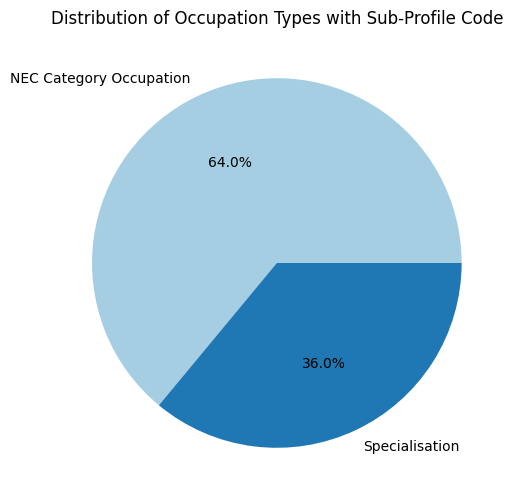

In [417]:
import matplotlib.pyplot as plt

# Count occurrences of each occupation type with Sub-Profile Code
occupation_counts = occupation_df.loc[occupation_df['Sub-Profile Code'].notna(), 'Occupation Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Add title
plt.title("Distribution of Occupation Types with Sub-Profile Code")

# Show the plot
plt.show()


In [418]:
# Count occurrences of each ANZSCO Title
duplicate_counts = occupation_df['ANZSCO Description'].value_counts()

# Filter only titles that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if there are any duplicates and print results
if not duplicates.empty:
    print("Duplicated ANZSCO Description and their counts:\n", duplicates)
else:
    print("There is no job description duplication in the dataset.")


# show example that even though there is no duplication but how even a small change (emu example) can cause this

There is no job description duplication in the dataset.


### EDA - Core Competency Dataframes
1. Core Competency Description
2. Core Competency Data

In [419]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [420]:
cc_desc_df.head()

Core Competency                        Core Competency Description  \
0  Digital engagement  Identifying and using technology (including ha...   
1  Digital engagement  Identifying and using technology (including ha...   
2  Digital engagement  Identifying and using technology (including ha...   
3  Digital engagement  Identifying and using technology (including ha...   
4  Digital engagement  Identifying and using technology (including ha...   

   Score Proficiency Level                                       Anchor Value  
0      1             Basic  Name and identify the purpose of familiar digi...  
1      2             Basic  Send a short and simple reply to an email comm...  
2      3             Basic                  Enter information into a database  
3      4      Intermediate  Recognise different ways to connect to the int...  
4      5      Intermediate  Build and maintain an effective online profile...

In [421]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


In [422]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [423]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


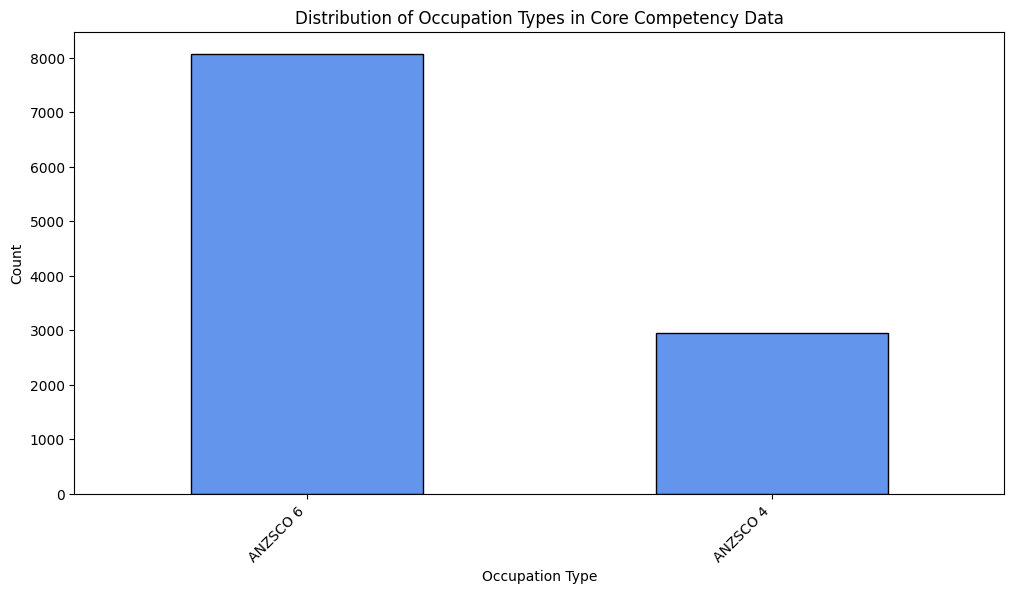

In [424]:
import matplotlib.pyplot as plt

# Count occurrences of each Occupation Type
occupation_type_counts = cc_df['Occupation Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
occupation_type_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Add labels and title
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Distribution of Occupation Types in Core Competency Data")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [425]:
cc_counts = cc_df.groupby("ANZSCO Title")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Titles have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Titles have more or less than 10 core competencies.")


✅ All ANZSCO Titles have exactly 10 core competencies.


### EDA - Specialist Task Dataframes
1. Specialist Task Hierarchy
2. Specialist Task Data

In [426]:
st_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Specialist Task     1686 non-null   object
 1   Specialist Cluster  1686 non-null   object
 2   Cluster Family      1686 non-null   object
 3   Skill Statement     1686 non-null   object
dtypes: object(4)
memory usage: 52.8+ KB


In [427]:
st_hier_df.head()

Specialist Task  \
0  Advise others on farming or forestry operation...   
1  Estimate labour or resource requirements for f...   
2         Promote agricultural or hunting activities   
3                       Develop agricultural methods   
4   Evaluate quality or condition of plants or crops   

                         Specialist Cluster           Cluster Family  \
0  Direct or advise on agricultural matters  Agriculture and animals   
1  Direct or advise on agricultural matters  Agriculture and animals   
2  Direct or advise on agricultural matters  Agriculture and animals   
3    Manage agricultural processes or tasks  Agriculture and animals   
4    Manage agricultural processes or tasks  Agriculture and animals   

                                     Skill Statement  
0  Provide advice about managing farms and forest...  
1  Calculate or estimate labour, equipment, and r...  
2  Raise awareness of agricultural practices and ...  
3  Develop or design new or improved agricultural...  
4  Judge the physical quality, health and conditi...

In [428]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


In [429]:
!pip install squarify

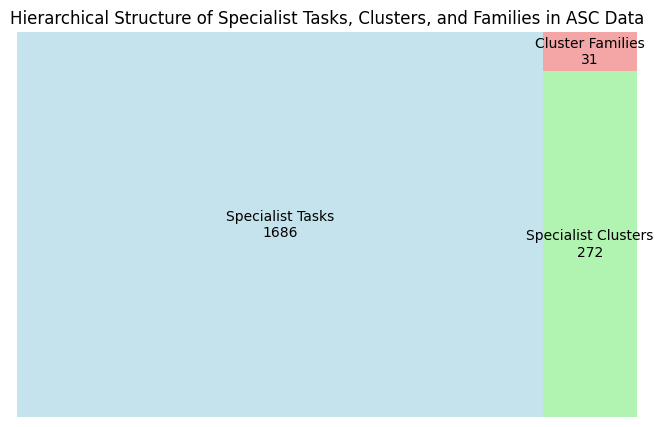

In [430]:
import squarify  # Treemap library

# Define sizes in reverse
counts = {
    "Specialist Tasks": st_hier_df['Specialist Task'].nunique(),
    "Specialist Clusters": st_hier_df['Specialist Cluster'].nunique(),
    "Cluster Families": st_hier_df['Cluster Family'].nunique(),
}

# Define labels with values
labels = [f"{key}\n{value}" for key, value in counts.items()]

# Plot treemap
plt.figure(figsize=(8, 5))
squarify.plot(sizes=counts.values(), label=labels, color=["lightblue", "lightgreen", "lightcoral"], alpha=0.7)

# Add title
plt.title("Hierarchical Structure of Specialist Tasks, Clusters, and Families in ASC Data")

# Show plot
plt.axis("off")
plt.show()


<ipython-input-431-5ba7527c6a85>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families, palette='viridis')


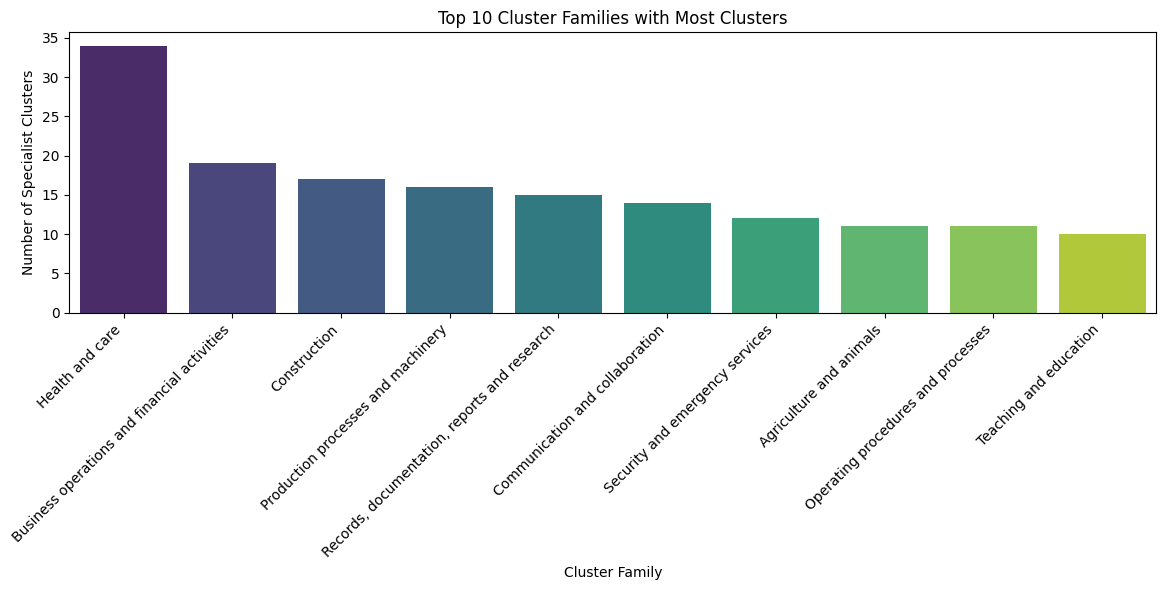

In [431]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by Cluster Family and count the number of Specialist Clusters
cluster_family_counts = st_hier_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()

# Step 2: Sort by the number of clusters in descending order
cluster_family_counts = cluster_family_counts.sort_values(by='Specialist Cluster', ascending=False)

# Step 3: Select the top 10 cluster families with the most clusters
top_10_cluster_families = cluster_family_counts.head(10)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


In [432]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [433]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1575 different occupations listed


<ipython-input-434-0dee8559d0aa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')


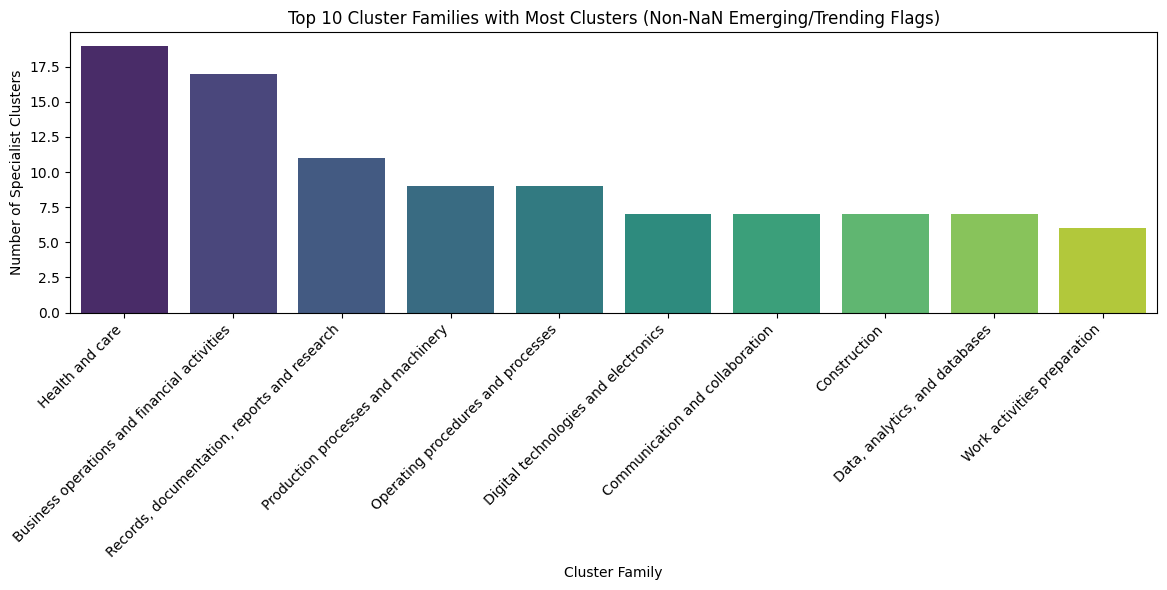

In [434]:
# Step 1: Filter the data where Emerging/Trending Flags is not NaN
filtered_df = st_df[st_df['Emerging/\nTrending Flag'].notna()]

# Step 2: Group by Cluster Family and count the number of Specialist Clusters
cluster_family_counts_filtered = filtered_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()

# Step 3: Sort by the number of clusters in descending order
cluster_family_counts_filtered = cluster_family_counts_filtered.sort_values(by='Specialist Cluster', ascending=False)

# Step 4: Select the top 10 cluster families with the most clusters
top_10_cluster_families_filtered = cluster_family_counts_filtered.head(10)

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters (Non-NaN Emerging/Trending Flags)')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


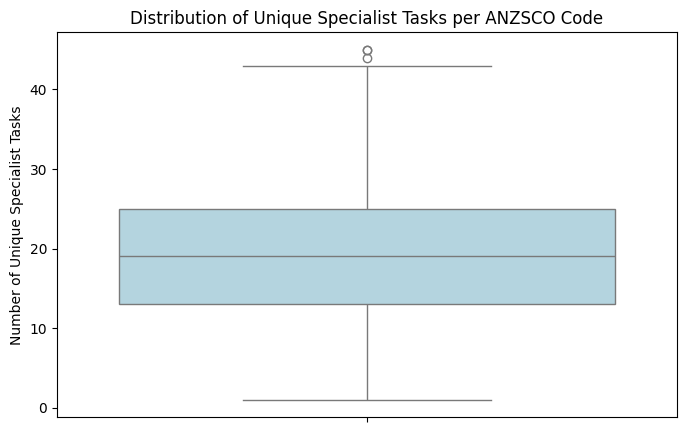

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")

# Show plot
plt.show()


In [436]:
# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = st_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              Systems Administrator   
1       313113                                  Web Administrator   
2       249212                    Dance Teacher (Private Tuition)   
3         2412                            Primary School Teachers   
4       241213                             Primary School Teacher   
5       263111              Computer Network and Systems Engineer   
6       322313                               Welder (First Class)   
7         2413  Middle School Teachers / Intermediate School T...   
8       241311  Middle School Teacher / Intermediate School Te...   
9       262111                             Database Administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


### EDA - Technology Tools Dataframes
1. Technology Tools Hierarchy
2. Technology Tools Data

In [437]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [438]:
tt_hier_df.head()

Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4                         Communication technologies   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4   Data, voice and/or video communication platforms   

                           Technology Tool  \
0  Collaborative news production platforms   
1          Music or sound editing software   
2                 Sound and audio hardware   
3      Video creation and editing software   
4        Audio/video conferencing software   

                         Technology Tool Description  \
0  Software used to create and manage news conten...   
1  Software used to create, manipulate, and edit ...   
2  Apparatus used to create, manipulate, mix and/...   
3  Software used to create and edit digital video...   
4  Software for collaboration using video or audi...   

                Technology Tool Extended Description  
0  Collaborative news production platforms encomp...  
1  Music and sound editing software incorporates ...  
2  Hardware and equipment used to generate electr...  
3  Video creation and editing software enables th...  
4  Audio/video conferencing software enables peop...

In [439]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())




The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


<ipython-input-440-38c09ba31622>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')


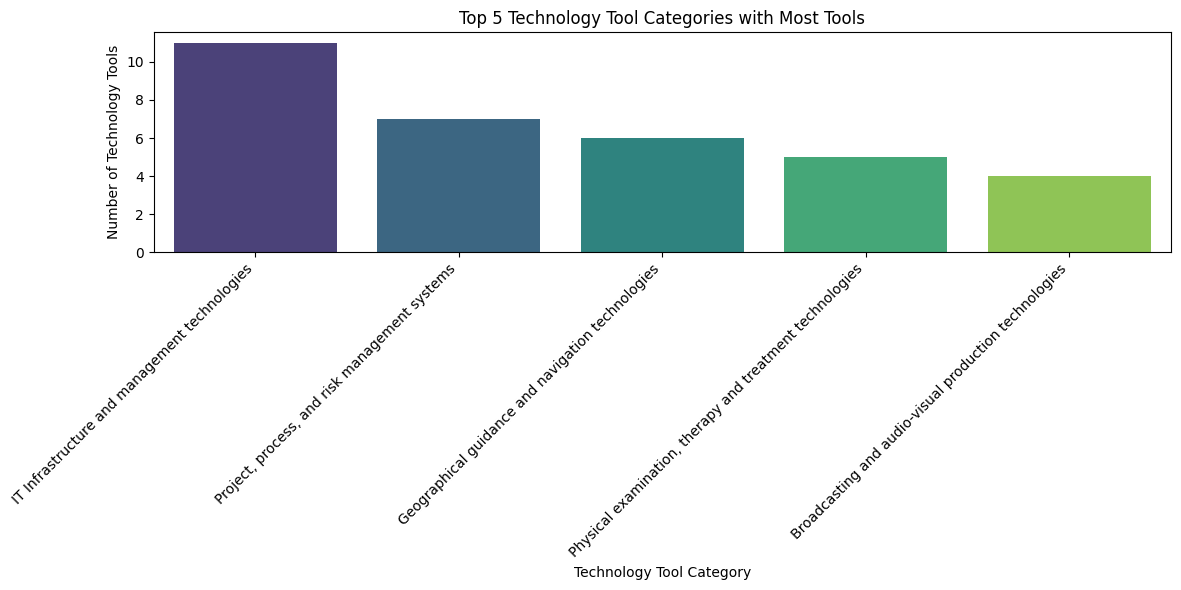

In [440]:
category_tool_counts = tt_hier_df.groupby('Technology Tool Category')['Technology Tool'].nunique().reset_index()

# Step 2: Sort by the number of tools in descending order
category_tool_counts = category_tool_counts.sort_values(by='Technology Tool', ascending=False)

# Step 3: Select the top 5 categories with the most tools
top_5_categories = category_tool_counts.head(5)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Technology Tool Categories with Most Tools')
plt.xlabel('Technology Tool Category')
plt.ylabel('Number of Technology Tools')
plt.tight_layout()
plt.show()

In [441]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [442]:
tt_df.head()

Occupation Type  ANZSCO Code Sub-Profile Code  \
0        ANZSCO 4         1111              NaN   
1        ANZSCO 4         1111              NaN   
2        ANZSCO 4         1111              NaN   
3        ANZSCO 4         1111              NaN   
4        ANZSCO 4         1111              NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1  Chief Executives and Managing Directors   
2  Chief Executives and Managing Directors   
3  Chief Executives and Managing Directors   
4  Chief Executives and Managing Directors   

                                     Technology Tool Emerging/Trending Flag  
0        Accounting and financial management systems                    NaN  
1                  Audio/video conferencing software                    NaN  
2  Business intelligence and decision support sof...                    NaN  
3                    Flow chart and diagram software                    NaN  
4                           Human resources software                    NaN

In [443]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1317 different occupations listed


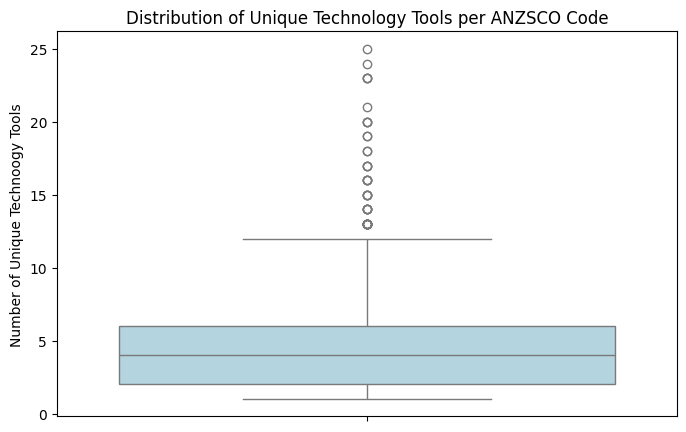

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")

# Show plot
plt.show()


In [445]:
# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = tt_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             Database Administrator   
1         2611                  ICT Business and Systems Analysts   
2       262113                              Systems Administrator   
3       263111              Computer Network and Systems Engineer   
4       263212                               ICT Support Engineer   
5         2621  Database and Systems Administrators, and ICT S...   
6       135199                                    Network Manager   
7       261111                               ICT Business Analyst   
8       263112                              Network Administrator   
9       261313                                  Software Engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


In [446]:
tt_eg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Technology Tool          712 non-null    object
 1   Technology Tool Example  712 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


Top 10 Technology Tools with the Most Technology Tool Examples:
                                    Technology Tool  Technology Tool Example
79                 Science and engineering software                      157
85           Statistical and data analysis software                       58
81                           Scientific instruments                       27
2   Alternative and complementary therapy equipment                       12
92                                 Wearable devices                       11
73            Quotation and cost modelling software                       11
71                      Project management software                       10
48           IT network and backbone infrastructure                        9
3             Application and load testing software                        8
76                   Regulatory compliance software                        8


<ipython-input-447-ed63de03c6fc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')


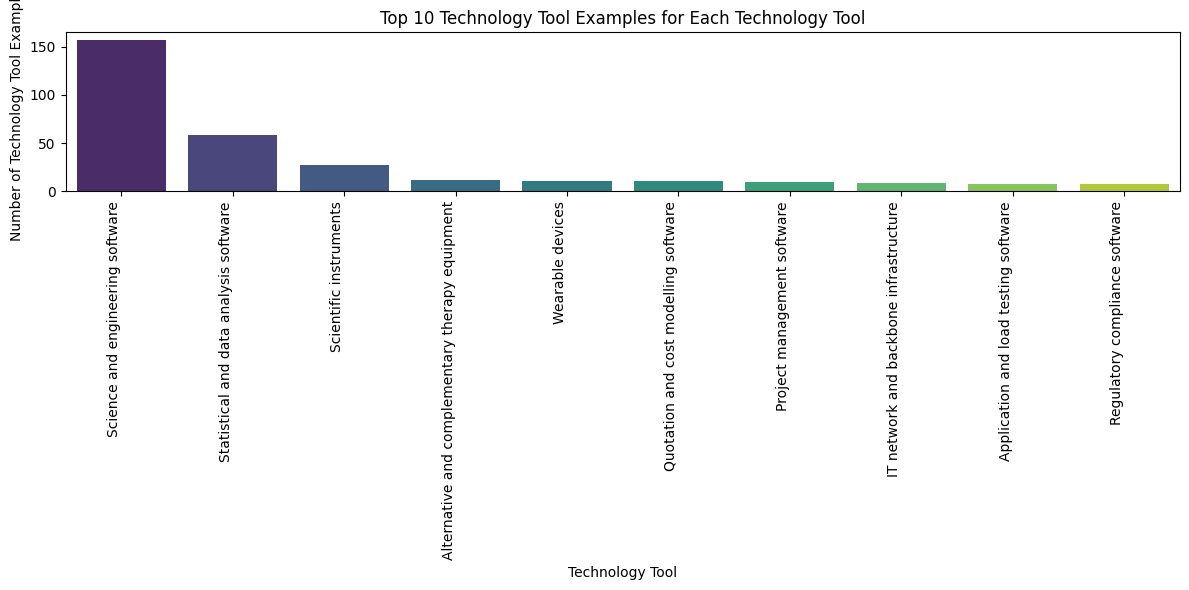

In [447]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Technology Tool' and count the number of 'Technology Tool Example'
tool_example_counts = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Sort by the number of Technology Tool Examples in descending order and get the top 10
top_10_tool_example_counts = tool_example_counts.sort_values(by='Technology Tool Example', ascending=False).head(10)

# Step 3: Display the table for top 10
print("Top 10 Technology Tools with the Most Technology Tool Examples:")
print(top_10_tool_example_counts)

# Step 4: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Technology Tool Examples for Each Technology Tool')
plt.xlabel('Technology Tool')
plt.ylabel('Number of Technology Tool Examples')
plt.tight_layout()
plt.show()


In [448]:
# Step 1: Group by 'Technology Tool' and count the unique 'Technology Tool Example'
tt_eg_count_df = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Rename the columns for clarity (optional)
tt_eg_count_df.columns = ['Technology Tool', 'Technology Tool Example Count']

# Display the new DataFrame
print(tt_eg_count_df.head())  # Show the first few rows of the new DataFrame


                                   Technology Tool  \
0      Accounting and financial management systems   
1       Air, space, or watercraft guidance systems   
2  Alternative and complementary therapy equipment   
3            Application and load testing software   
4                      Application server software   

   Technology Tool Example Count  
0                              5  
1                              5  
2                             12  
3                              8  
4                              5  


## Merging Relevent Dataframes
1. This helps segmentise the project into 3 different approaches to answer multiple ASC related question

In [449]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:")
    print(merged_df.head())
    return merged_df



tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Title")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Title")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                   

In [450]:
# Step 1: Merge the DataFrames on 'Technology Tool'
tt_merged_df = pd.merge(tt_merged_df, tt_eg_count_df, on='Technology Tool', how='left')

# Step 2: Display the merged DataFrame
print("Merged DataFrame:")
print(tt_merged_df.head())  # Display the first few rows of the merged DataFrame


Merged DataFrame:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                         Techno

In [451]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  Occupation Type_y                     5736 non-null   object 
 11  ANZSCO Code_y    

In [452]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  Specialist Cluster_y         30450 non-null  object 
 13  Cluster Family_y

In [453]:
def merge_cc_df(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df


cc_merged_df = merge_cc_df(cc_df, cc_desc_df, occupation_df)


Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      In

In [454]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

### Tech Tools Merged Analysis

In [455]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  Occupation Type_y                     5736 non-null   object 
 11  ANZSCO Code_y    

In [457]:
tt_merged_df.drop(columns=[ "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Code_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code_x', 'Sub-Profile Code_x', 'ANZSCO Title',
       'Emerging/Trending Flag', 'ANZSCO Description',
       'Technology Tool Example Count'],
      dtype='object')

In [458]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  ANZSCO Description                    5736 non-null   object 
 11  Technology Tool E

In [459]:
tt_merged_df.head()

Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                         Technology Tool Description  \
0  Software used to create and manage news conten...   
1  Software used to create and manage news conten...   
2  Software used to create and manage news conten...   
3  Software used to create and manage news conten...   
4  Software used to create and manage news conten...   

                Technology Tool Extended Description Occupation Type_x  \
0  Collaborative news production platforms encomp...          ANZSCO 4   
1  Collaborative news production platforms encomp...          ANZSCO 4   
2  Collaborative news production platforms encomp...          ANZSCO 6   
3  Collaborative news production platforms encomp...          ANZSCO 6   
4  Collaborative news production platforms encomp...          ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0           2123                NaN   
1           2124                NaN   
2         212113                NaN   
3         212312                NaN   
4         212315                NaN   

                                  ANZSCO Title Emerging/Trending Flag  \
0  Film, Television, Radio and Stage Directors                    NaN   
1                Journalists and Other Writers                    NaN   
2                              Radio Presenter                    NaN   
3  Director (Film, Television, Radio or Stage)                    NaN   
4       Program Director (Television or Radio)                    NaN   

                                  ANZSCO Description  \
0  Film, Television, Radio and Stage Directors di...   
1  Journalists and Other Writers research and com...   
2  Prepares and presents news, sports or other in...   
3  Interprets and approves selection of scripts, ...   
4  Compiles and directs programs for television o...   

   Technology Tool Example Count  
0                            5.0  
1                            5.0  
2                            5.0  
3                            5.0  
4                            5.0

In [464]:
tt_merged_df.sort_values(by="ANZSCO Title", inplace=True)
tt_merged_df.head()

Technology Tool Category  \
2137  Geographical guidance and navigation technologies   
1842  Geographical guidance and navigation technologies   
1950  Geographical guidance and navigation technologies   
3687             Logistics and fleet management systems   
4195    Payroll and human resource management platforms   

                   Technology Tool Category Description  \
2137  Systems for real-time navigation, mapping and ...   
1842  Systems for real-time navigation, mapping and ...   
1950  Systems for real-time navigation, mapping and ...   
3687  Systems for logistics, vehicle despatch, and f...   
4195  Systems to undertake human resource management...   

                                Technology Tool  \
2137                           Mapping software   
1842  Aviation and marine communication systems   
1950            GPS and navigation technologies   
3687               Barcode reading technologies   
4195                   Human resources software   

                            Technology Tool Description  \
2137             Software used to create and edit maps.   
1842  Radio and communications apparatus that enable...   
1950  Devices or software that receive and provide G...   
3687  Apparatus that reads 2D and 3D barcode typolog...   
4195  Software and systems used to manage employee a...   

                   Technology Tool Extended Description  \
2137  Mapping software encompasses software and tool...   
1842  Aviation and marine communication systems enco...   
1950  GPS and navigation technologies encompasses th...   
3687  Barcode reading technologies encompasses the r...   
4195  Human resources software encompasses software ...   

            Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
2137           Specialisation         399911                S01   
1842           Specialisation         399911                S01   
1950           Specialisation         399911                S01   
3687  NEC Category Occupation         149999                N01   
4195  NEC Category Occupation         149999                N01   

          ANZSCO Title Emerging/Trending Flag  \
2137     Abalone Diver                    NaN   
1842     Abalone Diver                    NaN   
1950     Abalone Diver                    NaN   
3687  Abattoir Manager                    NaN   
4195  Abattoir Manager                    NaN   

                                     ANZSCO Description  \
2137  Commercially harvests abalone from underwater ...   
1842  Commercially harvests abalone from underwater ...   
1950  Commercially harvests abalone from underwater ...   
3687  Directly supervise and coordinate the activiti...   
4195  Directly supervise and coordinate the activiti...   

      Technology Tool Example Count  
2137                            5.0  
1842                            2.0  
1950                            5.0  
3687                            5.0  
4195                            5.0

<ipython-input-465-9718f6bf499a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")


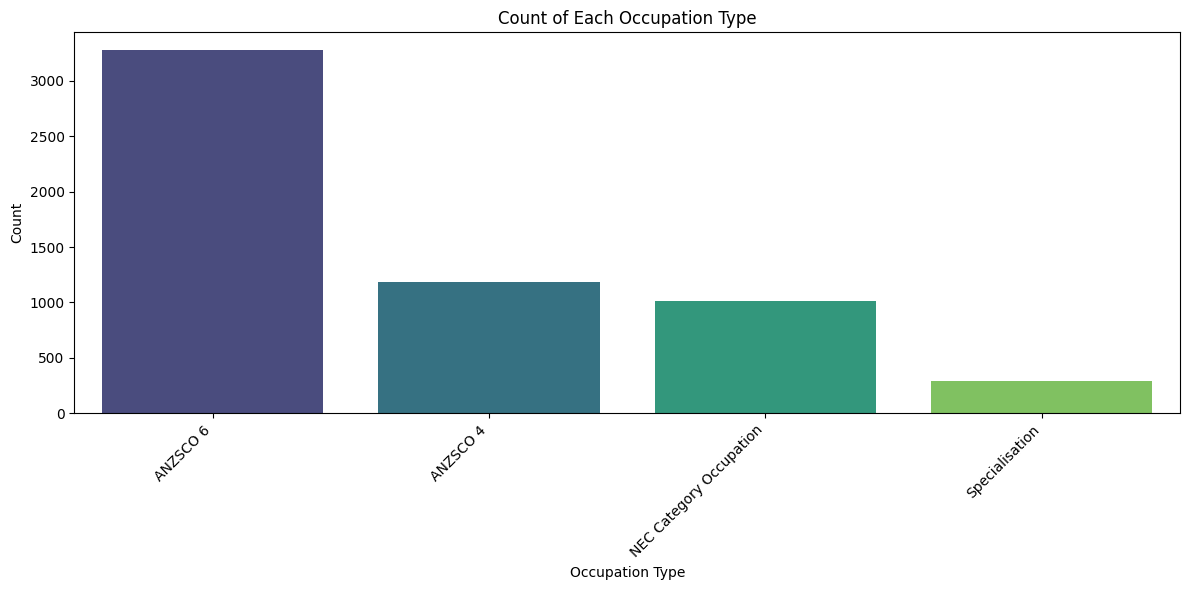

In [465]:
# Count the number of occurrences of each 'Occupation Type_x'
occupation_type_counts = tt_merged_df['Occupation Type_x'].value_counts()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')
plt.tight_layout()
plt.show()


<ipython-input-496-8a401ba5732f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_top10, palette='viridis')


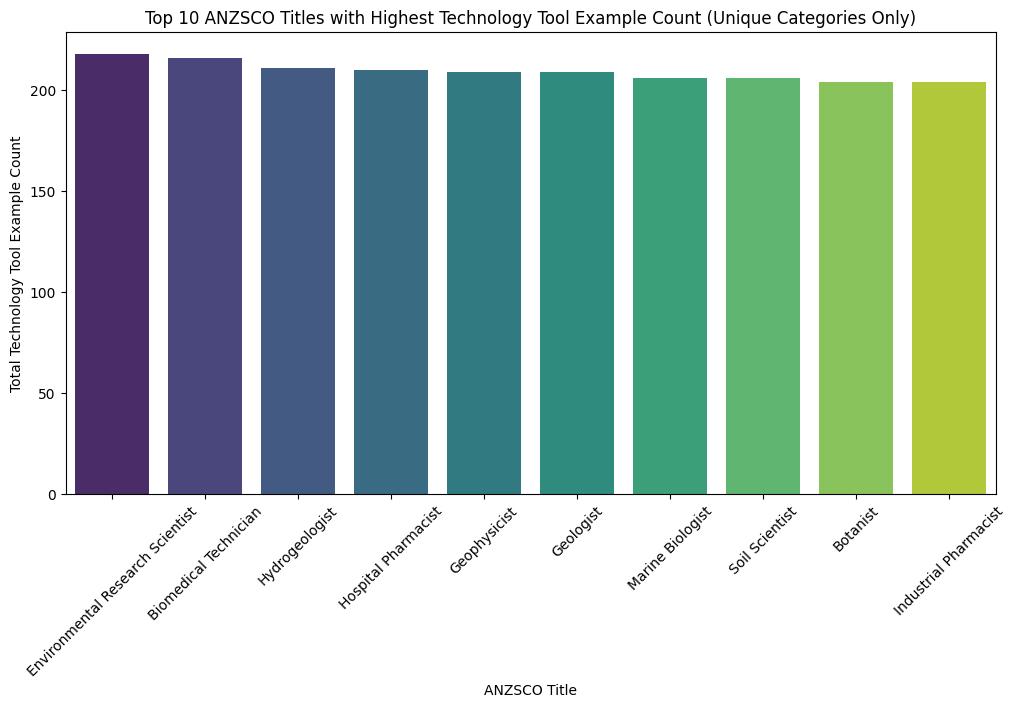

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove duplicates to get unique tool categories per ANZSCO Title
unique_tools_per_title = tt_merged_df.drop_duplicates(subset=['ANZSCO Title', 'Technology Tool Category'])

# Step 2: Sum the Technology Tool Example Count per ANZSCO Title
anzsco_grouped = (
    unique_tools_per_title.groupby('ANZSCO Title')['Technology Tool Example Count']
    .sum()
    .reset_index()
)

# Step 3: Sort by count and take the top 10
anzsco_top10 = anzsco_grouped.sort_values(by='Technology Tool Example Count', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_top10, palette='viridis')

# Labels and title
plt.title('Top 10 ANZSCO Titles with Highest Technology Tool Example Count (Unique Categories Only)')
plt.xlabel('ANZSCO Title')
plt.ylabel('Total Technology Tool Example Count')
plt.xticks(rotation=45)

# Show plot
plt.show()


<ipython-input-497-f3f19ff7d4ef>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_bot10, palette='viridis')


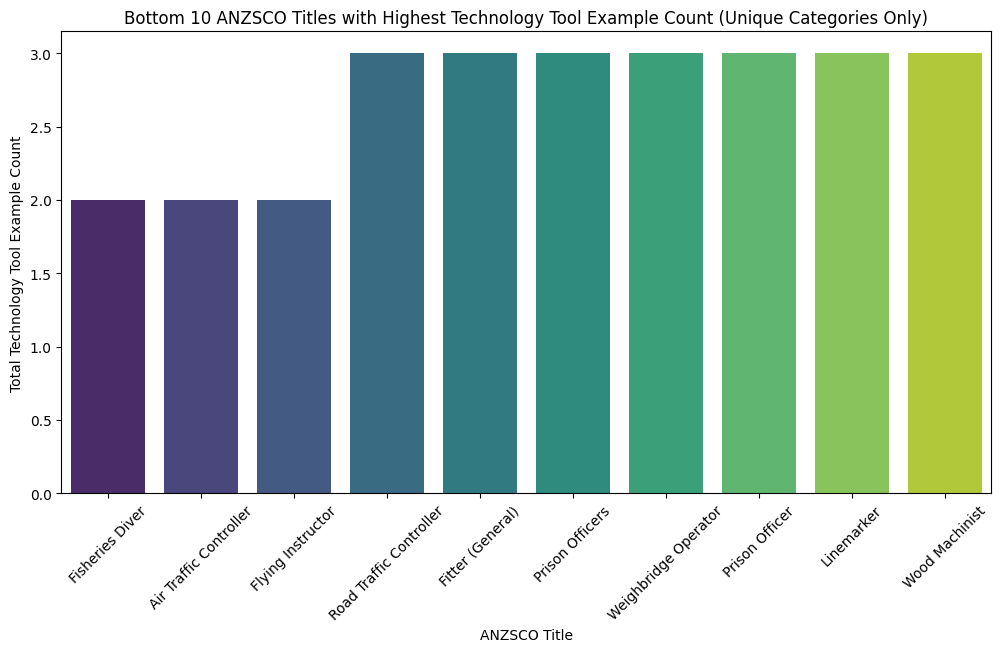

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove duplicates to get unique tool categories per ANZSCO Title
unique_tools_per_title = tt_merged_df.drop_duplicates(subset=['ANZSCO Title', 'Technology Tool Category'])

# Step 2: Sum the Technology Tool Example Count per ANZSCO Title
anzsco_grouped = (
    unique_tools_per_title.groupby('ANZSCO Title')['Technology Tool Example Count']
    .sum()
    .reset_index()
)

# Step 3: Sort by count and take the top 10
anzsco_bot10 = anzsco_grouped.sort_values(by='Technology Tool Example Count', ascending=True).head(10)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_bot10, palette='viridis')

# Labels and title
plt.title('Bottom 10 ANZSCO Titles with Highest Technology Tool Example Count (Unique Categories Only)')
plt.xlabel('ANZSCO Title')
plt.ylabel('Total Technology Tool Example Count')
plt.xticks(rotation=45)

# Show plot
plt.show()


<ipython-input-498-f9c931d74a82>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="viridis")


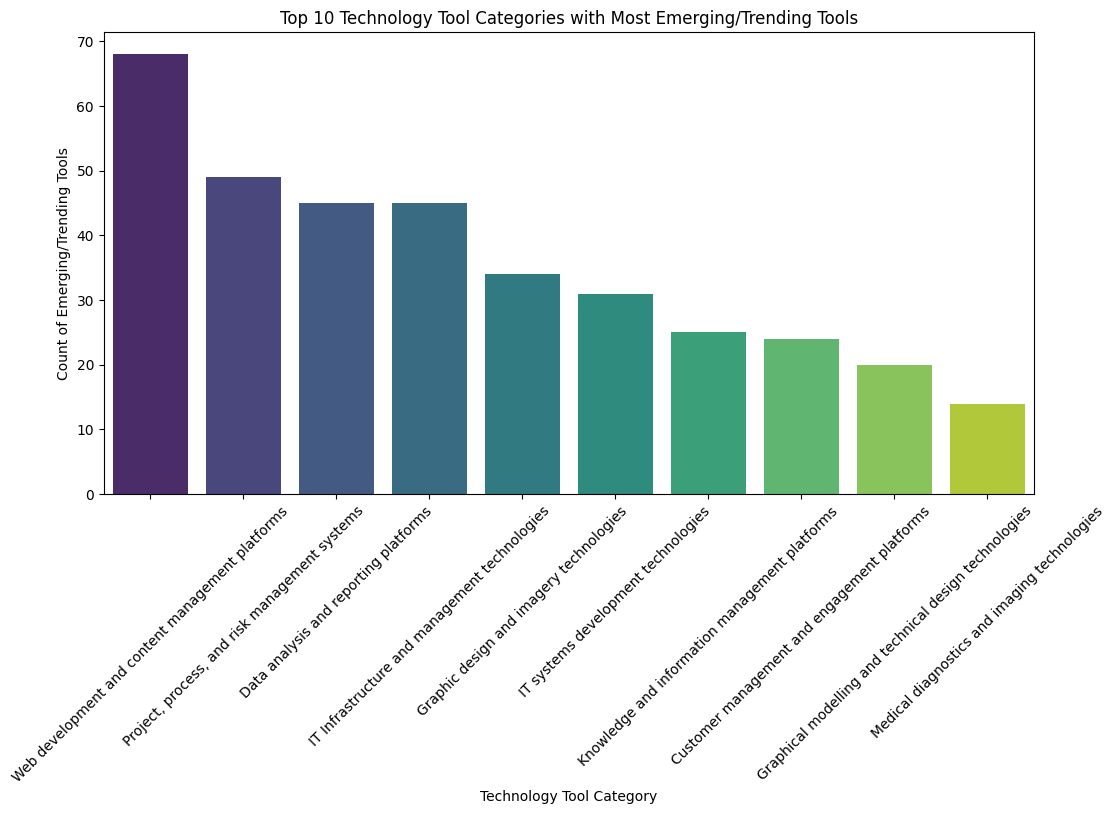

In [498]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Filter rows where 'Emerging/Trending Flag' is not null
emerging_df = tt_merged_df[tt_merged_df['Emerging/Trending Flag'].notnull()]

# Count the occurrences of each 'Technology Tool Category' in the emerging rows
category_counts = emerging_df['Technology Tool Category'].value_counts()

# Get the top 10 technology tool categories with the most emerging/trending tools
top_10_categories = category_counts.head(10)

# Plot the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Technology Tool Category")
plt.ylabel("Count of Emerging/Trending Tools")
plt.title("Top 10 Technology Tool Categories with Most Emerging/Trending Tools")
plt.show()


### Specialised Task Merged Analysis

In [499]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/Trending Flag       1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  Specialist Cluster_y         30450 non-null  object 
 13  Cluster Family_y

In [562]:
st_merged_df = st_merged_df.rename(columns={'Emerging/\nTrending Flag': 'Emerging/Trending Flag'})
st_merged_df.drop(columns=[ "Sub-Profile Code_y", "Specialist Cluster_y", "Cluster Family_y" , "ANZSCO Code_y", "Occupation Type_y", "Skill Statement" ], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code_x', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Specialist Task', '% of time spent on task',
       'Emerging/Trending Flag', 'Specialist Cluster_x',
       ' % of time spent on cluster', 'Cluster Family_x',
       '% of time spent on family', 'Skills Statement', 'ANZSCO Description'],
      dtype='object')

In [563]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/Trending Flag       1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  ANZSCO Description           30450 non-null  object 
dtypes: float64(3), i

In [564]:
st_merged_df.head()

Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
0          ANZSCO 4           1111                NaN   
1          ANZSCO 4           1111                NaN   
2          ANZSCO 4           1111                NaN   
3          ANZSCO 4           1111                NaN   
4          ANZSCO 4           1111                NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1  Chief Executives and Managing Directors   
2  Chief Executives and Managing Directors   
3  Chief Executives and Managing Directors   
4  Chief Executives and Managing Directors   

                                     Specialist Task  % of time spent on task  \
0  Direct or manage financial activities or opera...                   0.1302   
1     Direct department or organisational activities                   0.1117   
2  Direct sales, marketing or customer service ac...                   0.0808   
3  Communicate with others to arrange, coordinate...                   0.0665   
4  Analyse data to assess operational or project ...                   0.0651   

  Emerging/Trending Flag                               Specialist Cluster_x  \
0                    NaN  Manage, monitor and undertake financial activi...   
1               Trending               Manage services, staff or activities   
2                    NaN               Manage services, staff or activities   
3                    NaN             Communicate or collaborate with others   
4                    NaN           Use data to inform operational decisions   

    % of time spent on cluster                              Cluster Family_x  \
0                       0.1644  Business operations and financial activities   
1                       0.2128  Business operations and financial activities   
2                       0.2128  Business operations and financial activities   
3                       0.0750               Communication and collaboration   
4                       0.1009                Data, analytics, and databases   

   % of time spent on family  \
0                     0.5322   
1                     0.5322   
2                     0.5322   
3                     0.0890   
4                     0.1370   

                                    Skills Statement  \
0  Direct and oversee the financial operations of...   
1  Direct and oversee the activities of a work un...   
2  Direct and oversee the sales, marketing, or cu...   
3  Coordinate with others in order to plan, organ...   
4  Analyse qualitative and quantitative data aris...   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  Chief Executives and Managing Directors determ...  
2  Chief Executives and Managing Directors determ...  
3  Chief Executives and Managing Directors determ...  
4  Chief Executives and Managing Directors determ...

<ipython-input-565-eaf08294aa8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")


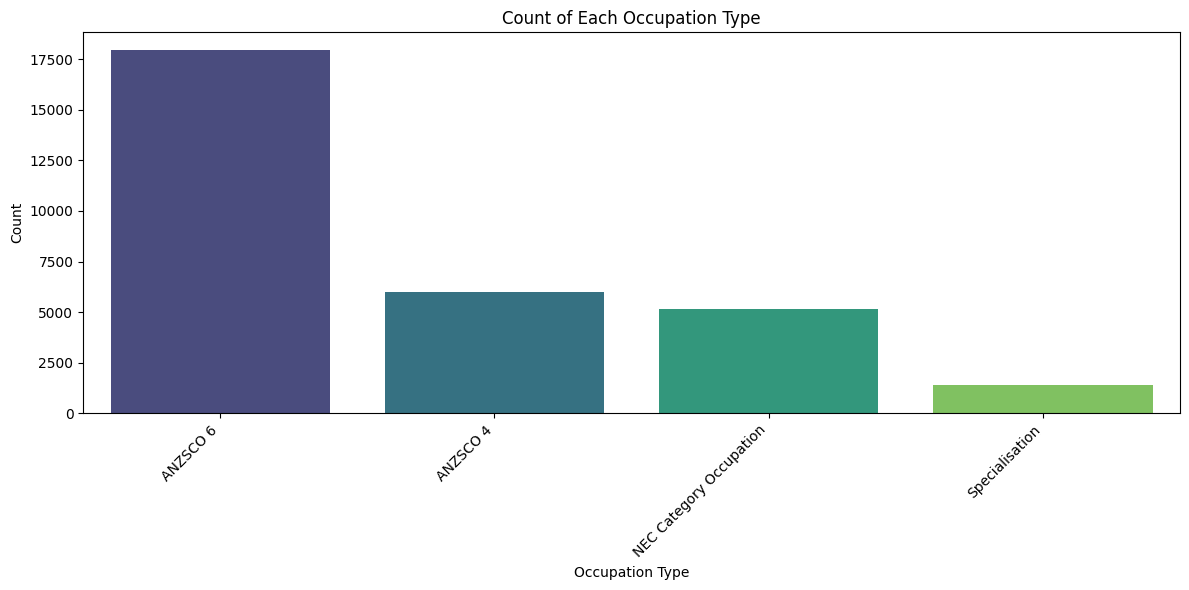

In [565]:
# Count the number of occurrences of each 'Occupation Type_x'
occupation_type_counts = st_merged_df['Occupation Type_x'].value_counts()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')
plt.tight_layout()
plt.show()


<ipython-input-566-f1ca420cc663>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_avg_time_spent.index, y=top_10_avg_time_spent.values, palette="viridis")


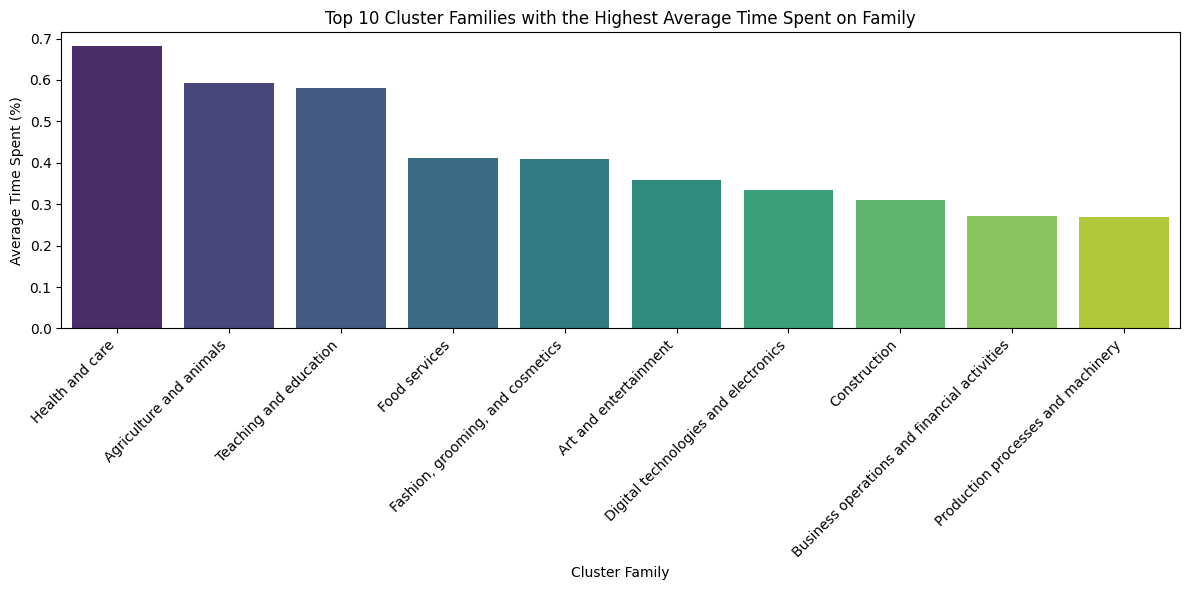

In [566]:
# Group by 'Cluster Family_x' and calculate the mean of '% of time spent on family'
average_time_spent = st_merged_df.groupby('Cluster Family_x')['% of time spent on family'].mean()

# Sort the result in descending order and get the top 10
top_10_avg_time_spent = average_time_spent.sort_values(ascending=False).head(10)

# Plot the result
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_avg_time_spent.index, y=top_10_avg_time_spent.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cluster Family')
plt.ylabel('Average Time Spent (%)')
plt.title('Top 10 Cluster Families with the Highest Average Time Spent on Family')
plt.tight_layout()
plt.show()


<ipython-input-567-401f301ebafe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_emerging_trending.index, y=top_10_emerging_trending.values, palette="viridis")


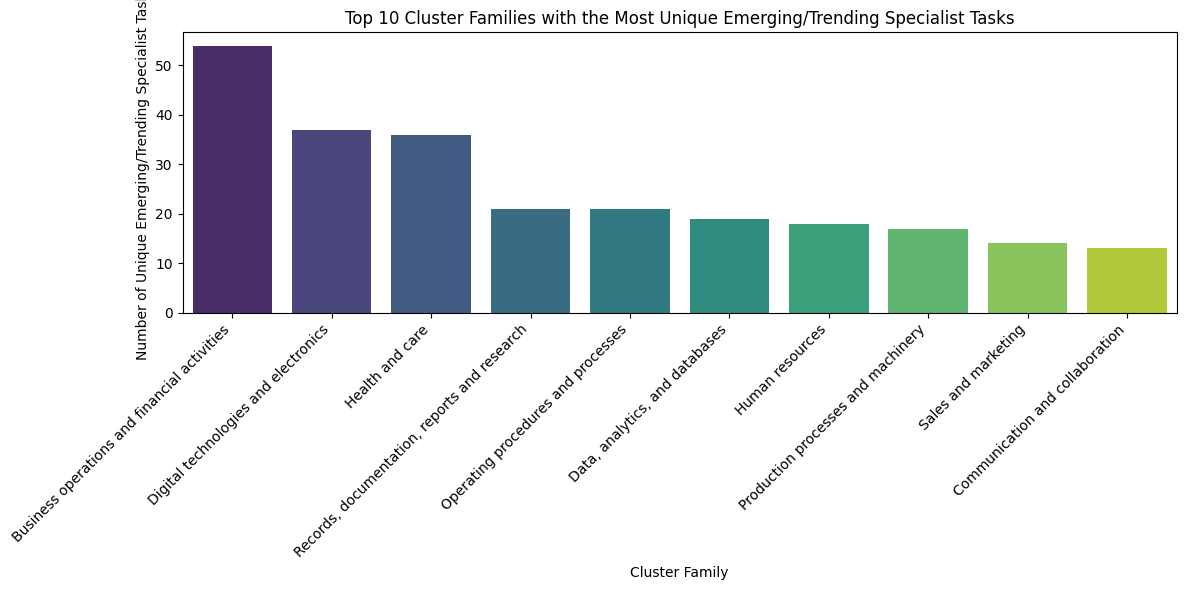

In [567]:
# Filter the rows where 'Emerging/Trending Flag' is not null or empty
emerging_trending = st_merged_df[st_merged_df['Emerging/Trending Flag'].notna()]

# Drop duplicates based on 'Specialist Task' and 'Cluster Family_x' to ensure unique specialist tasks per cluster family
unique_emerging_trending = emerging_trending.drop_duplicates(subset=['Specialist Task', 'Cluster Family_x'])

# Group by 'Cluster Family_x' and count the unique occurrences of 'Emerging/Trending Flag'
emerging_trending_counts = unique_emerging_trending.groupby('Cluster Family_x')['Emerging/Trending Flag'].count()

# Sort the result in descending order to get the cluster families with the most emerging/trending flags
top_10_emerging_trending = emerging_trending_counts.sort_values(ascending=False).head(10)

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_emerging_trending.index, y=top_10_emerging_trending.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Unique Emerging/Trending Specialist Tasks')
plt.title('Top 10 Cluster Families with the Most Unique Emerging/Trending Specialist Tasks')
plt.tight_layout()
plt.show()


### Core Competencies Merged Analysis

In [568]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

In [569]:
cc_merged_df.drop(columns=[ "Sub-Profile Code_y" , "Occupation Type_y"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description',
       'Proficiency Level_desc', 'Anchor Value_desc'],
      dtype='object')

In [570]:
cc_merged_df.drop(columns=[ "Anchor Value_desc" , "Proficiency Level_desc"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description'],
      dtype='object')

In [571]:
cc_merged_df.head()

Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      Intermediate   
4         Oral communication      7      Intermediate   

                                        Anchor Value  \
0  Build and maintain an effective online profile...   
1  Negotiate a price and sales terms then prepare...   
2  Learn a new filing system that groups document...   
3  Use a blood pressure machine and accurately re...   
4  Participate in a work meeting and ask appropri...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Assists Aboriginal and Torres Strait Islander ...   
2  Assists Aboriginal and Torres Strait Islander ...   
3  Assists Aboriginal and Torres Strait Islander ...   
4  Assists Aboriginal and Torres Strait Islander ...   

                         Core Competency Description  
0  Identifying and using technology (including ha...  
1  Taking on responsibilities and challenges, bei...  
2  Understanding the implications of new informat...  
3  Using mathematics to solve problems and interp...  
4  The ability to communicate information and ide...

<ipython-input-572-d717b47b3302>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")


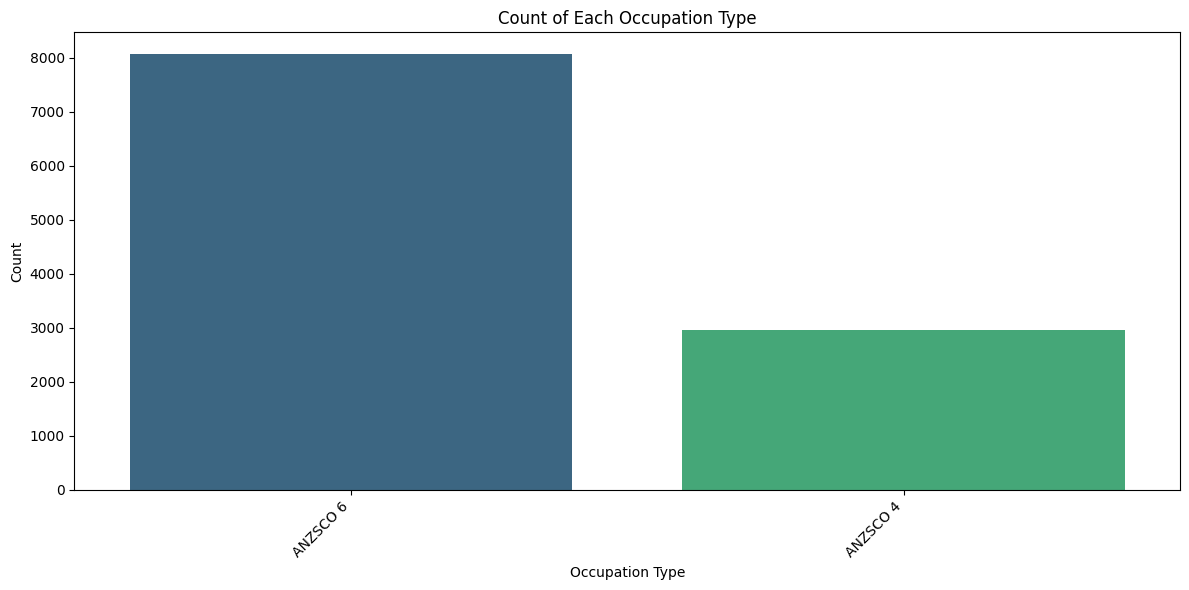

In [572]:
# Count the number of occurrences of each 'Occupation Type_x'
occupation_type_counts = cc_merged_df['Occupation Type_x'].value_counts()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')
plt.tight_layout()
plt.show()


<ipython-input-573-1526cada6893>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_anzsco.index, y=top_10_anzsco.values, palette="viridis")


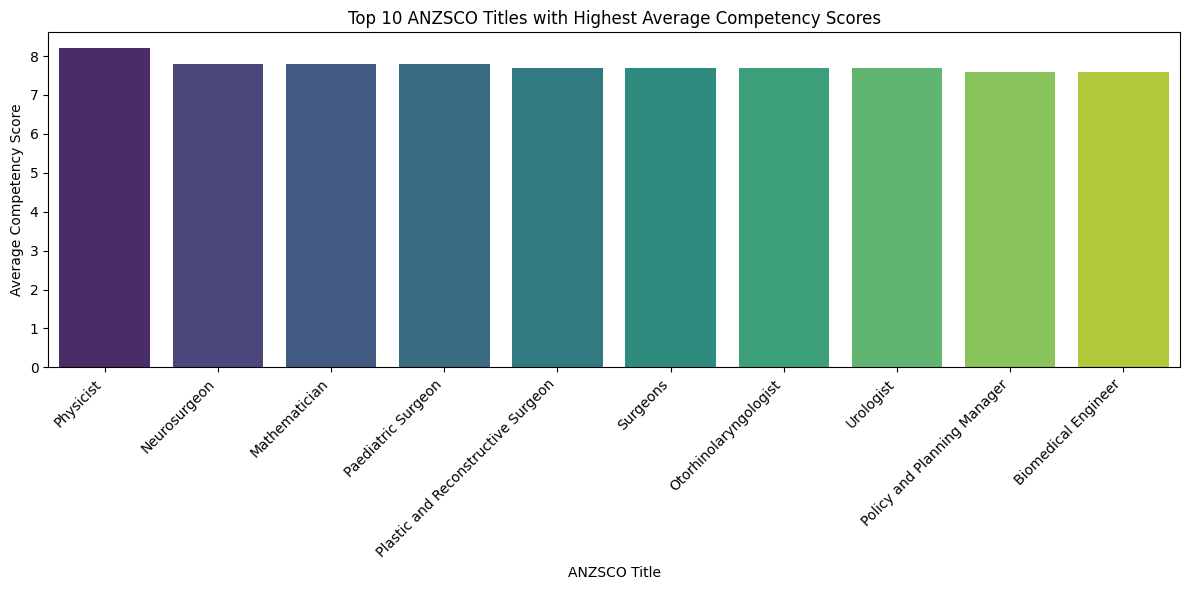

In [573]:
# Group by 'ANZSCO Title' and calculate the average 'Score'
average_scores_by_anzsco = cc_merged_df.groupby('ANZSCO Title')['Score'].mean()

# Sort the results in descending order and select the top 10
top_10_anzsco = average_scores_by_anzsco.sort_values(ascending=False).head(10)

# Plot the top 10 ANZSCO Titles with the highest average competency score
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_anzsco.index, y=top_10_anzsco.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('ANZSCO Title')
plt.ylabel('Average Competency Score')
plt.title('Top 10 ANZSCO Titles with Highest Average Competency Scores')
plt.tight_layout()
plt.show()


## NLP Pipeline

#### CC - Checking if Core Competency is comprehensible and distinct or not

In [574]:
cc_try = cc_merged_df.copy()

In [575]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   ANZSCO Description           11030 non-null  object 
 9   Core Competency Description  11030 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 861.8+ KB


In [576]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Example text from 'Technology Tool Extended Description'


# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces

    return text

# Apply the text cleaning function
cc_try['Anchor Value Clean'] = cc_try['Anchor Value'].apply(clean_text)

# Check the changes in the DataFrame
cc_try.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      Intermediate   
4         Oral communication      7      Intermediate   

                                        Anchor Value  \
0  Build and maintain an effective online profile...   
1  Negotiate a price and sales terms then prepare...   
2  Learn a new filing system that groups document...   
3  Use a blood pressure machine and accurately re...   
4  Participate in a work meeting and ask appropri...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Assists Aboriginal and Torres Strait Islander ...   
2  Assists Aboriginal and Torres Strait Islander ...   
3  Assists Aboriginal and Torres Strait Islander ...   
4  Assists Aboriginal and Torres Strait Islander ...   

                         Core Competency Description  \
0  Identifying and using technology (including ha...   
1  Taking on responsibilities and challenges, bei...   
2  Understanding the implications of new informat...   
3  Using mathematics to solve problems and interp...   
4  The ability to communicate information and ide...   

                                  Anchor Value Clean  
0  build and maintain an effective online profile...  
1  negotiate a price and sales terms then prepare...  
2  learn a new filing system that groups document...  
3  use a blood pressure machine and accurately re...  
4  participate in a work meeting and ask appropri...

In [577]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')

# Step 1: Tokenize the text in the 'Anchor Value' column
w_stopword = cc_try['Anchor Value Clean'].apply(word_tokenize)

# Step 2: Check the changes in the DataFrame



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [578]:
w_stopword.head()

0    [build, and, maintain, an, effective, online, ...
1    [negotiate, a, price, and, sales, terms, then,...
2    [learn, a, new, filing, system, that, groups, ...
3    [use, a, blood, pressure, machine, and, accura...
4    [participate, in, a, work, meeting, and, ask, ...
Name: Anchor Value Clean, dtype: object

In [579]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_stop = w_stopword.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Print sample output
print(lemmatized_stop.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [build, and, maintain, an, effective, online, ...
1    [negotiate, a, price, and, sale, term, then, p...
2    [learn, a, new, filing, system, that, group, d...
3    [use, a, blood, pressure, machine, and, accura...
4    [participate, in, a, work, meeting, and, ask, ...
Name: Anchor Value Clean, dtype: object


In [580]:
import pandas as pd

# Assuming you have lemmatized tokens in the 'Lemmatized Anchor Value' column
# Flatten the lemmatized tokens into a Series
lemmatized_tok = w_stopword.explode()

# Create a pandas Series to calculate summary statistics
lemmatized_tok_ser = pd.Series(lemmatized_tok)

# Get summary statistics using describe() for lemmatized tokens
print("Tokenized Tokens Summary:")
print(lemmatized_tok_ser.describe())


Tokenized Tokens Summary:
count     131823
unique       489
top            a
freq       11711
Name: Anchor Value Clean, dtype: object


<ipython-input-581-c77db8a8a2b8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


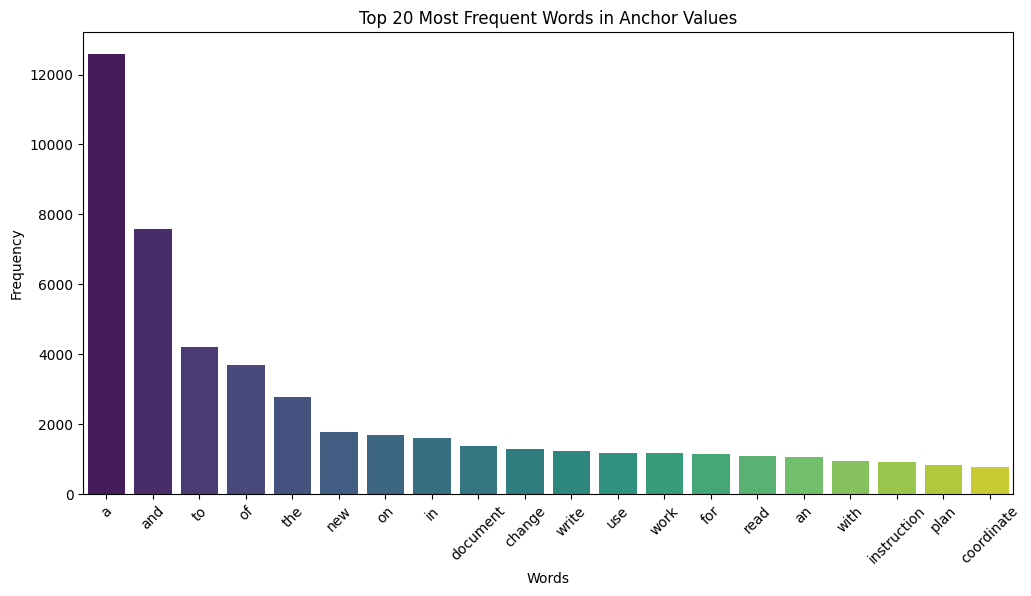

In [581]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words
all_words1 = [word for words in lemmatized_stop for word in words]

# Count word frequencies
word_freq = Counter(all_words1)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-582-0594127c6d07>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


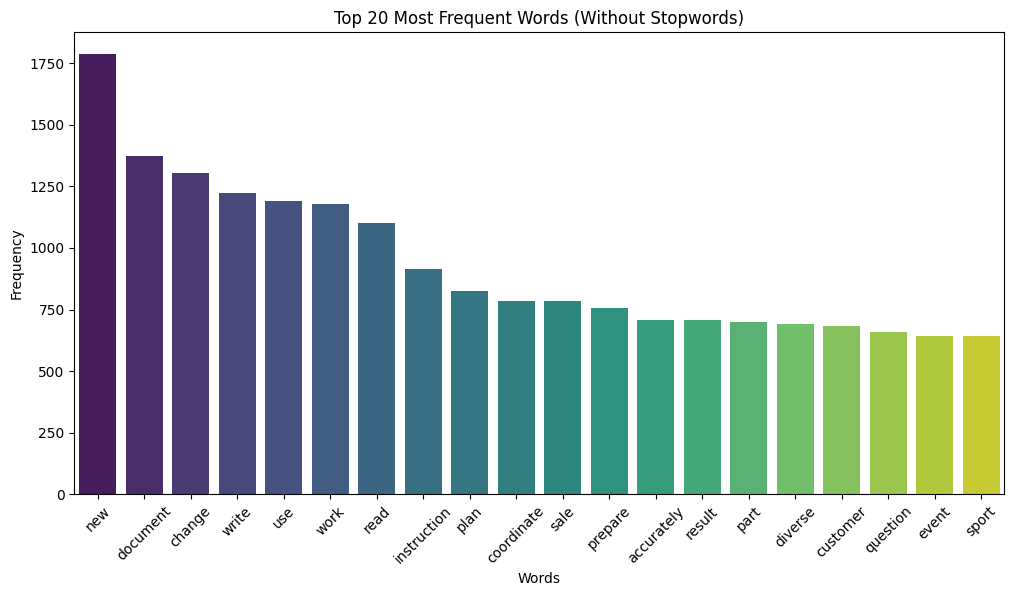

In [582]:
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Get the English stopwords set
stop_words = set(stopwords.words('english'))

# Remove stopwords from the lemmatized words
filtered_words = [[word for word in words if word.lower() not in stop_words] for words in lemmatized_stop]

# Flatten the list after removing stopwords
all_words_filtered = [word for words in filtered_words for word in words]

# Count word frequencies
word_freq_filtered = Counter(all_words_filtered)

# Get the top 20 most common words
top_words_filtered = word_freq_filtered.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words_filtered)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words (Without Stopwords)")
plt.show()


In [583]:
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from lemmatized_stop_values
lemmatized_clean = lemmatized_stop.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Print sample output of lemmatized_clean_values
print(lemmatized_clean.head())


0    [build, maintain, effective, online, profile, ...
1    [negotiate, price, sale, term, prepare, contra...
2    [learn, new, filing, system, group, document, ...
3    [use, blood, pressure, machine, accurately, re...
4    [participate, work, meeting, ask, appropriate,...
Name: Anchor Value Clean, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [584]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat = [word for words in filtered_words for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")






🔹 Top 20 Bigrams:
negotiate price: 402
price sale: 402
sale term: 402
term prepare: 402
prepare contract: 402
contract house: 402
machinery safely: 396
find evidence: 391
evidence support: 391
support history: 391
history essay: 391
essay rare: 391
rare document: 391
document read: 391
use blood: 389
blood pressure: 389
pressure machine: 389
machine accurately: 389
accurately record: 389
record result: 389

🔹 Top 20 Trigrams:
negotiate price sale: 402
price sale term: 402
sale term prepare: 402
term prepare contract: 402
prepare contract house: 402
find evidence support: 391
evidence support history: 391
support history essay: 391
history essay rare: 391
essay rare document: 391
rare document read: 391
use blood pressure: 389
blood pressure machine: 389
pressure machine accurately: 389
machine accurately record: 389
accurately record result: 389
coordinate sale campaign: 381
participate work meeting: 377
work meeting ask: 377
meeting ask appropriate: 377


<ipython-input-585-9852b42bf016>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


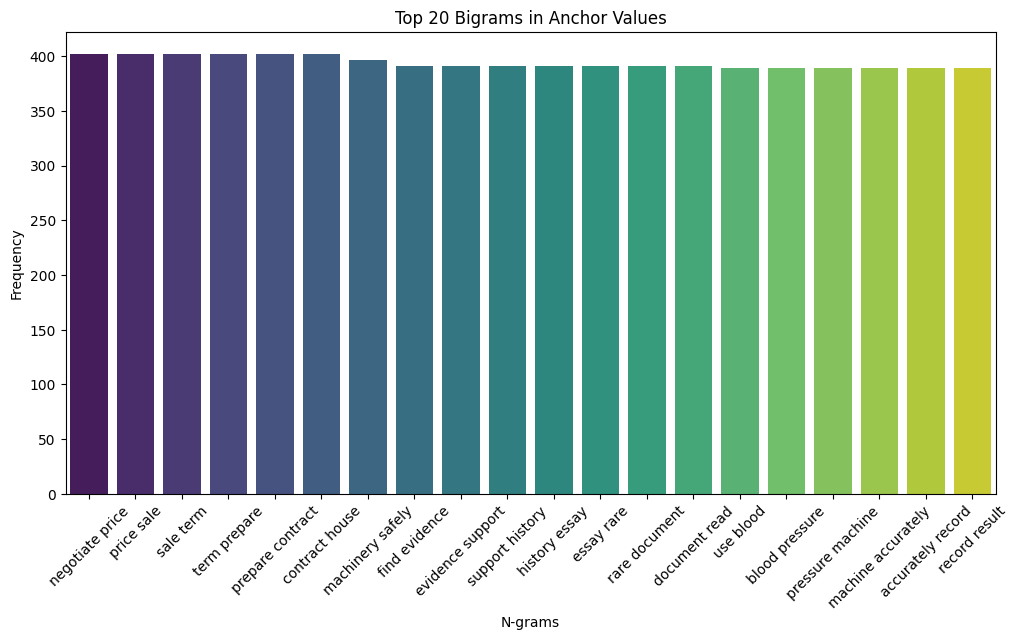

In [585]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")




<ipython-input-585-9852b42bf016>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


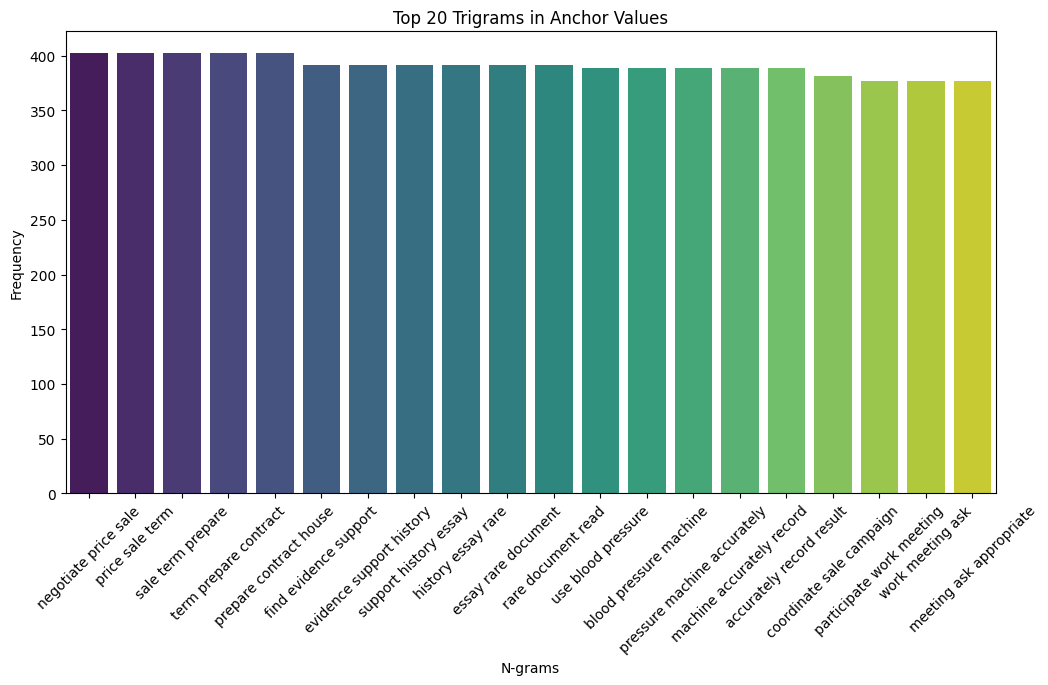

In [586]:
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")

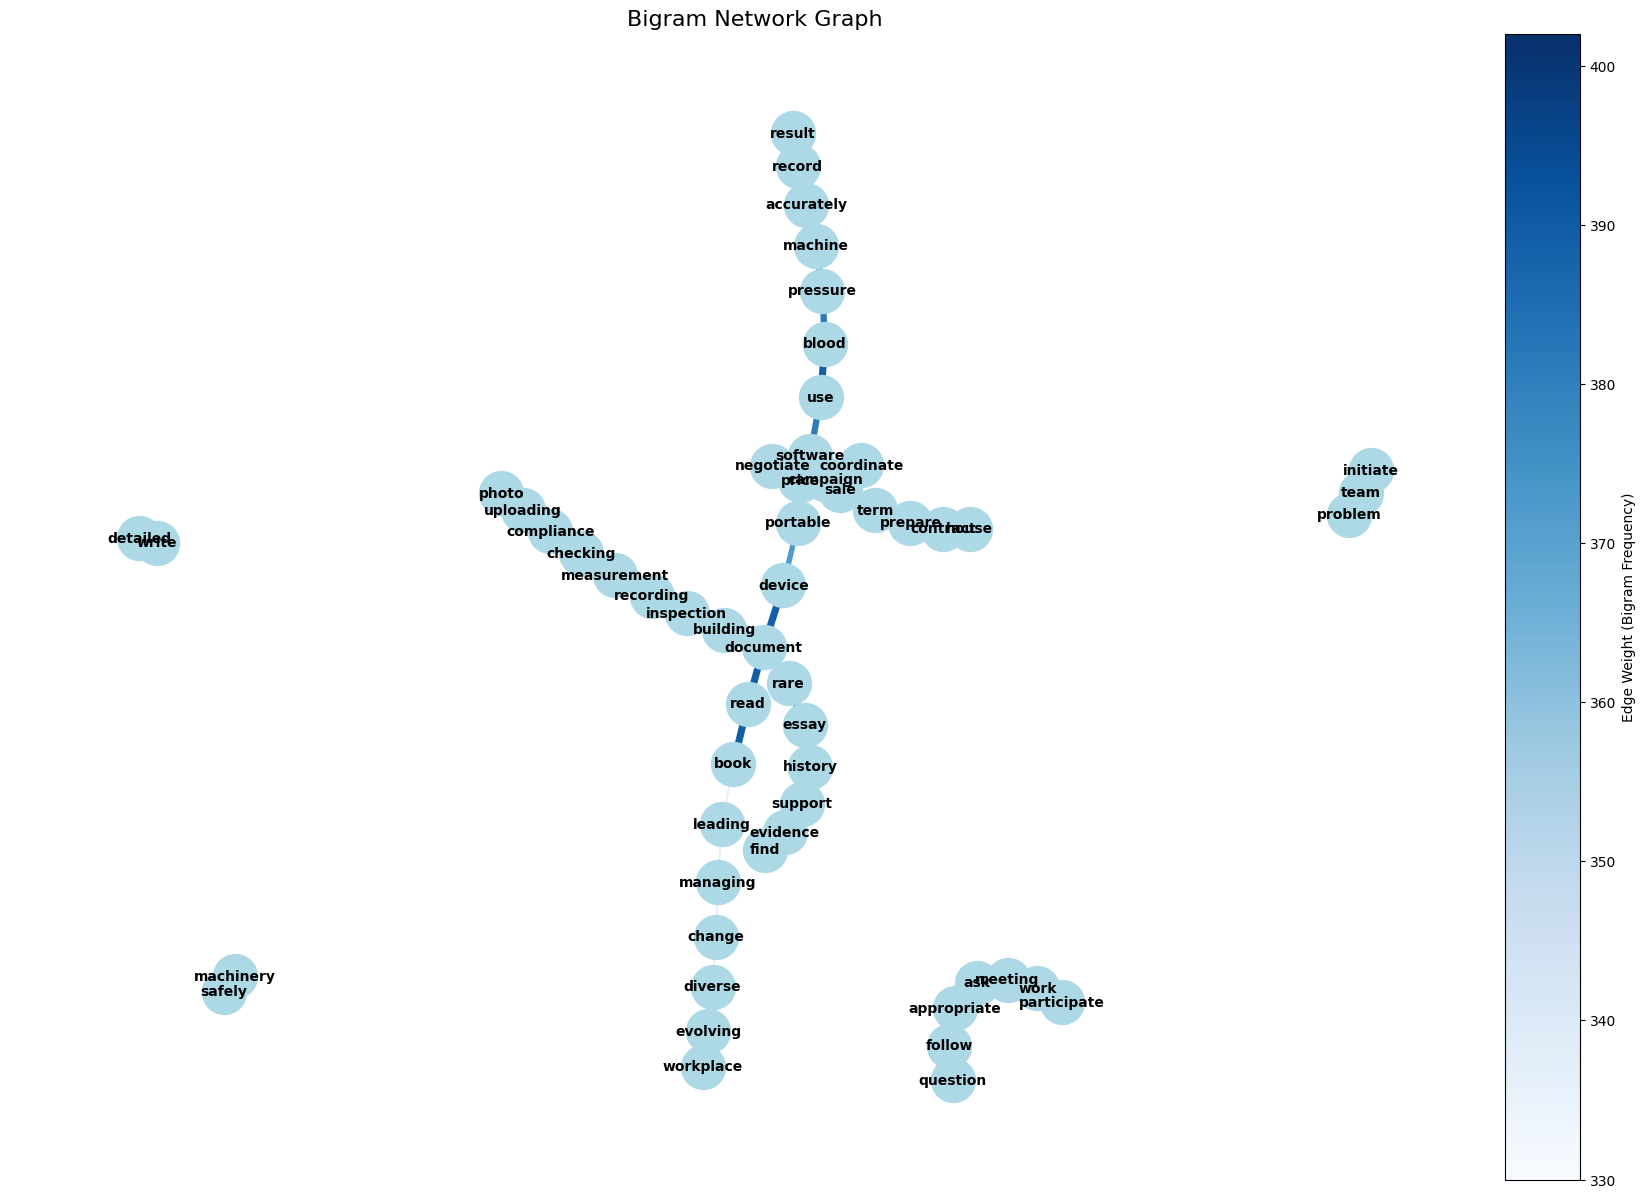

In [587]:
import nltk
from nltk.util import bigrams
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'lemmatized_anchor_values' is already a list of lists (tokenized words)
all_words = [word for words in lemmatized_clean for word in words]  # Flatten the list

# Define the function to plot bigram network
def plot_bigram_network(words, n=50):
    if not words:
        print("No words found. Ensure that 'lemmatized_anchor_values' contains data.")
        return

    # Get bigrams from words and count frequencies
    bigram_freq = Counter(bigrams(words))

    # Create a network graph
    G = nx.Graph()
    edge_width = []
    edge_color = []

    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)

    # Normalize edge widths for better visualization
    if edge_width:
        edge_width = np.array(edge_width, dtype=float)
        if edge_width.max() > edge_width.min():
            edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())
        else:
            edge_width = np.full_like(edge_width, 3)  # Default width if all values are the same

    # Plot the graph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Compute node positions using the spring layout algorithm

    # Draw nodes, edges, and labels
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    # Add a colorbar to show the weight scale
    if edge_color:
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.05)
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)

    plt.show()

# Call the function with 'all_words'
plot_bigram_network(all_words)


In [588]:
# This module implements the concept of a Dictionary
# i.e. a mapping between words and their integer ids
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(lemmatized_clean)

# Print sample mapping
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
build => 0
career => 1
effective => 2
maintain => 3
management => 4


In [589]:
# Build a corpus for the topic model

# Convert the document into a Bag-Of-Words format by producing
# a list of tuples in (token_id, token_count) format
corpus = [dictionary.doc2bow(text) for text in lemmatized_clean]

# Print a sample from the created corpus
print(f"Text: {' '.join(filtered_words[0])}")
print(f"Corpus: {corpus[0]}")

Text: build maintain effective online profile career management
Corpus: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [590]:
# Module to train and use the Latent Dirichlet Allocation model
from gensim.models.ldamodel import LdaModel

# Initialize the model with the corpus and dictionary - this will take a while to run, be patient!
lda_model = LdaModel(
   corpus=corpus, id2word=dictionary, num_topics=10,
   random_state=100, update_every=1, chunksize=100,
   passes=10, alpha='auto', per_word_topics=True
)

#You may fine tune parameters from the documentation here: https://radimrehurek.com/gensim/models/ldamodel.html. Try them out.

In [591]:
# Save the model

lda_model.save("lda_model") # Save the model as lda_model
#del lda_model # Delete the model and free up the space used by it

In [592]:
!pip install pyldavis

In [593]:
import pyLDAvis # Module for interactive topic model visualization
# Function to prepare LDA model for visualiztion
from pyLDAvis.gensim import prepare

# Enable the display of visualizations in IPython Notebooks
pyLDAvis.enable_notebook()

# Prepare and transform and LDA model
pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [594]:
pyLDAvis.display(pyLDAvis_data)

In [595]:
import pandas as pd
import numpy as np

# Get topic distributions for each document
topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

# Extract the dominant topic (the one with the highest probability)
dominant_topics = [max(doc_topics, key=lambda x: x[1])[0] for doc_topics in topic_distributions]

# Assign dominant topics to the DataFrame
cc_try['LDA_Dominant_Topic'] = dominant_topics

# Display the first few rows to verify



In [596]:
cc_try.head(10)

Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   
5          ANZSCO 6       422111                 NaN   
6          ANZSCO 6       422111                 NaN   
7          ANZSCO 6       422111                 NaN   
8          ANZSCO 6       422111                 NaN   
9          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   
5  Aboriginal and Torres Strait Islander Educatio...   
6  Aboriginal and Torres Strait Islander Educatio...   
7  Aboriginal and Torres Strait Islander Educatio...   
8  Aboriginal and Torres Strait Islander Educatio...   
9  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      Intermediate   
4         Oral communication      7      Intermediate   
5    Planning and organising      8              High   
6            Problem solving      5      Intermediate   
7                    Reading      5      Intermediate   
8                   Teamwork      9              High   
9                    Writing      6      Intermediate   

                                        Anchor Value  \
0  Build and maintain an effective online profile...   
1  Negotiate a price and sales terms then prepare...   
2  Learn a new filing system that groups document...   
3  Use a blood pressure machine and accurately re...   
4  Participate in a work meeting and ask appropri...   
5  Develop a program of multiple live musical per...   
6  Find evidence to support a history essay in a ...   
7  Read and interpret instructions and technical ...   
8  Work with a range of subject matter experts, w...   
9     Write a memo to staff outlining new directives   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Assists Aboriginal and Torres Strait Islander ...   
2  Assists Aboriginal and Torres Strait Islander ...   
3  Assists Aboriginal and Torres Strait Islander ...   
4  Assists Aboriginal and Torres Strait Islander ...   
5  Assists Aboriginal and Torres Strait Islander ...   
6  Assists Aboriginal and Torres Strait Islander ...   
7  Assists Aboriginal and Torres Strait Islander ...   
8  Assists Aboriginal and Torres Strait Islander ...   
9  Assists Aboriginal and Torres Strait Islander ...   

                         Core Competency Description  \
0  Identifying and using technology (including ha...   
1  Taking on responsibilities and challenges, bei...   
2  Understanding the implications of new informat...   
3  Using mathematics to solve problems and interp...   
4  The ability to communicate information and ide...   
5  Developing specific goals and plans to priorit...   
6  Identifying complex problems and reviewing rel...   
7  Understanding written sentences and paragraphs...   
8  Working effectively with others and being pers...   
9  Communicating effectively in writing in a way ...   

                                  Anchor Value Clean  LDA_Dominant_Topic  
0  build and maintain an effective online profile...                   5  
1  negotiate a price and sales terms then prepare...                   4  
2  learn a new filing system that groups document...            

In [597]:
print("LDA Model Perplexity:", lda_model.log_perplexity(corpus))


LDA Model Perplexity: -4.08389130038066


In [598]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_clean, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("LDA Model Coherence Score:", coherence_score)


LDA Model Coherence Score: 0.3795793782449272


In [599]:
import pandas as pd

# Save DataFrame as an Excel file
cc_try.to_excel("CC_exp1.xlsx", index=False)

print("File saved as cc_exp1.xlsx")


File saved as cc_exp1.xlsx


#### CC - Cheking if Core Competencies are able to cluster jobs accurately

##### CC EDA


In [600]:
cc_nlp = cc_merged_df.copy()

In [601]:
cc_nlp.head()

Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      Intermediate   
4         Oral communication      7      Intermediate   

                                        Anchor Value  \
0  Build and maintain an effective online profile...   
1  Negotiate a price and sales terms then prepare...   
2  Learn a new filing system that groups document...   
3  Use a blood pressure machine and accurately re...   
4  Participate in a work meeting and ask appropri...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Assists Aboriginal and Torres Strait Islander ...   
2  Assists Aboriginal and Torres Strait Islander ...   
3  Assists Aboriginal and Torres Strait Islander ...   
4  Assists Aboriginal and Torres Strait Islander ...   

                         Core Competency Description  
0  Identifying and using technology (including ha...  
1  Taking on responsibilities and challenges, bei...  
2  Understanding the implications of new informat...  
3  Using mathematics to solve problems and interp...  
4  The ability to communicate information and ide...

In [602]:
import pandas as pd

# Assuming your DataFrame is named df
# Example DataFrame for context:
# df = pd.DataFrame(...)

# Group by 'ANZSCO Title' and aggregate the other columns
cc_nlp_2 = cc_nlp.groupby('ANZSCO Title').agg(
    {
        'Occupation Type_x': 'first',  # Keep the first value
        'ANZSCO Code': 'first',        # Keep the first value
        'Sub-Profile Code_x': 'first', # Keep the first value
        'Anchor Value': ' '.join,      # Merge the Anchor Value into a single string
        'ANZSCO Description': 'first'  # Keep the first value
    }
).reset_index()

# Rename 'Anchor Value' column to 'Anchor Value Merged'
cc_nlp_2.rename(columns={'Anchor Value': 'Anchor Value Merged'}, inplace=True)

# Print the new DataFrame
print(cc_nlp_2.head())


                                        ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to docume

In [603]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Example text from 'Technology Tool Extended Description'


# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Apply the text cleaning function
cc_nlp_2['Anchor Value Clean'] = cc_nlp_2['Anchor Value Merged'].apply(clean_text)

# Check the changes in the DataFrame
cc_nlp_2.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to document ...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Liaises with patients, clients, visitors to ho...   
2  Provides services relating to compliance-based...   
3  Accountants provide services relating to finan...   
4  Accounting Clerks monitor creditor and debtor ...   

                                  Anchor Value Clean  
0  build and maintain an effective online profile...  
1  use software on a portable device to document ...  
2  write software for keeping track of items in a...  
3  write software for keeping track of items in a...  
4  use software on a portable device to document ...

In [604]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')

# Step 1: Tokenize the text in the 'Anchor Value' column
w_stopword_tokens = cc_nlp_2['Anchor Value Clean'].apply(word_tokenize)

# Step 2: Check the changes in the DataFrame



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [605]:
w_stopword_tokens.head()

0    [build, and, maintain, an, effective, online, ...
1    [use, software, on, a, portable, device, to, d...
2    [write, software, for, keeping, track, of, ite...
3    [write, software, for, keeping, track, of, ite...
4    [use, software, on, a, portable, device, to, d...
Name: Anchor Value Clean, dtype: object

In [606]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_stop_values = w_stopword_tokens.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Print sample output
print(lemmatized_stop_values.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [build, and, maintain, an, effective, online, ...
1    [use, software, on, a, portable, device, to, d...
2    [write, software, for, keeping, track, of, ite...
3    [write, software, for, keeping, track, of, ite...
4    [use, software, on, a, portable, device, to, d...
Name: Anchor Value Clean, dtype: object


In [607]:
import pandas as pd

# Assuming you have lemmatized tokens in the 'Lemmatized Anchor Value' column
# Flatten the lemmatized tokens into a Series
lemmatized_tokens = w_stopword_tokens.explode()

# Create a pandas Series to calculate summary statistics
lemmatized_tokens_series = pd.Series(lemmatized_tokens)

# Get summary statistics using describe() for lemmatized tokens
print("Tokenized Tokens Summary:")
print(lemmatized_tokens_series.describe())


Tokenized Tokens Summary:
count     131823
unique       489
top            a
freq       11711
Name: Anchor Value Clean, dtype: object


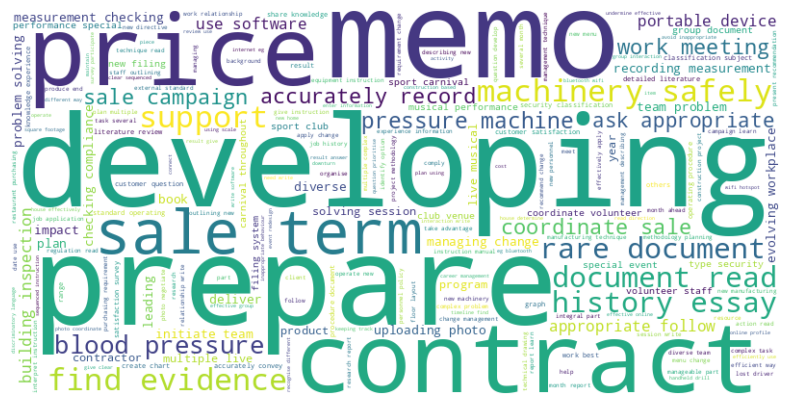

In [608]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words and join them into a single string
lemmatized_text = ' '.join([' '.join(words) for words in lemmatized_stop_values])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


<ipython-input-609-4866cc9b7950>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


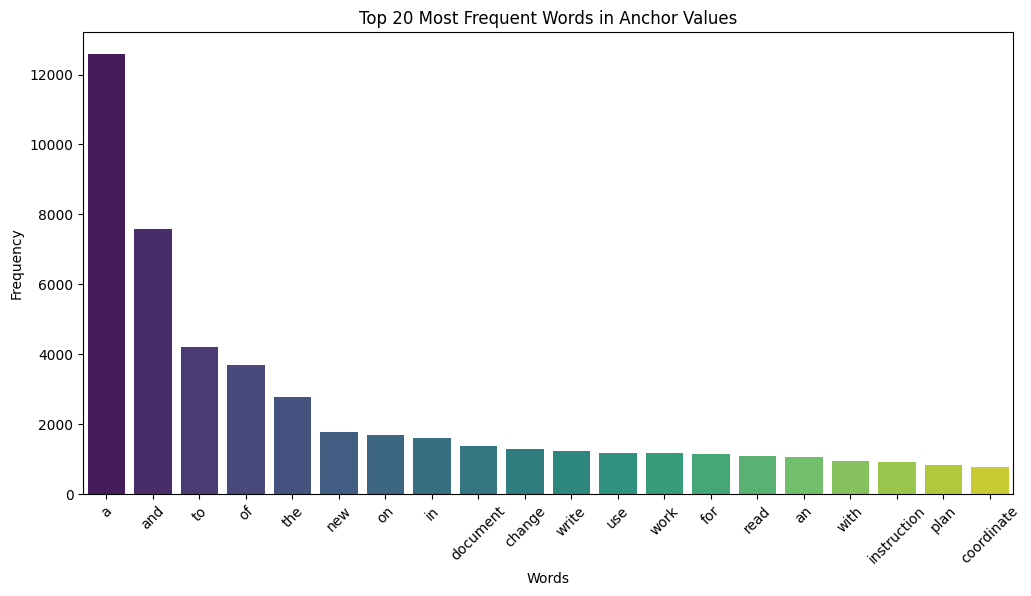

In [609]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words
all_words = [word for words in lemmatized_stop_values for word in words]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-610-aaf8bf14156f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


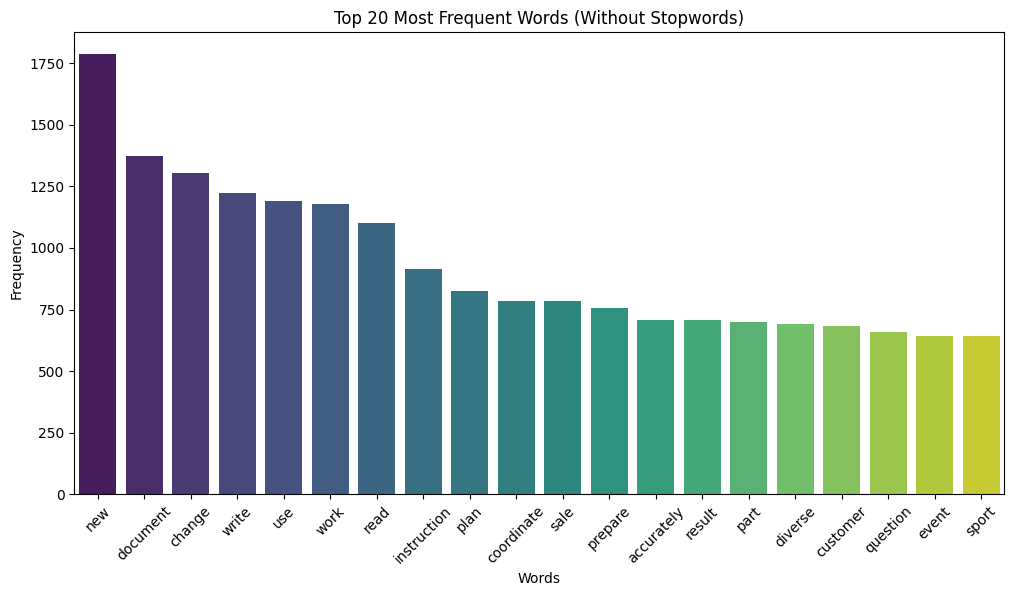

In [610]:
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Get the English stopwords set
stop_words = set(stopwords.words('english'))

# Remove stopwords from the lemmatized words
filtered_words = [[word for word in words if word.lower() not in stop_words] for words in lemmatized_stop_values]

# Flatten the list after removing stopwords
all_words_filtered = [word for words in filtered_words for word in words]

# Count word frequencies
word_freq_filtered = Counter(all_words_filtered)

# Get the top 20 most common words
top_words_filtered = word_freq_filtered.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words_filtered)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words (Without Stopwords)")
plt.show()


In [611]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")
print(f"3. {' '.join(filtered_words[2])}")

Lemmatized data:
1. build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
2. use software portable device document building inspection recording measurement checking compliance uploading photo negotiate price sale term prepare contract house effectively apply change management technique managing diverse team use blood pressure machine accurately re

In [612]:
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from lemmatized_stop_values
lemmatized_clean_values = lemmatized_stop_values.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Print sample output of lemmatized_clean_values
print(lemmatized_clean_values.head())


0    [build, maintain, effective, online, profile, ...
1    [use, software, portable, device, document, bu...
2    [write, software, keeping, track, item, invent...
3    [write, software, keeping, track, item, invent...
4    [use, software, portable, device, document, bu...
Name: Anchor Value Clean, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [613]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat = [word for words in filtered_words for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")





🔹 Top 20 Bigrams:
negotiate price: 402
price sale: 402
sale term: 402
term prepare: 402
prepare contract: 402
contract house: 402
machinery safely: 396
find evidence: 391
evidence support: 391
support history: 391
history essay: 391
essay rare: 391
rare document: 391
document read: 391
use blood: 389
blood pressure: 389
pressure machine: 389
machine accurately: 389
accurately record: 389
record result: 389

🔹 Top 20 Trigrams:
negotiate price sale: 402
price sale term: 402
sale term prepare: 402
term prepare contract: 402
prepare contract house: 402
find evidence support: 391
evidence support history: 391
support history essay: 391
history essay rare: 391
essay rare document: 391
rare document read: 391
use blood pressure: 389
blood pressure machine: 389
pressure machine accurately: 389
machine accurately record: 389
accurately record result: 389
coordinate sale campaign: 381
participate work meeting: 377
work meeting ask: 377
meeting ask appropriate: 377


<ipython-input-614-16ff2cfb31fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


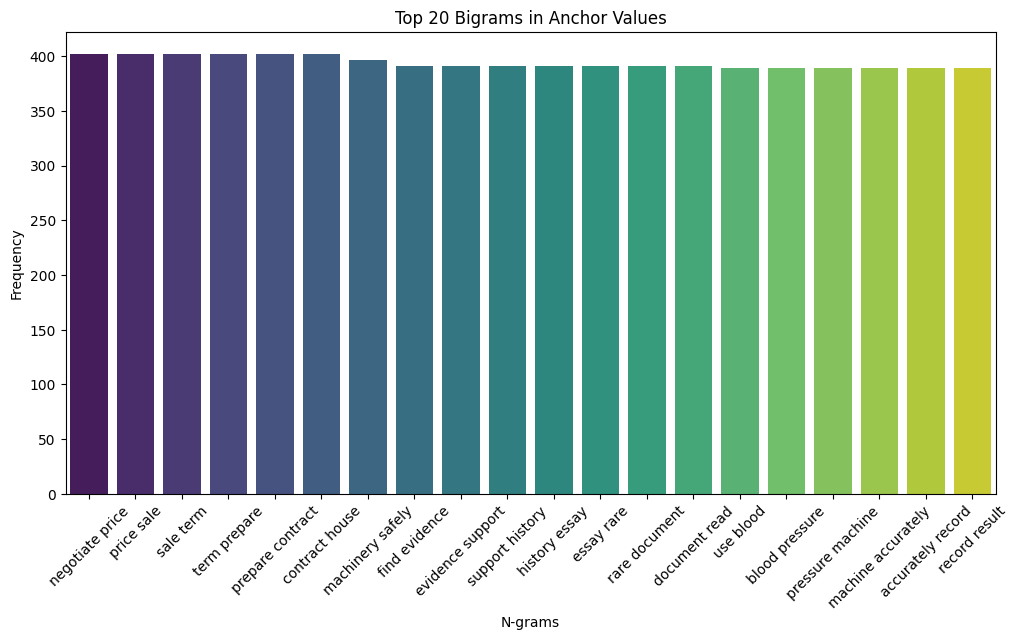

In [614]:
# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")



<ipython-input-614-16ff2cfb31fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


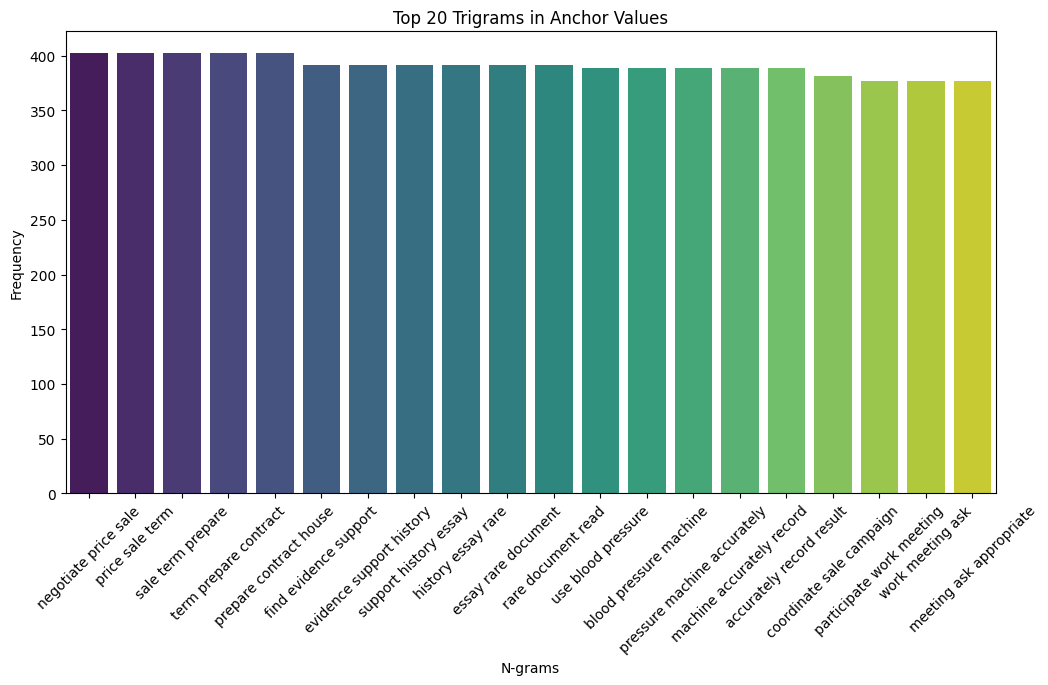

In [615]:
# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")

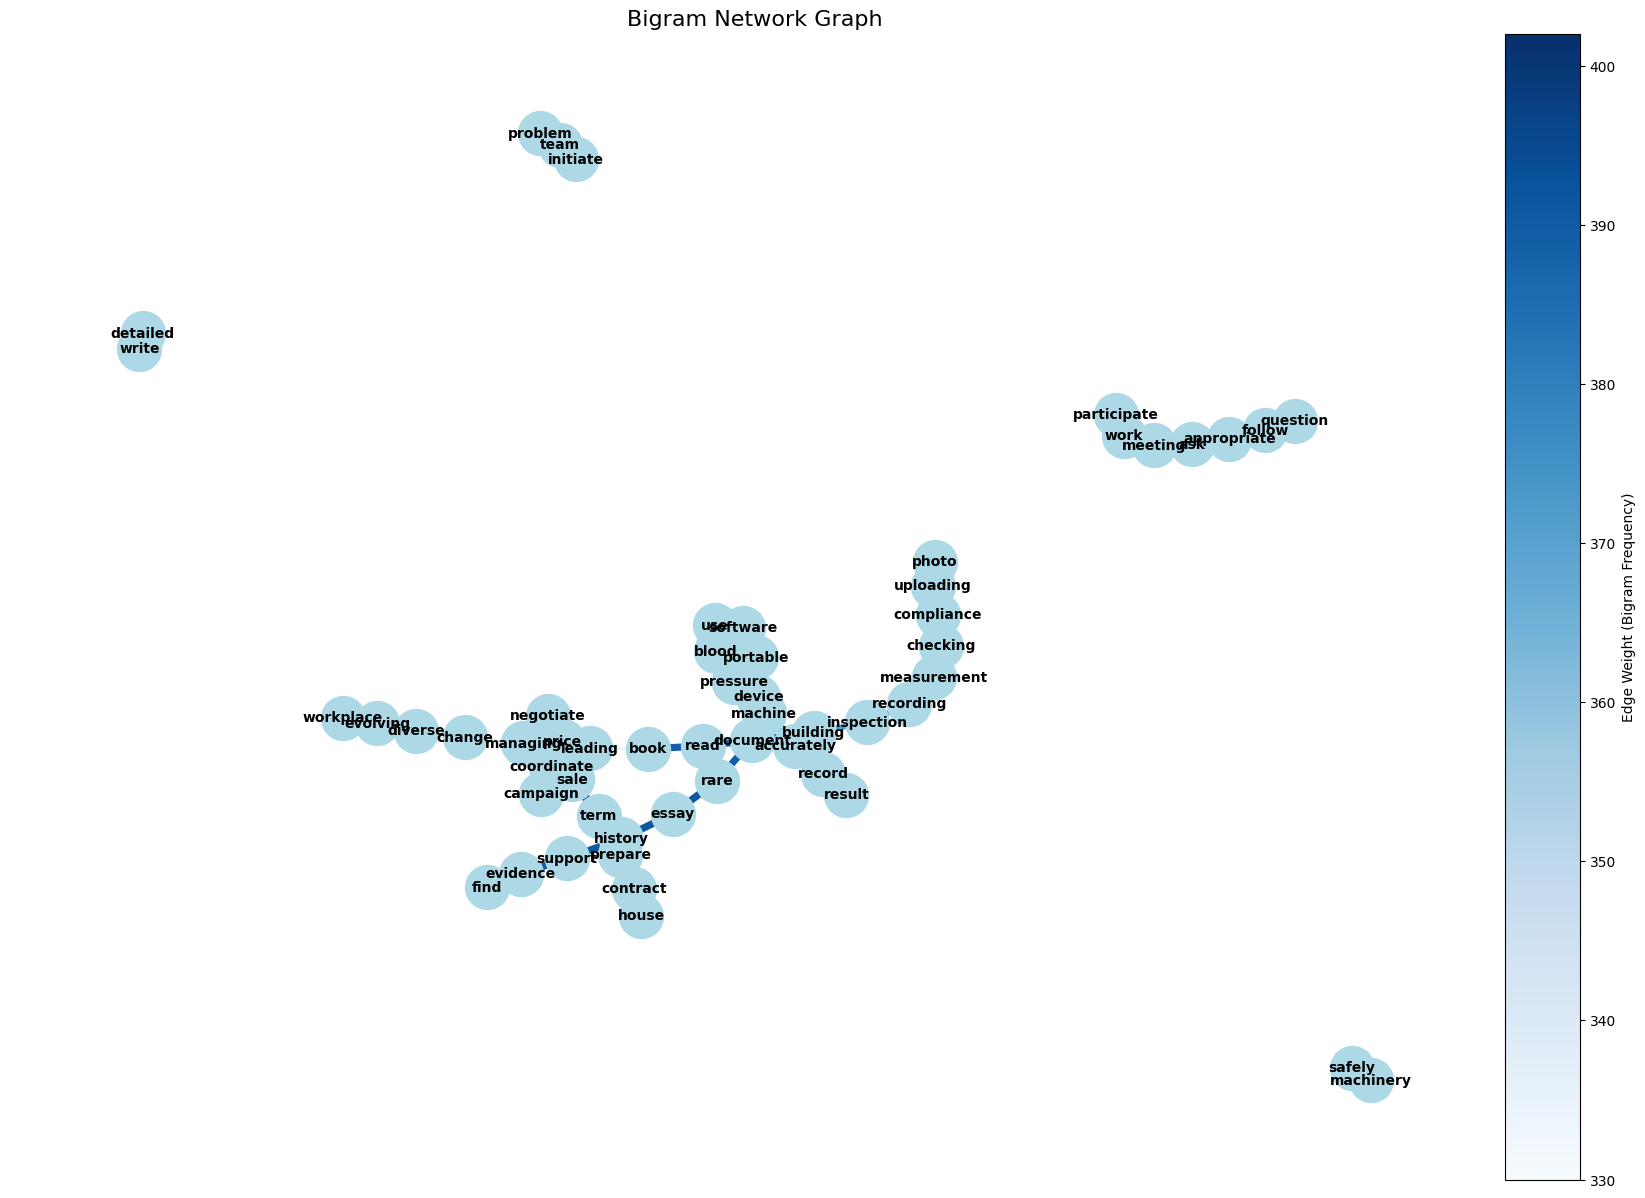

In [616]:
import nltk
from nltk.util import bigrams
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'lemmatized_anchor_values' is already a list of lists (tokenized words)
all_words = [word for words in lemmatized_clean_values for word in words]  # Flatten the list

# Define the function to plot bigram network
def plot_bigram_network(words, n=50):
    if not words:
        print("No words found. Ensure that 'lemmatized_anchor_values' contains data.")
        return

    # Get bigrams from words and count frequencies
    bigram_freq = Counter(bigrams(words))

    # Create a network graph
    G = nx.Graph()
    edge_width = []
    edge_color = []

    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)

    # Normalize edge widths for better visualization
    if edge_width:
        edge_width = np.array(edge_width, dtype=float)
        if edge_width.max() > edge_width.min():
            edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())
        else:
            edge_width = np.full_like(edge_width, 3)  # Default width if all values are the same

    # Plot the graph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Compute node positions using the spring layout algorithm

    # Draw nodes, edges, and labels
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    # Add a colorbar to show the weight scale
    if edge_color:
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.05)
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)

    plt.show()

# Call the function with 'all_words'
plot_bigram_network(all_words)


In [617]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")

Lemmatized data:
1. build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
2. use software portable device document building inspection recording measurement checking compliance uploading photo negotiate price sale term prepare contract house effectively apply change management technique managing diverse team use blood pressure machine accurately re

##### CC LDA

In [618]:
# This module implements the concept of a Dictionary
# i.e. a mapping between words and their integer ids
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(lemmatized_clean_values)

# Print sample mapping
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
accurately => 0
achieve => 1
appropriate => 2
ask => 3
blood => 4


In [619]:
# Build a corpus for the topic model

# Convert the document into a Bag-Of-Words format by producing
# a list of tuples in (token_id, token_count) format
corpus = [dictionary.doc2bow(text) for text in lemmatized_clean_values]

# Print a sample from the created corpus
print(f"Text: {' '.join(filtered_words[0])}")
print(f"Corpus: {corpus[0]}")

Text: build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
Corpus: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32

In [620]:
# Module to train and use the Latent Dirichlet Allocation model
from gensim.models.ldamodel import LdaModel

# Initialize the model with the corpus and dictionary - this will take a while to run, be patient!
lda_model = LdaModel(
   corpus=corpus, id2word=dictionary, num_topics=10,
   random_state=100, update_every=1, chunksize=100,
   passes=10, alpha='auto', per_word_topics=True
)

#You may fine tune parameters from the documentation here: https://radimrehurek.com/gensim/models/ldamodel.html. Try them out.

In [621]:
# Save the model

lda_model.save("lda_model") # Save the model as lda_model
del lda_model # Delete the model and free up the space used by it

In [622]:
# Load the model
lda_model = LdaModel.load("lda_model") # Load it by passing the name

In [623]:
!pip install pyldavis

In [624]:
import pyLDAvis # Module for interactive topic model visualization
# Function to prepare LDA model for visualiztion
from pyLDAvis.gensim import prepare

# Enable the display of visualizations in IPython Notebooks
pyLDAvis.enable_notebook()

# Prepare and transform and LDA model
pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [625]:
pyLDAvis.display(pyLDAvis_data)

In [626]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_clean_values, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("LDA Model Coherence Score:", coherence_score)


LDA Model Coherence Score: 0.7683700120545156


In [627]:
import gensim
from gensim.models import LdaModel

# Assuming you already have a trained LDA model and a corpus
# lda_model is your trained Gensim LDA model
# corpus is your bag-of-words representation of the document set

perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")


Perplexity: -5.04180956588882


In [628]:
# Get the dominant topic for each document (row in the dataset)
dominant_topics = [max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0] for tokens in lemmatized_clean_values]
cc_lda = cc_nlp_2.copy()
# Add the dominant topic as a new column in the dataset
cc_lda['Dominant Topic'] = dominant_topics

# Filter the rows where the ANZSCO Title is 'Data Analyst' or 'Data Scientist'
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title', 'Dominant Topic']].head(30))


               ANZSCO Title  Dominant Topic
241            Data Analyst               6
243          Data Scientist               6
244  Database Administrator               6


In [629]:
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Deer Farmer', 'Goat Farmer'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title', 'Dominant Topic']].head(30))

    ANZSCO Title  Dominant Topic
249  Deer Farmer               6
427  Goat Farmer               6


In [630]:
# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = cc_lda[cc_lda['ANZSCO Title'] == 'Data Scientist']['Dominant Topic'].values[0]

# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs = cc_lda[cc_lda['Dominant Topic'] == data_scientist_topic]

# Display the relevant columns for these specific rows


In [631]:
same_topic_jobs.head(273)

ANZSCO Title Occupation Type_x  \
1     Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                                  Accountant (General)          ANZSCO 6   
3                                           Accountants          ANZSCO 4   
8                                         Acupuncturist          ANZSCO 6   
11                               Advertising Specialist          ANZSCO 6   
...                                                 ...               ...   
1078                                      Web Developer          ANZSCO 6   
1082                             Welfare Centre Manager          ANZSCO 6   
1084                                     Welfare Worker          ANZSCO 6   
1085     Welfare, Recreation and Community Arts Workers          ANZSCO 4   
1097                        Workplace Relations Adviser          ANZSCO 6   

      ANZSCO Code  Sub-Profile Code_x  \
1          411511                 NaN   
2          221111                 NaN   
3            2211                 NaN   
8          252211                 NaN   
11         225111                 NaN   
...           ...                 ...   
1078       261212                 NaN   
1082       134214                 NaN   
1084       272613                 NaN   
1085         2726                 NaN   
1097       223113                 NaN   

                                    Anchor Value Merged  \
1     Use software on a portable device to document ...   
2     Write software for keeping track of items in a...   
3     Write software for keeping track of items in a...   
8     Enter information into a database Negotiate a ...   
11    Use software on a portable device to document ...   
...                                                 ...   
1078  Use Enterprise Resource Planning software to m...   
1082  Use software on a portable device to document ...   
1084  Use software on a portable device to document ...   
1085  Use software on a portable device to document ...   
1097  Use software on a portable device to document ...   

                                     ANZSCO Description  \
1     Liaises with patients, clients, visitors to ho...   
2     Provides services relating to compliance-based...   
3     Accountants provide services relating to finan...   
8     Treats disorders and illnesses by stimulating ...   
11    Devises and coordinates advertising campaigns ...   
...                                                 ...   
1078  Plans, produces and maintains websites using w...   
1082  Plans, organises, directs, controls and coordi...   
1084  Assists individuals, families and groups with ...   
1085  Welfare, Recreation and Community Arts Workers...   
1097  Assists in resolving disputes by advising on w...   

                                     Anchor Value Clean  Dominant Topic  
1     use software on a portable device to document ...               6  
2     write software for keeping track of items in a...               6  
3     write software for keeping track of items in a...               6  
8     enter information into a database negotiate a ...               6  
11    use software on a portable device to document ...               6  
...                                                 ...             ...  
1078  use enterprise resource planning software to m...               6  
1082  use software on a portable device to document ...               6  
1084  use software on a portable device to document ...               6  
1085  use software on a portable device to document ...               6  
1097  use software on a portable device to document ...               6  

[273 rows x 8 columns]

In [633]:

# Export same_topic_jobs to an Excel file
same_topic_jobs[['ANZSCO Title', 'Dominant Topic', 'Dominant Topic']].to_excel('CC_LDA_Jobs_exp1.xlsx', index=False)


In [634]:
"""import numpy as np

# Get the topic distributions (topic probabilities) for each document
topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

# Create a matrix (num_documents x num_topics)
topic_matrix = np.zeros((len(corpus), lda_model.num_topics))

# Fill the matrix with topic proportions
for i, doc_topics in enumerate(topic_distributions):
    for topic, prob in doc_topics:
        topic_matrix[i, topic] = prob

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to apply K-means and calculate silhouette scores
def kmeans_optimal_clusters(topic_matrix, max_k=20):
    silhouette_scores = []
    inertias = []

    # Loop through different values of k (number of clusters)
    for k in range(2, max_k + 1):  # Start from 2 clusters to avoid single cluster case
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(topic_matrix)

        # Calculate silhouette score and inertia (within-cluster sum of squares)
        silhouette = silhouette_score(topic_matrix, kmeans.labels_)
        inertia = kmeans.inertia_

        silhouette_scores.append(silhouette)
        inertias.append(inertia)

    return silhouette_scores, inertias

# Calculate silhouette scores and inertia for different values of k
sil_scores, inertias = kmeans_optimal_clusters(topic_matrix, max_k=20)

# Plot the silhouette scores to find the optimal number of clusters (k)
plt.figure(figsize=(10, 5))

# Plot silhouette scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 21), sil_scores, marker='o', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

# Plot inertia (within-cluster sum of squares) to check for the elbow point
plt.subplot(1, 2, 2)
plt.plot(range(2, 21), inertias, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Inertia vs Number of Clusters")

plt.tight_layout()
plt.show()
"""

'import numpy as np\n\n# Get the topic distributions (topic probabilities) for each document\ntopic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]\n\n# Create a matrix (num_documents x num_topics)\ntopic_matrix = np.zeros((len(corpus), lda_model.num_topics))\n\n# Fill the matrix with topic proportions\nfor i, doc_topics in enumerate(topic_distributions):\n    for topic, prob in doc_topics:\n        topic_matrix[i, topic] = prob\n\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score\nimport matplotlib.pyplot as plt\n\n# Function to apply K-means and calculate silhouette scores\ndef kmeans_optimal_clusters(topic_matrix, max_k=20):\n    silhouette_scores = []\n    inertias = []\n\n    # Loop through different values of k (number of clusters)\n    for k in range(2, max_k + 1):  # Start from 2 clusters to avoid single cluster case\n        kmeans = KMeans(n_clusters=k, random_state=100)\n        kmeans.fit(topic_matrix)\n\n        # Calcu

In [635]:
"""# Suppose optimal_k is found from the silhouette score or elbow method
optimal_k = 8  # Example, use the optimal value based on your evaluation

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
kmeans.fit(topic_matrix)

# Get the cluster labels for each document
document_clusters = kmeans.labels_

# Now document_clusters will tell you which cluster each document belongs to
# For example, you can check the cluster for the first 10 documents:
print(document_clusters[:10])

# Optionally, assign the cluster labels back to your DataFrame (if using one)
import pandas as pd

# Assuming you have a DataFrame named df that contains the documents
cc_lda['Topic Cluster'] = document_clusters
"""

"# Suppose optimal_k is found from the silhouette score or elbow method\noptimal_k = 8  # Example, use the optimal value based on your evaluation\n\n# Fit K-means with the optimal number of clusters\nkmeans = KMeans(n_clusters=optimal_k, random_state=100)\nkmeans.fit(topic_matrix)\n\n# Get the cluster labels for each document\ndocument_clusters = kmeans.labels_\n\n# Now document_clusters will tell you which cluster each document belongs to\n# For example, you can check the cluster for the first 10 documents:\nprint(document_clusters[:10])\n\n# Optionally, assign the cluster labels back to your DataFrame (if using one)\nimport pandas as pd\n\n# Assuming you have a DataFrame named df that contains the documents\ncc_lda['Topic Cluster'] = document_clusters\n"

In [636]:
"""filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]

# Display the relevant columns for these specific rows

print(filtered_data[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(30))
"""

"filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]\n\n# Display the relevant columns for these specific rows\n\nprint(filtered_data[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(30))\n"

In [637]:
"""filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Goat Farmer', 'Deer Farmer'])]

# Display the relevant columns for these specific rows

print(filtered_data[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(30))
"""

"filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Goat Farmer', 'Deer Farmer'])]\n\n# Display the relevant columns for these specific rows\n\nprint(filtered_data[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(30))\n"

In [638]:
"""# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = cc_lda[cc_lda['ANZSCO Title'] == 'Data Scientist']['Topic Cluster'].values[0]

# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs = cc_lda[cc_lda['Topic Cluster'] == data_scientist_topic]

# Display the relevant columns for these specific rows

"""

"# Filter the data for 'Data Scientist' and get its dominant topic\ndata_scientist_topic = cc_lda[cc_lda['ANZSCO Title'] == 'Data Scientist']['Topic Cluster'].values[0]\n\n# Find all jobs with the same Dominant Topic as 'Data Scientist'\nsame_topic_jobs = cc_lda[cc_lda['Topic Cluster'] == data_scientist_topic]\n\n# Display the relevant columns for these specific rows\n\n"

In [639]:
"""from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(topic_matrix)

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=100)
tsne_result = tsne.fit_transform(topic_matrix)

# Get K-means cluster labels (document clusters)
kmeans_labels = kmeans.labels_



# Plot t-SNE result
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE: Document Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()
"""

"from sklearn.decomposition import PCA\nfrom sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\n# Apply PCA to reduce dimensions to 2D\npca = PCA(n_components=2)\npca_result = pca.fit_transform(topic_matrix)\n\n# Apply t-SNE to reduce dimensions to 2D\ntsne = TSNE(n_components=2, random_state=100)\ntsne_result = tsne.fit_transform(topic_matrix)\n\n# Get K-means cluster labels (document clusters)\nkmeans_labels = kmeans.labels_\n\n\n\n# Plot t-SNE result\nplt.subplot(1, 2, 2)\nplt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)\nplt.title('t-SNE: Document Clusters')\nplt.xlabel('t-SNE 1')\nplt.ylabel('t-SNE 2')\n\nplt.tight_layout()\nplt.show()\n"

#####TFIDF

Topics:
Topic: 0 
Words: 0.008*"developing" + 0.008*"research" + 0.007*"job" + 0.006*"event" + 0.006*"sport" + 0.006*"memo" + 0.006*"instruction" + 0.006*"safely" + 0.006*"machinery" + 0.006*"operate"

Topic: 1 
Words: 0.013*"developing" + 0.012*"research" + 0.009*"document" + 0.008*"security" + 0.008*"date" + 0.008*"classification" + 0.008*"type" + 0.008*"filing" + 0.008*"subject" + 0.008*"instruction"

Topic: 2 
Words: 0.010*"sport" + 0.010*"event" + 0.007*"technique" + 0.007*"diverse" + 0.007*"managing" + 0.006*"checking" + 0.006*"measurement" + 0.006*"portable" + 0.006*"uploading" + 0.006*"building"

Topic: 3 
Words: 0.009*"developing" + 0.009*"research" + 0.007*"job" + 0.006*"memo" + 0.006*"sport" + 0.006*"event" + 0.006*"machinery" + 0.006*"operate" + 0.006*"safely" + 0.006*"way"

Topic: 4 
Words: 0.009*"developing" + 0.009*"research" + 0.007*"job" + 0.007*"event" + 0.007*"sport" + 0.006*"detailed" + 0.006*"managing" + 0.005*"construction" + 0.005*"instruction" + 0.005*"impact"



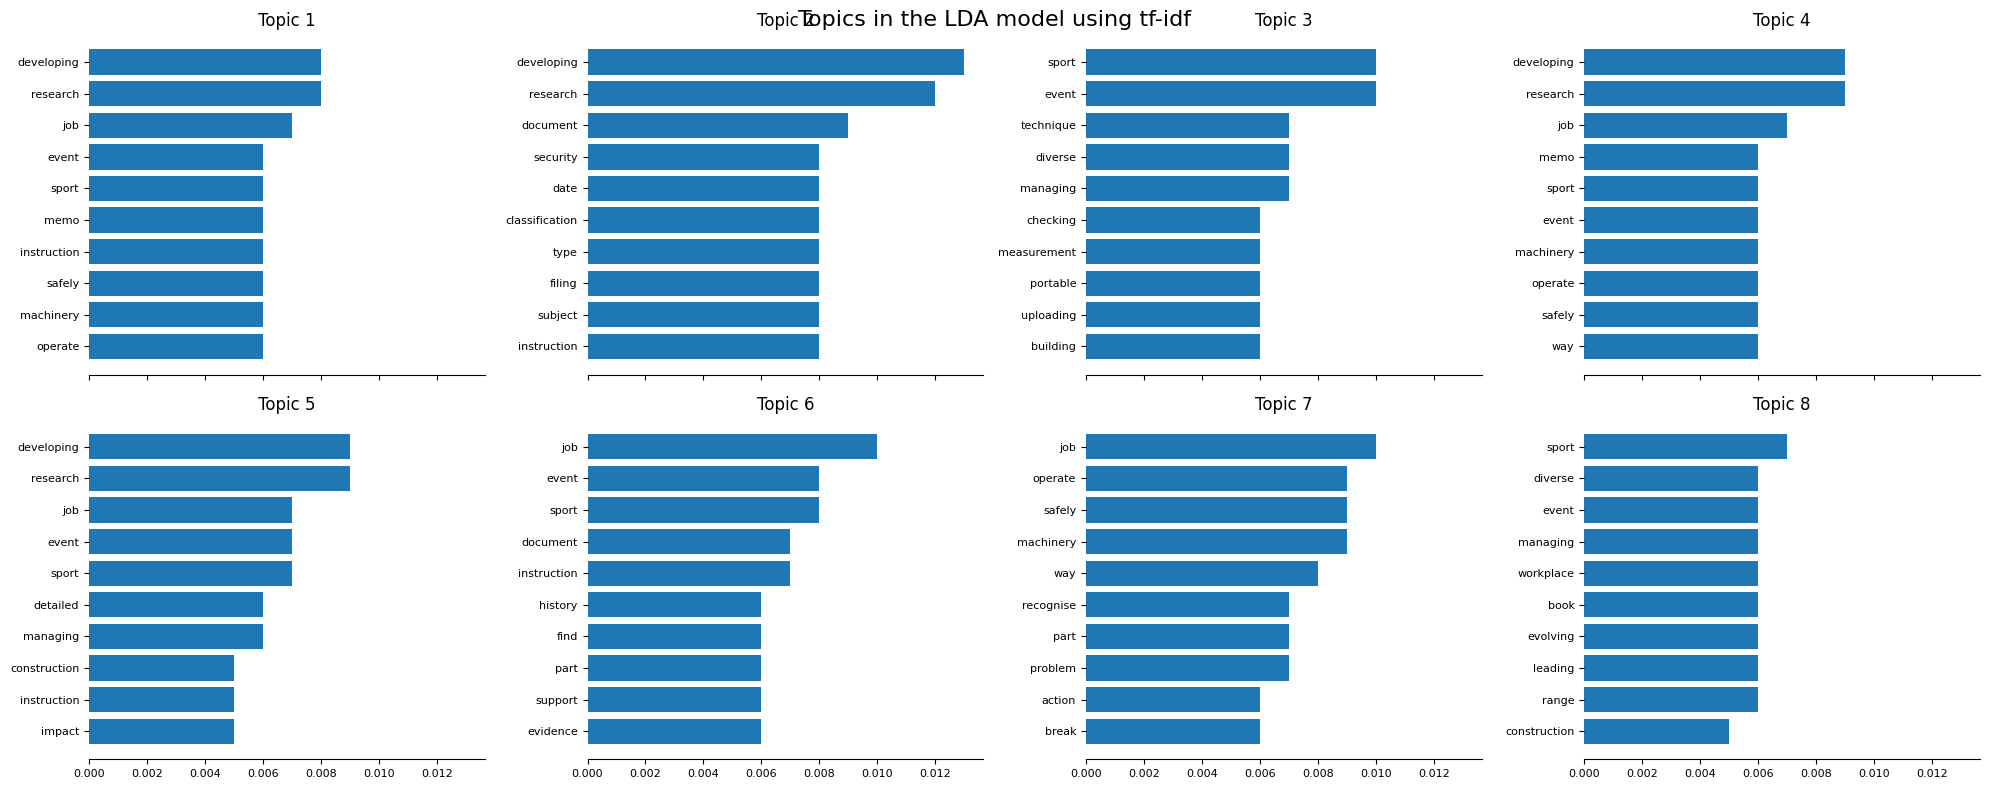

      Dominant_Topic  Perc_Contribution  \
0                  2             0.4611   
1                  2             0.8980   
2                  2             0.8957   
3                  2             0.8957   
4                  1             0.9000   
...              ...                ...   
1096               5             0.8991   
1097               2             0.9039   
1098               6             0.8864   
1099               2             0.9032   
1100               4             0.8978   

                                         Topic_Keywords  index  \
0     sport, event, technique, diverse, managing, ch...      0   
1     sport, event, technique, diverse, managing, ch...      1   
2     sport, event, technique, diverse, managing, ch...      2   
3     sport, event, technique, diverse, managing, ch...      3   
4     developing, research, document, security, date...      4   
...                                                 ...    ...   
1096  job, event, spo

In [640]:
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import math

# Create TF-IDF model using the same pre-processed corpus
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Train the LDA model
num_topics = 8
lda_model = LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=8, random_state=42)

# Print the topics
print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Visualize the topics in bar plots
def plot_top_words(model, feature_names, n_top_words, title):
    # Get the number of topics
    num_topics = len(model.print_topics(-1))

    # Calculate the number of rows and columns for subplots
    num_cols = min(4, num_topics)  # Maximum 4 columns
    num_rows = math.ceil(num_topics / num_cols)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), sharex=True)
    axes = axes.flatten() if num_topics > 1 else [axes]

    for topic_idx, topic in model.print_topics(-1):
        # Use regex to extract words and weights
        words_weights = re.findall(r'(0\.\d+)\*"(.+?)"', topic)

        if words_weights:
            weights, words = zip(*words_weights)
            weights = [float(w) for w in weights]
        else:
            print(f"No matches found for topic {topic_idx}")
            continue

        ax = axes[topic_idx]
        ax.barh(words[:n_top_words], weights[:n_top_words])
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    # Hide any unused subplots
    for idx in range(num_topics, len(axes)):
        axes[idx].set_visible(False)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
    plt.show()

plot_top_words(lda_model, dictionary.values(), n_top_words=10, title='Topics in the LDA model using tf-idf')

# Assign topics to documents
def format_topics_sentences(ldamodel, corpus):
    topics_df = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break

    return pd.DataFrame(topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

# Use the function
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf)

# Combine original dataframe with the topic dataframe
df_dominant_topic = pd.concat([df_topic_sents_keywords, cc_nlp_2.reset_index()], axis=1)
print(df_dominant_topic)

In [641]:
df_dominant_topic.head()

Dominant_Topic  Perc_Contribution  \
0               2             0.4611   
1               2             0.8980   
2               2             0.8957   
3               2             0.8957   
4               1             0.9000   

                                      Topic_Keywords  index  \
0  sport, event, technique, diverse, managing, ch...      0   
1  sport, event, technique, diverse, managing, ch...      1   
2  sport, event, technique, diverse, managing, ch...      2   
3  sport, event, technique, diverse, managing, ch...      3   
4  developing, research, document, security, date...      4   

                                        ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to document ...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Liaises with patients, clients, visitors to ho...   
2  Provides services relating to compliance-based...   
3  Accountants provide services relating to finan...   
4  Accounting Clerks monitor creditor and debtor ...   

                                  Anchor Value Clean  
0  build and maintain an effective online profile...  
1  use software on a portable device to document ...  
2  write software for keeping track of items in a...  
3  write software for keeping track of items in a...  
4  use software on a portable device to document ...

In [642]:
# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = df_dominant_topic[df_dominant_topic['ANZSCO Title'] == 'Data Scientist']['Dominant_Topic'].values[0]



# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs_tf = df_dominant_topic[df_dominant_topic['Dominant_Topic'] == data_scientist_topic]

# Display the relevant columns for these specific rows



In [643]:
same_topic_jobs_tf[['ANZSCO Title', 'Dominant_Topic']].head(119)

ANZSCO Title  Dominant_Topic
7                                             Actuary               4
14                                    Aeroplane Pilot               4
17                            Agricultural Consultant               4
19                    Agricultural Research Scientist               4
23    Agricultural, Fisheries and Forestry Scientists               4
...                                               ...             ...
981                                          Surveyor               4
1020        Traditional Chinese Medicine Practitioner               4
1039                  University Lecturers and Tutors               4
1043                       Urban and Regional Planner               4
1100                                        Zoologist               4

[119 rows x 2 columns]

In [644]:

# Export same_topic_jobs to an Excel file
same_topic_jobs[['ANZSCO Title', 'Dominant Topic']].to_excel('CC_TFIDF_Jobs.xlsx', index=False)


In [645]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_clean_values, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("LDA Model Coherence Score:", coherence_score)


import gensim
from gensim.models import LdaModel

# Assuming you already have a trained LDA model and a corpus
# lda_model is your trained Gensim LDA model
# corpus is your bag-of-words representation of the document set

perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")



LDA Model Coherence Score: 0.5684951881634328
Perplexity: -5.815538946125697


#### TT

##### EDA

In [646]:
tt_nlp = tt_merged_df.copy()

In [647]:
tt_nlp.head()

Technology Tool Category  \
2137  Geographical guidance and navigation technologies   
1842  Geographical guidance and navigation technologies   
1950  Geographical guidance and navigation technologies   
3687             Logistics and fleet management systems   
4195    Payroll and human resource management platforms   

                   Technology Tool Category Description  \
2137  Systems for real-time navigation, mapping and ...   
1842  Systems for real-time navigation, mapping and ...   
1950  Systems for real-time navigation, mapping and ...   
3687  Systems for logistics, vehicle despatch, and f...   
4195  Systems to undertake human resource management...   

                                Technology Tool  \
2137                           Mapping software   
1842  Aviation and marine communication systems   
1950            GPS and navigation technologies   
3687               Barcode reading technologies   
4195                   Human resources software   

                            Technology Tool Description  \
2137             Software used to create and edit maps.   
1842  Radio and communications apparatus that enable...   
1950  Devices or software that receive and provide G...   
3687  Apparatus that reads 2D and 3D barcode typolog...   
4195  Software and systems used to manage employee a...   

                   Technology Tool Extended Description  \
2137  Mapping software encompasses software and tool...   
1842  Aviation and marine communication systems enco...   
1950  GPS and navigation technologies encompasses th...   
3687  Barcode reading technologies encompasses the r...   
4195  Human resources software encompasses software ...   

            Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
2137           Specialisation         399911                S01   
1842           Specialisation         399911                S01   
1950           Specialisation         399911                S01   
3687  NEC Category Occupation         149999                N01   
4195  NEC Category Occupation         149999                N01   

          ANZSCO Title Emerging/Trending Flag  \
2137     Abalone Diver                    NaN   
1842     Abalone Diver                    NaN   
1950     Abalone Diver                    NaN   
3687  Abattoir Manager                    NaN   
4195  Abattoir Manager                    NaN   

                                     ANZSCO Description  \
2137  Commercially harvests abalone from underwater ...   
1842  Commercially harvests abalone from underwater ...   
1950  Commercially harvests abalone from underwater ...   
3687  Directly supervise and coordinate the activiti...   
4195  Directly supervise and coordinate the activiti...   

      Technology Tool Example Count  
2137                            5.0  
1842                            2.0  
1950                            5.0  
3687                            5.0  
4195                            5.0

In [648]:
tt_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5760 entries, 2137 to 5487
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  ANZSCO Description                    5736 non-null   object 
 11  Technology Tool Exa

In [651]:
import pandas as pd

# Assuming your DataFrame is named tt_nlp
# Group by 'ANZSCO Title' and aggregate the other columns
tt_nlp_aggregated = tt_nlp.groupby('ANZSCO Title').agg(
    {
        'Occupation Type_x': 'first',                         # Keep the first value of 'Occupation Type_x'
        'ANZSCO Code_x': 'first',                               # Keep the first value of 'ANZSCO Code'
        'Sub-Profile Code_x': 'first',                         # Keep the first value of 'Sub-Profile Code_x'
        'Technology Tool Category': ' '.join,                 # Merge the 'Technology Tool Category' into a single string
        'Technology Tool Category Description': ' '.join,     # Merge 'Technology Tool Category Description'
        'Technology Tool': ' '.join,                          # Merge the 'Technology Tool' values
        'Technology Tool Description': ' '.join,              # Merge the 'Technology Tool Description' values
        'Technology Tool Extended Description': ' '.join,     # Merge the 'Technology Tool Extended Description'
        'Emerging/Trending Flag': 'first',                     # Keep the first value of 'Emerging/Trending Flag'
        'ANZSCO Description': 'first',                         # Keep the first value of 'ANZSCO Description'
        'Technology Tool Example Count': 'sum'                # Sum the 'Technology Tool Example Count'
    }
).reset_index()

# Rename 'Anchor Value' column to 'Anchor Value Merged' if necessary (but 'Anchor Value' is not mentioned in your provided columns)
# tt_nlp_aggregated.rename(columns={'Anchor Value': 'Anchor Value Merged'}, inplace=True)

# Print the new aggregated DataFrame
print(tt_nlp_aggregated.head())


                                        ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...  

In [652]:
import pandas as pd
import re
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Assuming 'tt_nlp' is your DataFrame, and 'Technology Tool Extended Description' column contains the text you want to clean

# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Apply the text cleaning function to 'Technology Tool Extended Description' column
tt_nlp_aggregated['Technology Tool Extended Description'] = tt_nlp_aggregated['Technology Tool Extended Description'].apply(clean_text)
tt_nlp_aggregated['Technology Tool Description'] = tt_nlp_aggregated['Technology Tool Description'].apply(clean_text)



# Check the changes in the DataFrame
print(tt_nlp_aggregated[['Technology Tool Extended Description']].head())
print(tt_nlp_aggregated[['Technology Tool Description']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                Technology Tool Extended Description
0  mapping software encompasses software and tool...
1  barcode reading technologies encompasses the r...
2  elearning software encompasses software and ed...
3  medical examination measurement and monitoring...
4  graphics or photo imaging software encompasses...
                         Technology Tool Description
0  software used to create and edit maps radio an...
1  apparatus that reads d and d barcode typologie...
2  software to create digital and interactive lea...
3  medical apparatus that supports the clinical e...
4  software used to produce edit and manipulate d...


In [653]:
tt_nlp_aggregated.head()

ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...   
4  Graphic design and imagery technologies Commun...   

                Technology Tool Category Description  \
0  Systems for real-time navigation, mapping and ...   
1  Systems for logistics, vehicle despatch, and f...   
2  Systems for managing student records and educa...   
3  Medical instruments and technologies for treat...   
4  Software for graphic design and photographic e...   

                                     Technology Tool  \
0  Mapping software Aviation and marine communica...   
1  Barcode reading technologies Human resources s...   
2  E-learning software Project management softwar...   
3  Medical examination, measurement, and monitori...   
4  Graphics or photo imaging software Audio/video...   

                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                Technology Tool Extended Description Emerging/Trending Flag  \
0  mapping software encompasses software and tool...                   None   
1  barcode reading technologies encompasses the r...                   None   
2  elearning software encompasses software and ed...                   None   
3  medical examination measurement and monitoring...                   None   
4  graphics or photo imaging software encompasses...                   None   

                                  ANZSCO Description  \
0  Commercially harvests abalone from underwater ...   
1  Directly supervise and coordinate the activiti...   
2  Support and teaches the learning outcomes of A...   
3  Provides nursing care to individuals, families...   
4  Assists Aboriginal and Torres Strait Islander ...   

   Technology Tool Example Count  
0                           12.0  
1                           32.0  
2                           25.0  
3                           13.0  
4                           15.0

In [654]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')

# Step 1: Tokenize the text in the 'Anchor Value' column
w_stopword_ext_tt = tt_nlp_aggregated['Technology Tool Extended Description'].apply(word_tokenize)
w_stopword_desc_tt = tt_nlp_aggregated['Technology Tool Description'].apply(word_tokenize)

# Step 2: Check the changes in the DataFrame
tt_nlp_aggregated.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...   
4  Graphic design and imagery technologies Commun...   

                Technology Tool Category Description  \
0  Systems for real-time navigation, mapping and ...   
1  Systems for logistics, vehicle despatch, and f...   
2  Systems for managing student records and educa...   
3  Medical instruments and technologies for treat...   
4  Software for graphic design and photographic e...   

                                     Technology Tool  \
0  Mapping software Aviation and marine communica...   
1  Barcode reading technologies Human resources s...   
2  E-learning software Project management softwar...   
3  Medical examination, measurement, and monitori...   
4  Graphics or photo imaging software Audio/video...   

                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                Technology Tool Extended Description Emerging/Trending Flag  \
0  mapping software encompasses software and tool...                   None   
1  barcode reading technologies encompasses the r...                   None   
2  elearning software encompasses software and ed...                   None   
3  medical examination measurement and monitoring...                   None   
4  graphics or photo imaging software encompasses...                   None   

                                  ANZSCO Description  \
0  Commercially harvests abalone from underwater ...   
1  Directly supervise and coordinate the activiti...   
2  Support and teaches the learning outcomes of A...   
3  Provides nursing care to individuals, families...   
4  Assists Aboriginal and Torres Strait Islander ...   

   Technology Tool Example Count  
0                           12.0  
1                           32.0  
2                           25.0  
3                           13.0  
4                           15.0

In [655]:
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_stop_ext = w_stopword_ext_tt.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_desc =w_stopword_desc_tt.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
# Print sample output
print(lemmatized_stop_ext.head())
print(lemmatized_stop_desc.head())




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [mapping, software, encompasses, software, and...
1    [barcode, reading, technology, encompasses, th...
2    [elearning, software, encompasses, software, a...
3    [medical, examination, measurement, and, monit...
4    [graphic, or, photo, imaging, software, encomp...
Name: Technology Tool Extended Description, dtype: object
0    [software, used, to, create, and, edit, map, r...
1    [apparatus, that, read, d, and, d, barcode, ty...
2    [software, to, create, digital, and, interacti...
3    [medical, apparatus, that, support, the, clini...
4    [software, used, to, produce, edit, and, manip...
Name: Technology Tool Description, dtype: object


In [656]:
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from lemmatized_stop_values
lemmatized_clean_ext = lemmatized_stop_ext.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_desc = lemmatized_stop_desc.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Print sample output of lemmatized_clean_values
print(lemmatized_clean_ext.head())
print(lemmatized_clean_desc.head())


0    [mapping, software, encompasses, software, too...
1    [barcode, reading, technology, encompasses, re...
2    [elearning, software, encompasses, software, e...
3    [medical, examination, measurement, monitoring...
4    [graphic, photo, imaging, software, encompasse...
Name: Technology Tool Extended Description, dtype: object
0    [software, used, create, edit, map, radio, com...
1    [apparatus, read, barcode, typology, format, s...
2    [software, create, digital, interactive, learn...
3    [medical, apparatus, support, clinical, examin...
4    [software, used, produce, edit, manipulate, di...
Name: Technology Tool Description, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-657-ca01783a19f4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


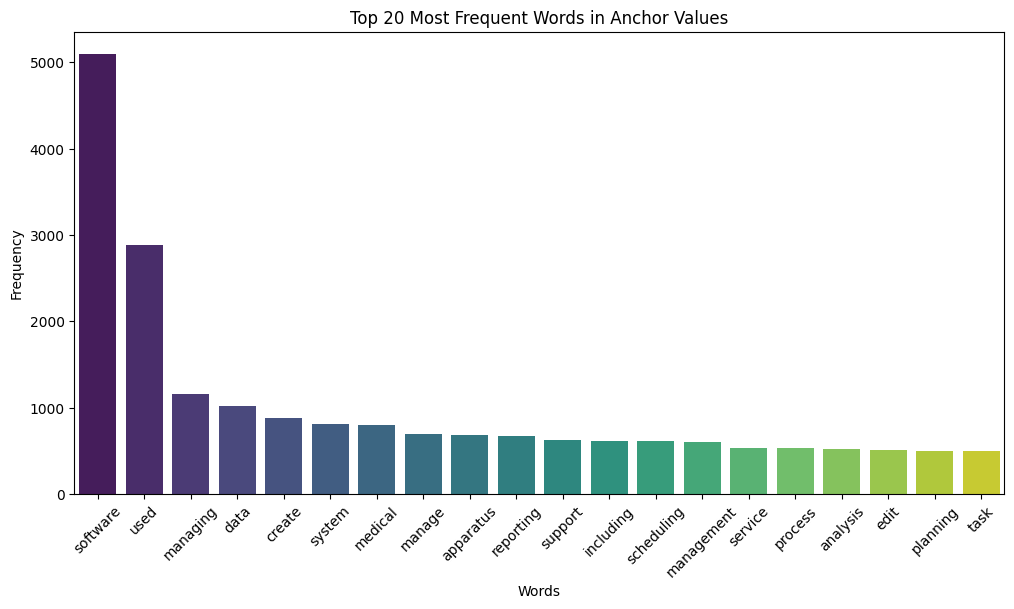

In [657]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words
all_words = [word for words in lemmatized_clean_desc for word in words]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


In [658]:
# Define custom stopwords
custom_stopwords = stop_words.union({'software'})  # Add 'software' to the existing stopwords set

# Remove stopwords including 'software'
lemmatized_clean_ext = lemmatized_stop_ext.apply(
    lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords]
)

lemmatized_clean_desc = lemmatized_stop_desc.apply(
    lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords]
)

# Print sample output
print(lemmatized_clean_ext.head())
print(lemmatized_clean_desc.head())


0    [mapping, encompasses, toolsets, assist, creat...
1    [barcode, reading, technology, encompasses, re...
2    [elearning, encompasses, educational, system, ...
3    [medical, examination, measurement, monitoring...
4    [graphic, photo, imaging, encompasses, toolset...
Name: Technology Tool Extended Description, dtype: object
0    [used, create, edit, map, radio, communication...
1    [apparatus, read, barcode, typology, format, s...
2    [create, digital, interactive, learning, resou...
3    [medical, apparatus, support, clinical, examin...
4    [used, produce, edit, manipulate, digital, ima...
Name: Technology Tool Description, dtype: object


In [659]:
from collections import Counter

# Flatten the lists of words and count occurrences
ext_word_counts = Counter([word for tokens in lemmatized_clean_ext for word in tokens])
desc_word_counts = Counter([word for tokens in lemmatized_clean_desc for word in tokens])

# Get the number of unique words
unique_words_ext = len(ext_word_counts)
unique_words_desc = len(desc_word_counts)

print(f"Unique words in lemmatized_clean_ext: {unique_words_ext}")
print(f"Unique words in lemmatized_clean_desc: {unique_words_desc}")


Unique words in lemmatized_clean_ext: 837
Unique words in lemmatized_clean_desc: 451



🔹 Top 20 Bigrams:
technology tool: 2123
management system: 1634
tool may: 1385
encompasses system: 1283
data analysis: 1262
may interlink: 1072
statistical data: 1025
business intelligence: 937
intelligence decision: 937
decision support: 937
social medium: 915
encompasses toolsets: 894
system support: 713
creation editing: 653
project management: 632
procurement supply: 588
supply chain: 588
industrial control: 576
control automation: 576
inventory management: 555

🔹 Top 20 Trigrams:
technology tool may: 1147
statistical data analysis: 1025
business intelligence decision: 937
intelligence decision support: 937
procurement supply chain: 588
industrial control automation: 576
social medium platform: 549
tool may interlink: 473
project management incorporates: 443
management incorporates package: 443
incorporates package system: 443
package system support: 443
system support managing: 443
support managing project: 443
managing project planning: 443
project planning scheduling: 443
plann

<ipython-input-660-3b2da7f7fa4b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


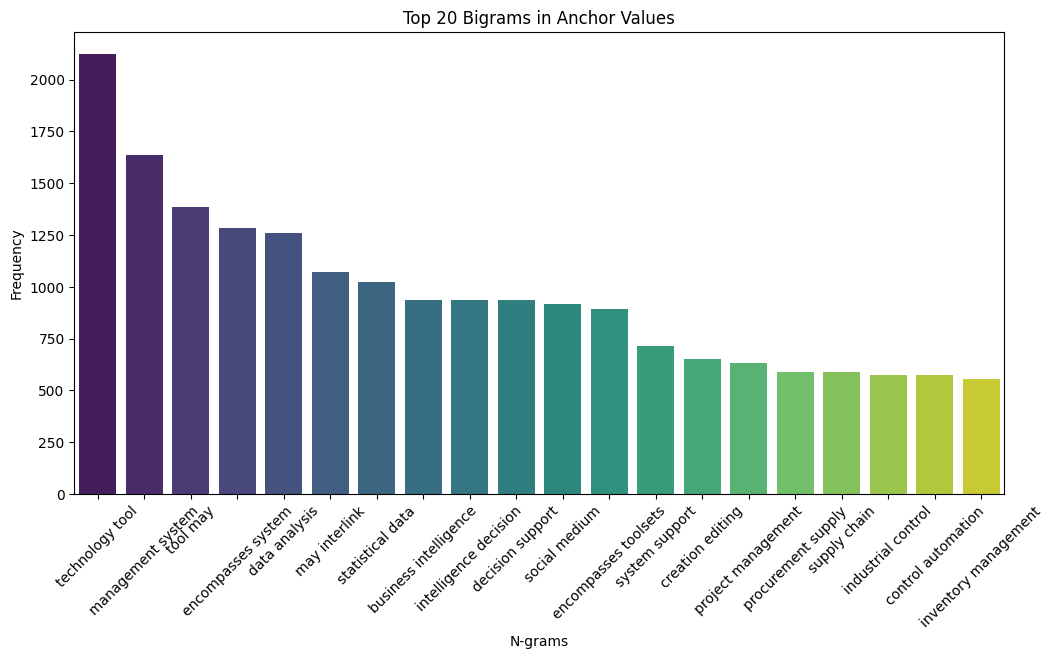

<ipython-input-660-3b2da7f7fa4b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


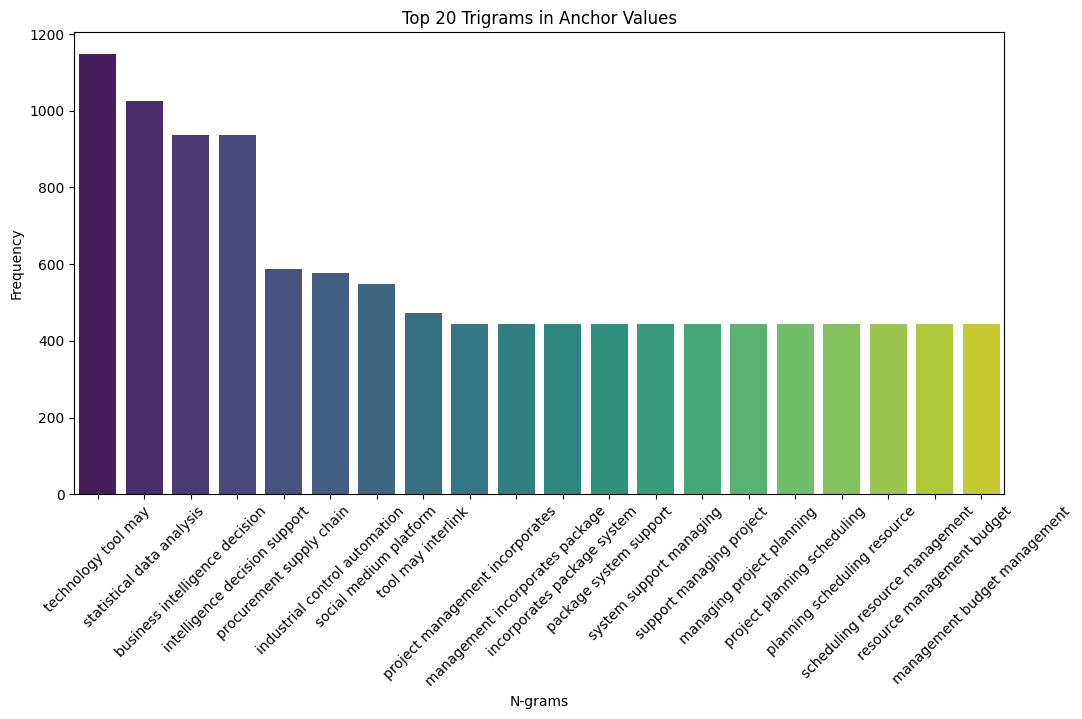

In [660]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat = [word for words in lemmatized_clean_ext for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")

# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")


In [661]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat_desc = [word for words in lemmatized_clean_desc for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat_desc, 2))
trigrams = list(ngrams(filtered_words_flat_desc, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams




🔹 Top 20 Bigrams:
used create: 747
planning documenting: 443
documenting managing: 443
managing project: 443
project including: 443
including managing: 443
managing milestone: 443
milestone task: 443
task scheduling: 443
scheduling budgeting: 443
used manage: 376
system used: 339
gathering storage: 305
storage analysis: 305
analysis reporting: 305
reporting data: 305
data required: 305
required make: 305
make strategic: 305
strategic business: 305

🔹 Top 20 Trigrams:
planning documenting managing: 443
documenting managing project: 443
managing project including: 443
project including managing: 443
including managing milestone: 443
managing milestone task: 443
milestone task scheduling: 443
task scheduling budgeting: 443
gathering storage analysis: 305
storage analysis reporting: 305
analysis reporting data: 305
reporting data required: 305
data required make: 305
required make strategic: 305
make strategic business: 305
strategic business decision: 305
system used manage: 271
managing

<ipython-input-662-aab2123685b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


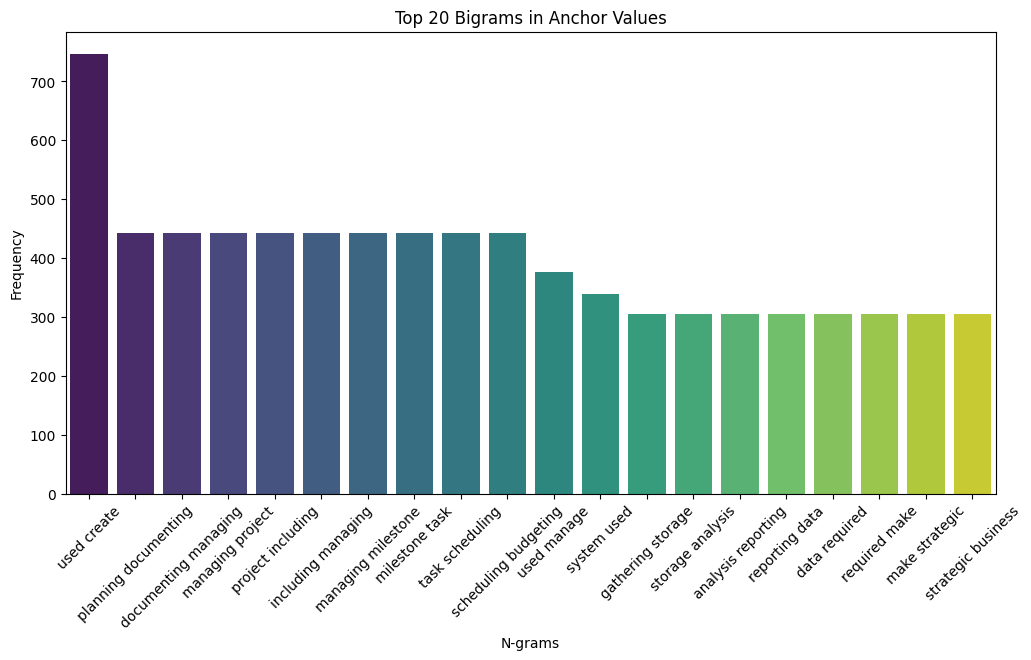

In [662]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")



<ipython-input-662-aab2123685b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


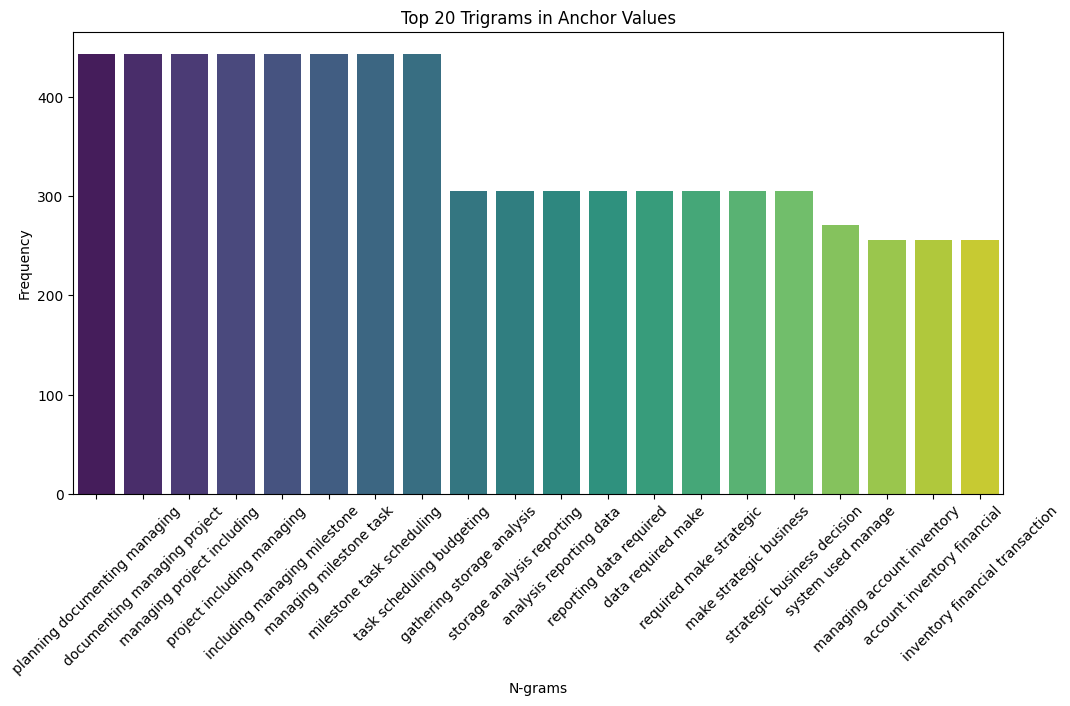

In [663]:
# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")

##### Cluster

In [664]:
lemmatized_clean_desc.head()

0    [used, create, edit, map, radio, communication...
1    [apparatus, read, barcode, typology, format, s...
2    [create, digital, interactive, learning, resou...
3    [medical, apparatus, support, clinical, examin...
4    [used, produce, edit, manipulate, digital, ima...
Name: Technology Tool Description, dtype: object

In [665]:
tt_nlp_cluster = tt_nlp_aggregated.copy()

In [666]:
tt_nlp_cluster.head()

ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...   
4  Graphic design and imagery technologies Commun...   

                Technology Tool Category Description  \
0  Systems for real-time navigation, mapping and ...   
1  Systems for logistics, vehicle despatch, and f...   
2  Systems for managing student records and educa...   
3  Medical instruments and technologies for treat...   
4  Software for graphic design and photographic e...   

                                     Technology Tool  \
0  Mapping software Aviation and marine communica...   
1  Barcode reading technologies Human resources s...   
2  E-learning software Project management softwar...   
3  Medical examination, measurement, and monitori...   
4  Graphics or photo imaging software Audio/video...   

                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                Technology Tool Extended Description Emerging/Trending Flag  \
0  mapping software encompasses software and tool...                   None   
1  barcode reading technologies encompasses the r...                   None   
2  elearning software encompasses software and ed...                   None   
3  medical examination measurement and monitoring...                   None   
4  graphics or photo imaging software encompasses...                   None   

                                  ANZSCO Description  \
0  Commercially harvests abalone from underwater ...   
1  Directly supervise and coordinate the activiti...   
2  Support and teaches the learning outcomes of A...   
3  Provides nursing care to individuals, families...   
4  Assists Aboriginal and Torres Strait Islander ...   

   Technology Tool Example Count  
0                           12.0  
1                           32.0  
2                           25.0  
3                           13.0  
4                           15.0

In [667]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Ensure that NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')

# List of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to clean the text (remove special characters, digits, etc.)
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Function to remove stopwords from tokenized words
def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)  # Join the filtered tokens back into a string

# Apply the cleaning and stopword removal functions to the desired column
tt_nlp_cluster['cleaned_tokenized_text'] = tt_nlp_cluster['Technology Tool Description'].apply(clean_text)
tt_nlp_cluster['cleaned_no_stopwords'] = tt_nlp_cluster['cleaned_tokenized_text'].apply(remove_stopwords)

# Check the cleaned and stopword-removed column
print(tt_nlp_cluster[['Technology Tool Description', 'cleaned_no_stopwords']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                                cleaned_no_stopwords  
0  software used create edit maps radio communica...  
1  apparatus reads barcode typologies formats sof...  
2  software create digital interactive learning r...  
3  medical apparatus supports clinical examinatio...  
4  software used produce edit manipulate digital ...  


In [668]:
# Import the necessary libraries

import sklearn # Popular machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

In [669]:
# Ensure the lengths match before assigning
tt_nlp_cluster["lemmatized_clean_desc"] = lemmatized_clean_desc

# Print sample output to verify
print(tt_nlp_cluster.head())


                                        ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...  

In [731]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized lists into space-separated strings
tt_nlp_cluster['lemmatized_clean_desc_str'] = tt_nlp_cluster['lemmatized_clean_desc'].apply(lambda tokens: ' '.join(tokens))

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tt_nlp_cluster['lemmatized_clean_desc_str'])

# Print the shape of the transformed matrix
print(X.shape)


(1317, 451)


In [732]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 451


In [672]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
used => 425
create => 90
edit => 128
map => 242
radio => 326


In [673]:
#Import required packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [733]:
# Function to plot the Elbow Method
def plot_elbow_method(X):
    sse = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

In [734]:
# Function to plot the Silhouette Method
def plot_silhouette_method(X):
    silhouette_avg_scores = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_avg_scores.append(silhouette_avg)
    plt.figure()
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

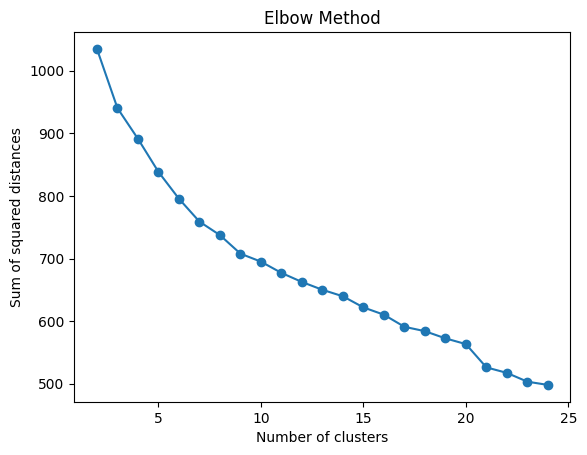

In [676]:
# Plot Elbow Method
plot_elbow_method(X)

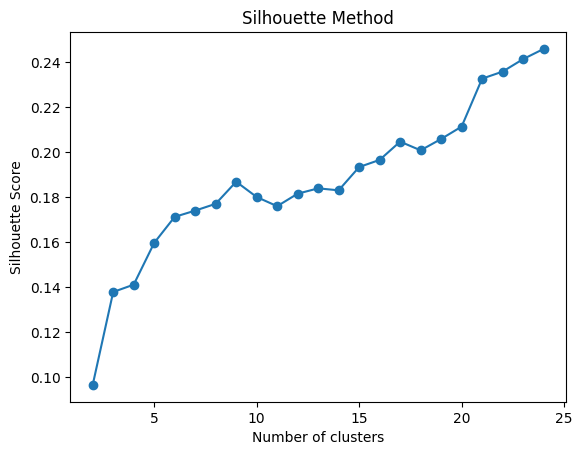

In [677]:
plot_silhouette_method(X)

In [735]:
# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=42)

In [736]:
# Get the cluster labels
labels = kmeans.labels_
print(labels)

[4 1 2 ... 0 6 3]


In [680]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.1868483288040553


In [681]:
# Create a DataFrame to display the results
clustered_docs = pd.DataFrame({'Document': tt_nlp_cluster['lemmatized_clean_desc'], 'Cluster': labels})

In [682]:
merged_df = pd.concat([clustered_docs, tt_nlp_cluster], axis=1)


In [683]:
# Display a few documents from each cluster
for i in range(5):
    print(f"\nCluster {i} documents:")
    print(clustered_docs[clustered_docs['Cluster'] == i].head(3))  # Display first 3 documents in each cluster


Cluster 0 documents:
                                             Document  Cluster
28  [scientific, laboratory, apparatus, used, unde...        0
30  [scientific, laboratory, apparatus, used, unde...        0
32  [automating, monitoring, controlling, robotic,...        0

Cluster 1 documents:
                                            Document  Cluster
1  [apparatus, read, barcode, typology, format, s...        1
6  [monitoring, analysing, reporting, financial, ...        1
7  [system, used, manage, monitor, track, stock, ...        1

Cluster 2 documents:
                                             Document  Cluster
2   [create, digital, interactive, learning, resou...        2
4   [used, produce, edit, manipulate, digital, ima...        2
11  [us, electronic, file, versioning, indexing, m...        2

Cluster 3 documents:
                                             Document  Cluster
14  [infrastructure, used, house, large, volume, d...        3
20  [infrastructure, used, process

In [688]:
# Filter rows where 'ANZSCO Title' is 'Data Scientist'
data_scientist_cluster = merged_df[merged_df['ANZSCO Title'] == 'Data Scientist']
data_scientist_cluster1 = merged_df[merged_df['ANZSCO Title'] == 'Data Analyst']
data_scientist_cluster2 = merged_df[merged_df['ANZSCO Title'] == 'Mathematician']

# Display the cluster(s) where 'Data Scientist' appears
print(data_scientist_cluster[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster1[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster2[['ANZSCO Title', 'Cluster']])


       ANZSCO Title  Cluster
303  Data Scientist        3
     ANZSCO Title  Cluster
301  Data Analyst        3
      ANZSCO Title  Cluster
715  Mathematician        3


In [689]:
# Get the unique cluster(s) where 'Data Analyst' appears
data_scientist_clusters = merged_df[merged_df['ANZSCO Title'] == 'Data Scientist']['Cluster'].unique()

# Create a new DataFrame with only rows in the same cluster(s) as 'Data Analyst'
same_cluster_df = merged_df[merged_df['Cluster'].isin(data_scientist_clusters)]

# Display the new DataFrame
print(same_cluster_df.head())






                                             Document  Cluster  \
14  [infrastructure, used, house, large, volume, d...        3   
20  [infrastructure, used, process, analyse, large...        3   
24  [used, create, diagram, design, model, image, ...        3   
27  [device, receive, provide, gps, coordinate, in...        3   
31  [device, receive, provide, gps, coordinate, in...        3   

                                       ANZSCO Title Occupation Type_x  \
14                                          Actuary          ANZSCO 6   
20                            Aeronautical Engineer          ANZSCO 6   
24                          Agricultural Consultant          ANZSCO 6   
27                  Agricultural Research Scientist          ANZSCO 6   
31  Agricultural, Fisheries and Forestry Scientists          ANZSCO 4   

    ANZSCO Code_x Sub-Profile Code_x  \
14         224111               None   
20         233911               None   
24         234111               None   
27  

In [690]:
# Export same_topic_jobs to an Excel file
same_cluster_df[['ANZSCO Title', 'Cluster']].to_excel('TT_Cluster_Job.xlsx', index=False)

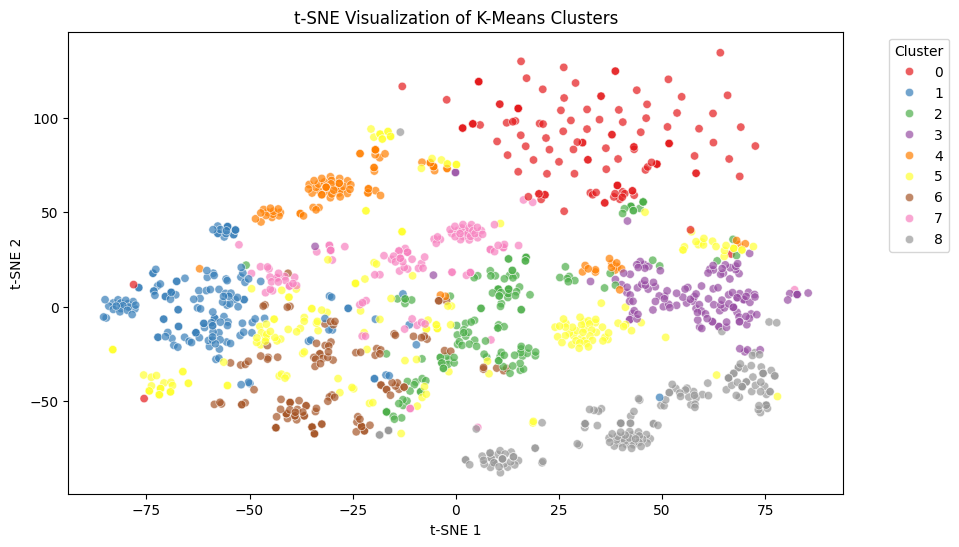

In [737]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Ensure kmeans is trained
#kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_labels = labels  # Assign cluster labels

# 🔹 (Optional) Apply PCA first (use only if X is high-dimensional)
use_pca = False  # Change to True to enable PCA before t-SNE

if use_pca:
    pca = PCA(n_components=50, random_state=42)  # Reduce to 50D before t-SNE
    X_reduced = pca.fit_transform(X.toarray())
else:
    X_reduced = X.toarray()

# 🔹 Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(X_reduced)

# 🔹 Convert to DataFrame for easy plotting
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE 1', 'TSNE 2'])
df_tsne['Cluster'] = kmeans_labels

# 🔹 Plot t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE 1', y='TSNE 2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### ST

#####EDA

In [692]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/Trending Flag       1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  ANZSCO Description           30450 non-null  object 
dtypes: float64(3), i

In [693]:
st_nlp = st_merged_df.copy()

In [694]:
st_nlp.head()

Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
0          ANZSCO 4           1111                NaN   
1          ANZSCO 4           1111                NaN   
2          ANZSCO 4           1111                NaN   
3          ANZSCO 4           1111                NaN   
4          ANZSCO 4           1111                NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1  Chief Executives and Managing Directors   
2  Chief Executives and Managing Directors   
3  Chief Executives and Managing Directors   
4  Chief Executives and Managing Directors   

                                     Specialist Task  % of time spent on task  \
0  Direct or manage financial activities or opera...                   0.1302   
1     Direct department or organisational activities                   0.1117   
2  Direct sales, marketing or customer service ac...                   0.0808   
3  Communicate with others to arrange, coordinate...                   0.0665   
4  Analyse data to assess operational or project ...                   0.0651   

  Emerging/Trending Flag                               Specialist Cluster_x  \
0                    NaN  Manage, monitor and undertake financial activi...   
1               Trending               Manage services, staff or activities   
2                    NaN               Manage services, staff or activities   
3                    NaN             Communicate or collaborate with others   
4                    NaN           Use data to inform operational decisions   

    % of time spent on cluster                              Cluster Family_x  \
0                       0.1644  Business operations and financial activities   
1                       0.2128  Business operations and financial activities   
2                       0.2128  Business operations and financial activities   
3                       0.0750               Communication and collaboration   
4                       0.1009                Data, analytics, and databases   

   % of time spent on family  \
0                     0.5322   
1                     0.5322   
2                     0.5322   
3                     0.0890   
4                     0.1370   

                                    Skills Statement  \
0  Direct and oversee the financial operations of...   
1  Direct and oversee the activities of a work un...   
2  Direct and oversee the sales, marketing, or cu...   
3  Coordinate with others in order to plan, organ...   
4  Analyse qualitative and quantitative data aris...   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  Chief Executives and Managing Directors determ...  
2  Chief Executives and Managing Directors determ...  
3  Chief Executives and Managing Directors determ...  
4  Chief Executives and Managing Directors determ...

In [696]:
# Aggregate the DataFrame based on 'ANZSCO Title_x' without any separator
aggregated_st = st_nlp.groupby('ANZSCO Title').agg({
    'Specialist Task': lambda x: ''.join(x.dropna().unique()),
    'Specialist Cluster_x': lambda x: ''.join(x.dropna().unique()),
    'Skills Statement': lambda x: ''.join(x.dropna().unique()),
}).reset_index()

# Display the aggregated DataFrame
print(aggregated_st.head())


                              ANZSCO Title  \
0                            Abalone Diver   
1                         Abattoir Manager   
2             Aboriginal Education Teacher   
3  Aboriginal Education Worker Coordinator   
4                  Aboriginal Health Nurse   

                                     Specialist Task  \
0  Capture or kill animalsClean machinery or equi...   
1  Comply with industry animal welfare requiremen...   
2  Act as a subject matter expert to inform stake...   
3  Develop staff working understanding of the cul...   
4  Administer first aidAdminister non-intravenous...   

                                Specialist Cluster_x  \
0  Trap, capture or kill animalsClean equipment, ...   
1  Provide animal care and trainingCommunicate wi...   
2  Collaborate with stakeholdersSupport diversity...   
3  Support diversity and inclusionAnalyse and eva...   
4  Provide basic health careProvide health care o...   

                                    Skills Statem

In [697]:
import pandas as pd
import re
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Assuming 'tt_nlp' is your DataFrame, and 'Technology Tool Extended Description' column contains the text you want to clean

# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Apply the text cleaning function to 'Technology Tool Extended Description' column
aggregated_st['Specialist Task'] = aggregated_st['Specialist Task'].apply(clean_text)
aggregated_st['Specialist Cluster_x'] = aggregated_st['Specialist Cluster_x'].apply(clean_text)
aggregated_st['Skills Statement'] = aggregated_st['Skills Statement'].apply(clean_text)

# Check the changes in the DataFrame
print(aggregated_st[['Specialist Task']].head())
print(aggregated_st[['Specialist Cluster_x']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                     Specialist Task
0  capture or kill animalsclean machinery or equi...
1  comply with industry animal welfare requiremen...
2  act as a subject matter expert to inform stake...
3  develop staff working understanding of the cul...
4  administer first aidadminister nonintravenous ...
                                Specialist Cluster_x
0  trap capture or kill animalsclean equipment to...
1  provide animal care and trainingcommunicate wi...
2  collaborate with stakeholderssupport diversity...
3  support diversity and inclusionanalyse and eva...
4  provide basic health careprovide health care o...


In [698]:
from nltk.tokenize import word_tokenize

# Tokenize the cleaned text
aggregated_st['token_Specialist_Task'] = aggregated_st['Specialist Task'].apply(word_tokenize)
aggregated_st['token_Specialist_Cluster_x'] = aggregated_st['Specialist Cluster_x'].apply(word_tokenize)
aggregated_st['token_Skills_Statement'] = aggregated_st['Skills Statement'].apply(word_tokenize)

# Check the changes in the DataFrame
print(aggregated_st[['token_Specialist_Task']].head())
print(aggregated_st[['token_Specialist_Cluster_x']].head())
print(aggregated_st[['token_Skills_Statement']].head())

                               token_Specialist_Task
0  [capture, or, kill, animalsclean, machinery, o...
1  [comply, with, industry, animal, welfare, requ...
2  [act, as, a, subject, matter, expert, to, info...
3  [develop, staff, working, understanding, of, t...
4  [administer, first, aidadminister, nonintraven...
                          token_Specialist_Cluster_x
0  [trap, capture, or, kill, animalsclean, equipm...
1  [provide, animal, care, and, trainingcommunica...
2  [collaborate, with, stakeholderssupport, diver...
3  [support, diversity, and, inclusionanalyse, an...
4  [provide, basic, health, careprovide, health, ...
                              token_Skills_Statement
0  [engage, in, the, capture, and, or, killing, o...
1  [apply, industry, standards, guidelines, and, ...
2  [act, as, a, subject, matter, expert, regardin...
3  [increase, staff, knowledge, of, the, cultural...
4  [take, action, immediately, following, an, ill...


In [699]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'aggregated_st' is your DataFrame and 'Specialist Task' and 'Specialist Cluster_x' contain the text to process

# Step 1: Tokenize the text

# Step 2: Lemmatize the tokenized words
lemmatized_stop_task = aggregated_st['token_Specialist_Task'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_cluster = aggregated_st['token_Specialist_Cluster_x'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_statement = aggregated_st['token_Skills_Statement'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Add the lemmatized tokens back to the DataFrame
aggregated_st['lemmatized_stop_Task'] = lemmatized_stop_task
aggregated_st['lemmatized_stop_Cluster_x'] = lemmatized_stop_cluster
aggregated_st['lemmatized_stop_Skills_Statement'] = lemmatized_stop_statement

# Check the changes in the DataFrame

# Print sample output
print(aggregated_st[['lemmatized_stop_Task']].head())
print(aggregated_st[['lemmatized_stop_Cluster_x']].head())
print(aggregated_st[['lemmatized_stop_Skills_Statement']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                lemmatized_stop_Task
0  [capture, or, kill, animalsclean, machinery, o...
1  [comply, with, industry, animal, welfare, requ...
2  [act, a, a, subject, matter, expert, to, infor...
3  [develop, staff, working, understanding, of, t...
4  [administer, first, aidadminister, nonintraven...
                           lemmatized_stop_Cluster_x
0  [trap, capture, or, kill, animalsclean, equipm...
1  [provide, animal, care, and, trainingcommunica...
2  [collaborate, with, stakeholderssupport, diver...
3  [support, diversity, and, inclusionanalyse, an...
4  [provide, basic, health, careprovide, health, ...
                    lemmatized_stop_Skills_Statement
0  [engage, in, the, capture, and, or, killing, o...
1  [apply, industry, standard, guideline, and, re...
2  [act, a, a, subject, matter, expert, regarding...
3  [increase, staff, knowledge, of, the, cultural...
4  [take, action, immediately, following, an, ill...


In [700]:
lemmatized_clean_task = lemmatized_stop_task.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_cluster = lemmatized_stop_cluster.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_statement = lemmatized_stop_statement.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Add the cleaned tokens back to the DataFrame
aggregated_st['lemmatized_clean_Task'] = lemmatized_clean_task
aggregated_st['lemmatized_clean_Cluster_x'] = lemmatized_clean_cluster
aggregated_st['lemmatized_clean_Skills_Statement'] = lemmatized_clean_statement

# Print sample output
print(aggregated_st[['lemmatized_clean_Task']].head())
print(aggregated_st[['lemmatized_clean_Cluster_x']].head())
print(aggregated_st[['lemmatized_clean_Skills_Statement']].head())

                               lemmatized_clean_Task
0  [capture, kill, animalsclean, machinery, equip...
1  [comply, industry, animal, welfare, requiremen...
2  [act, subject, matter, expert, inform, stakeho...
3  [develop, staff, working, understanding, cultu...
4  [administer, first, aidadminister, nonintraven...
                          lemmatized_clean_Cluster_x
0  [trap, capture, kill, animalsclean, equipment,...
1  [provide, animal, care, trainingcommunicate, o...
2  [collaborate, stakeholderssupport, diversity, ...
3  [support, diversity, inclusionanalyse, evaluat...
4  [provide, basic, health, careprovide, health, ...
                   lemmatized_clean_Skills_Statement
0  [engage, capture, killing, target, animal, saf...
1  [apply, industry, standard, guideline, regulat...
2  [act, subject, matter, expert, regarding, spec...
3  [increase, staff, knowledge, cultural, linguis...
4  [take, action, immediately, following, illness...


In [701]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords from 'Specialist Task'
filtered_words_flat_task = [word for words in lemmatized_clean_task for word in words]

# Generate bigrams and trigrams
bigrams_task = list(ngrams(filtered_words_flat_task, 2))
trigrams_task = list(ngrams(filtered_words_flat_task, 3))

# Count frequency of bigrams and trigrams
bigram_freq_task = Counter(bigrams_task)
trigram_freq_task = Counter(trigrams_task)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams_task = bigram_freq_task.most_common(20)
top_20_trigrams_task = trigram_freq_task.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams in Specialist Task:")
for bigram, count in top_20_bigrams_task:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams in Specialist Task:")
for trigram, count in top_20_trigrams_task:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams




🔹 Top 20 Bigrams in Specialist Task:
health care: 493
work piece: 461
material product: 320
material equipment: 319
equipment system: 283
ensure safety: 283
patient client: 258
organisational operational: 237
work order: 236
system ensure: 233
design blueprint: 226
blueprint specification: 226
specification diagram: 226
diagram work: 226
order documentation: 226
documentation determine: 226
determine work: 226
material resource: 222
material work: 221
ensure proper: 220

🔹 Top 20 Trigrams in Specialist Task:
equipment system ensure: 233
design blueprint specification: 226
blueprint specification diagram: 226
specification diagram work: 226
diagram work order: 226
work order documentation: 226
order documentation determine: 226
documentation determine work: 226
cultural diversity accessibility: 215
diversity accessibility need: 215
working understanding cultural: 207
understanding cultural diversity: 207
accessibility need others: 207
need others applies: 207
material resource equipmen

<ipython-input-702-3d6191309272>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


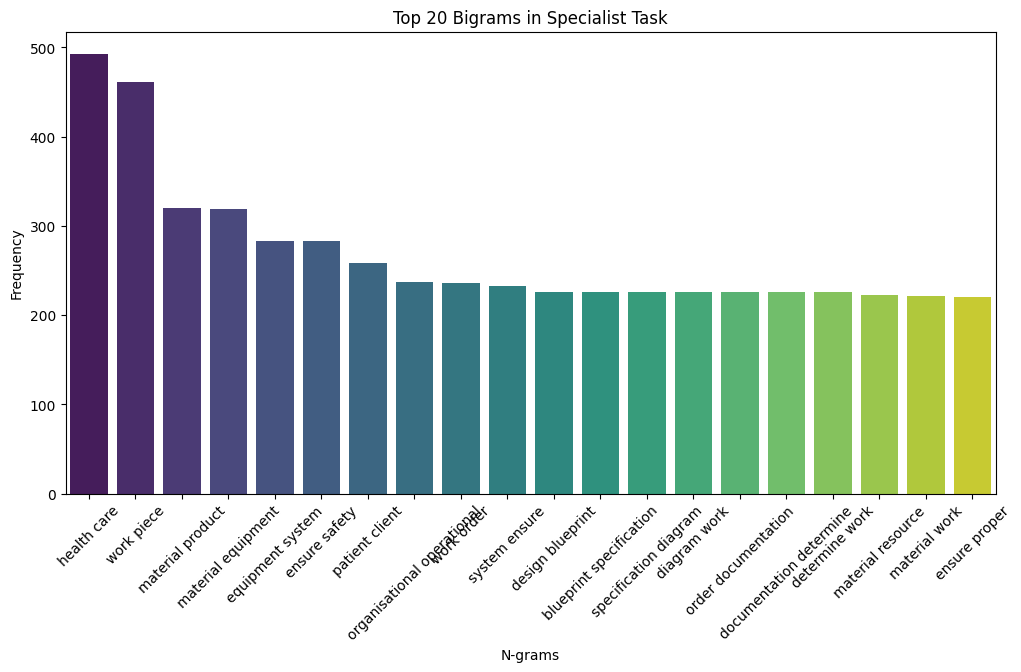

In [702]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams for Specialist Task
plot_ngrams(top_20_bigrams_task, "Top 20 Bigrams in Specialist Task")

# Plot Trigrams for Specialist Task


<ipython-input-702-3d6191309272>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


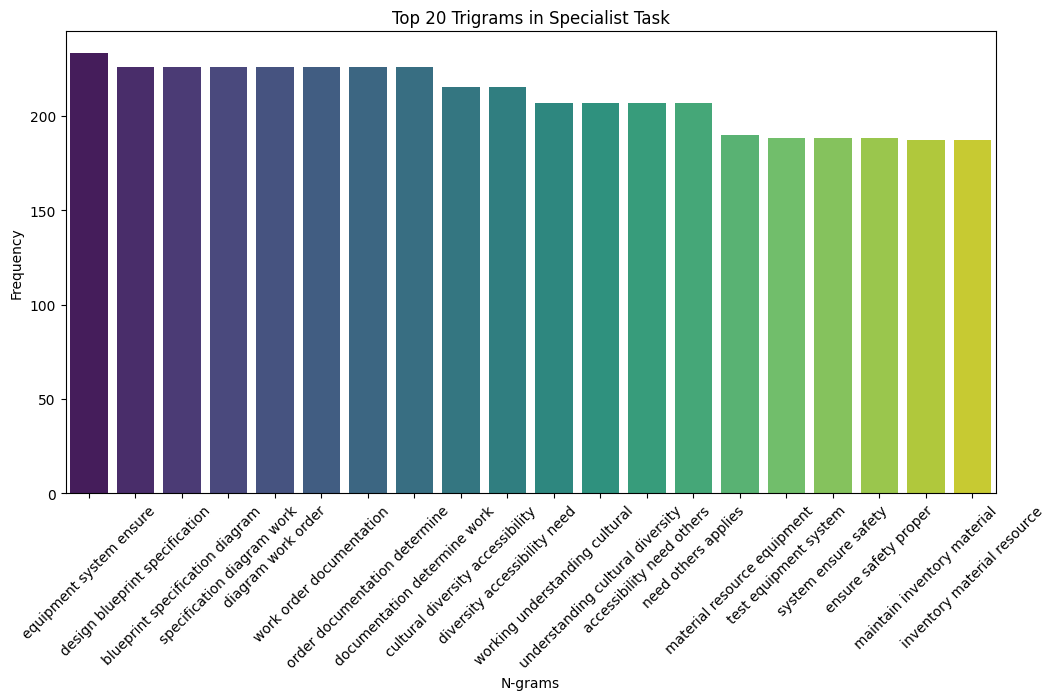

In [703]:
plot_ngrams(top_20_trigrams_task, "Top 20 Trigrams in Specialist Task")


🔹 Top 20 Bigrams in Specialist Task:
health care: 733
provide professional: 454
professional skill: 454
skill knowledge: 454
operational production: 410
test maintain: 394
maintain equipment: 393
customer service: 358
service communicate: 358
others coordinate: 333
handle resource: 290
equipment tool: 264
tool work: 264
health safety: 238
safety hazard: 238
hazard management: 238
management education: 238
service staff: 228
work order: 226
order project: 226

🔹 Top 20 Trigrams in Specialist Task:
provide professional skill: 454
professional skill knowledge: 454
test maintain equipment: 393
customer service communicate: 358
equipment tool work: 264
health safety hazard: 238
safety hazard management: 238
hazard management education: 238
work order project: 226
work area building: 222
compliance regulation standard: 214
document operational procedure: 210
production equipment make: 171
data inform operational: 169
calculate dimension distance: 166
dimension distance volume: 166
document 

<ipython-input-704-6ae8bbf490c1>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


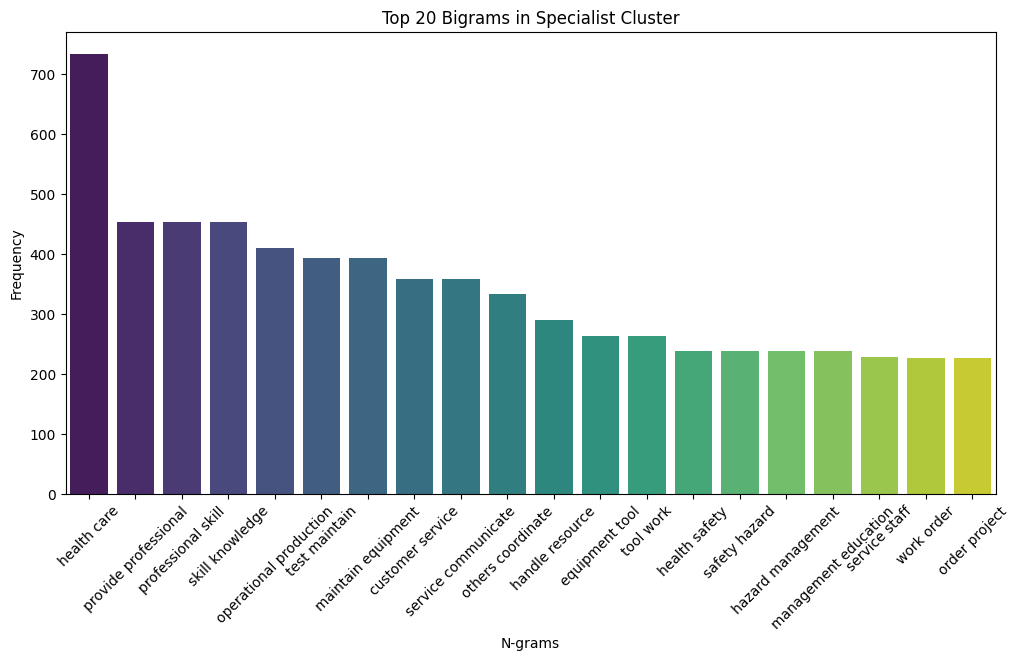

<ipython-input-704-6ae8bbf490c1>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


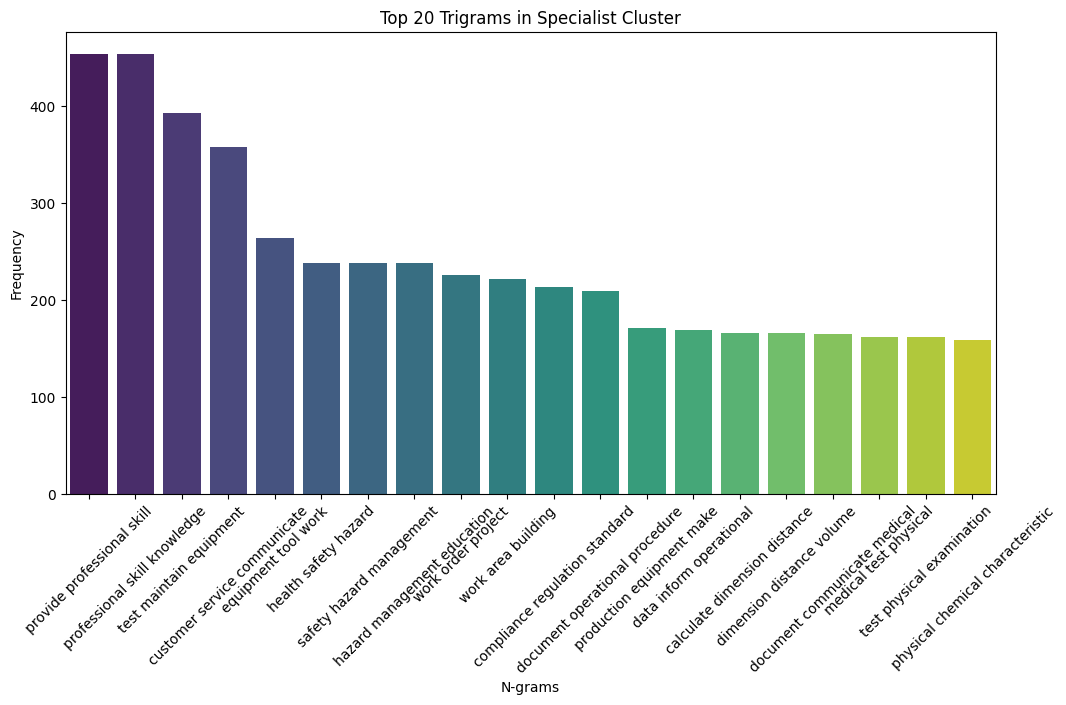

In [704]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords from 'Specialist Task'
filtered_words_flat_cluster = [word for words in lemmatized_clean_cluster for word in words]

# Generate bigrams and trigrams
bigrams_cluster = list(ngrams(filtered_words_flat_cluster, 2))
trigrams_cluster = list(ngrams(filtered_words_flat_cluster, 3))

# Count frequency of bigrams and trigrams
bigram_freq_cluster = Counter(bigrams_cluster)
trigram_freq_cluster = Counter(trigrams_cluster)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams_cluster = bigram_freq_cluster.most_common(20)
top_20_trigrams_cluster = trigram_freq_cluster.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams in Specialist Task:")
for bigram, count in top_20_bigrams_cluster:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams in Specialist Task:")
for trigram, count in top_20_trigrams_cluster:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams for Specialist Task
plot_ngrams(top_20_bigrams_cluster, "Top 20 Bigrams in Specialist Cluster")

# Plot Trigrams for Specialist Task
plot_ngrams(top_20_trigrams_cluster, "Top 20 Trigrams in Specialist Cluster")


In [705]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords from 'Specialist Task'
filtered_words_flat_cluster = [word for words in lemmatized_clean_statement for word in words]

# Generate bigrams and trigrams
bigrams_cluster = list(ngrams(filtered_words_flat_cluster, 2))
trigrams_cluster = list(ngrams(filtered_words_flat_cluster, 3))

# Count frequency of bigrams and trigrams
bigram_freq_cluster = Counter(bigrams_cluster)
trigram_freq_cluster = Counter(trigrams_cluster)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams_cluster = bigram_freq_cluster.most_common(20)
top_20_trigrams_cluster = trigram_freq_cluster.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams in Specialist Task:")
for bigram, count in top_20_bigrams_cluster:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams in Specialist Task:")
for trigram, count in top_20_trigrams_cluster:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams




🔹 Top 20 Bigrams in Specialist Task:
may include: 8654
may involve: 6614
health safety: 2530
relevant information: 1989
order ensure: 1794
may also: 1589
work activity: 1445
technical knowledge: 1422
work health: 1391
specialist technical: 1367
include providing: 1274
order determine: 1261
adhere relevant: 1213
regulation standard: 1204
policy procedure: 1196
relevant regulation: 1092
ensure safety: 1080
relevant standard: 1045
safety standard: 1033
select appropriate: 1027

🔹 Top 20 Trigrams in Specialist Task:
work health safety: 1391
may include providing: 1232
specialist technical knowledge: 1084
may also include: 895
project management task: 798
providing specialist technical: 742
procedure action reporting: 739
undertaking general project: 719
general project management: 719
requirement may include: 718
include providing specialist: 705
technical knowledge guidance: 705
may involve use: 696
personal protective equipment: 650
adhere relevant regulation: 645
follow operational pro

<ipython-input-706-5f7078ed6fc7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


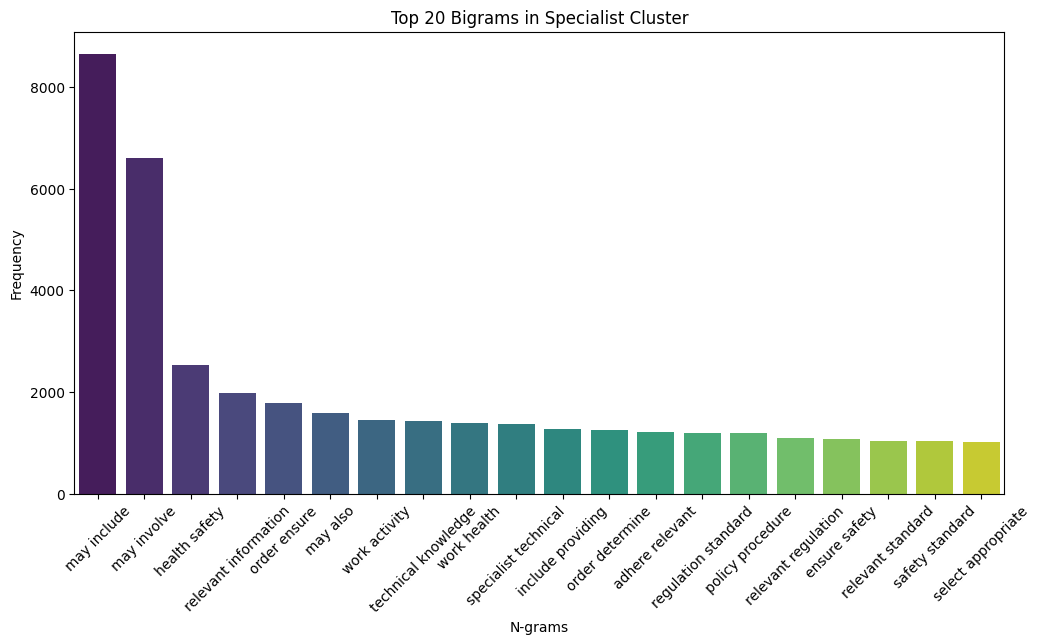

In [706]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams for Specialist Task
plot_ngrams(top_20_bigrams_cluster, "Top 20 Bigrams in Specialist Cluster")

# Plot Trigrams for Specialist Task


<ipython-input-706-5f7078ed6fc7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


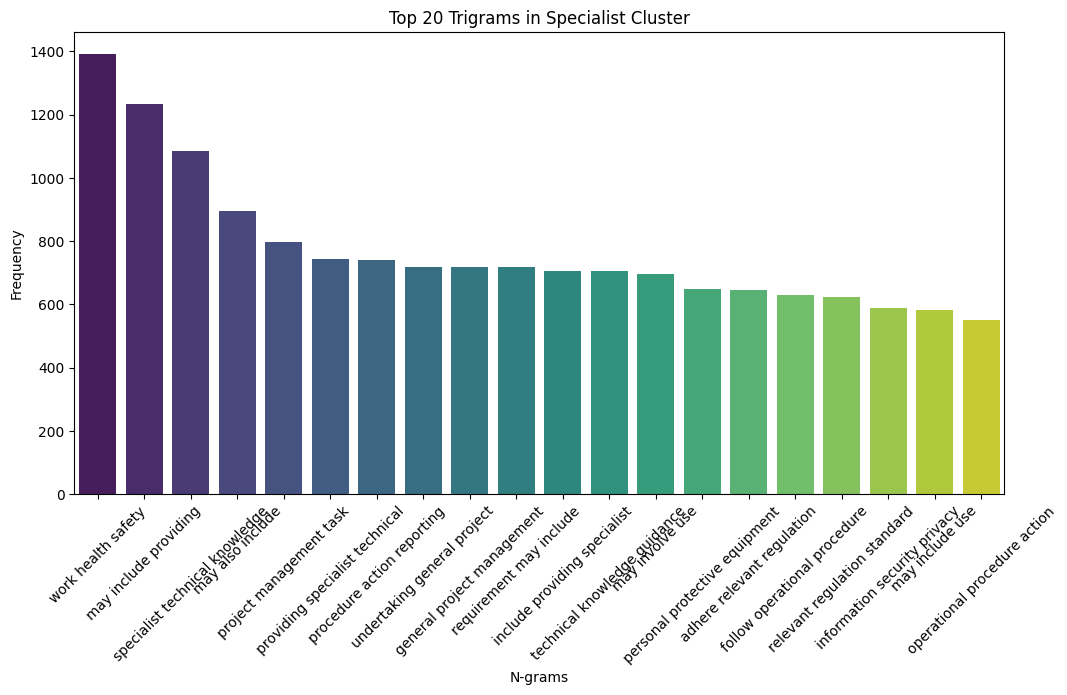

In [707]:
plot_ngrams(top_20_trigrams_cluster, "Top 20 Trigrams in Specialist Cluster")


##### Cluster

In [708]:
lemmatized_clean_statement.head()

0    [engage, capture, killing, target, animal, saf...
1    [apply, industry, standard, guideline, regulat...
2    [act, subject, matter, expert, regarding, spec...
3    [increase, staff, knowledge, cultural, linguis...
4    [take, action, immediately, following, illness...
Name: token_Skills_Statement, dtype: object

In [709]:
st_nlp_cluster = aggregated_st.copy()

In [710]:
st_nlp_cluster.head()

ANZSCO Title  \
0                            Abalone Diver   
1                         Abattoir Manager   
2             Aboriginal Education Teacher   
3  Aboriginal Education Worker Coordinator   
4                  Aboriginal Health Nurse   

                                     Specialist Task  \
0  capture or kill animalsclean machinery or equi...   
1  comply with industry animal welfare requiremen...   
2  act as a subject matter expert to inform stake...   
3  develop staff working understanding of the cul...   
4  administer first aidadminister nonintravenous ...   

                                Specialist Cluster_x  \
0  trap capture or kill animalsclean equipment to...   
1  provide animal care and trainingcommunicate wi...   
2  collaborate with stakeholderssupport diversity...   
3  support diversity and inclusionanalyse and eva...   
4  provide basic health careprovide health care o...   

                                    Skills Statement  \
0  engage in the capture and or killing of target...   
1  apply industry standards guidelines and regula...   
2  act as a subject matter expert regarding a spe...   
3  increase staff knowledge of the cultural lingu...   
4  take action immediately following an illness o...   

                               token_Specialist_Task  \
0  [capture, or, kill, animalsclean, machinery, o...   
1  [comply, with, industry, animal, welfare, requ...   
2  [act, as, a, subject, matter, expert, to, info...   
3  [develop, staff, working, understanding, of, t...   
4  [administer, first, aidadminister, nonintraven...   

                          token_Specialist_Cluster_x  \
0  [trap, capture, or, kill, animalsclean, equipm...   
1  [provide, animal, care, and, trainingcommunica...   
2  [collaborate, with, stakeholderssupport, diver...   
3  [support, diversity, and, inclusionanalyse, an...   
4  [provide, basic, health, careprovide, health, ...   

                              token_Skills_Statement  \
0  [engage, in, the, capture, and, or, killing, o...   
1  [apply, industry, standards, guidelines, and, ...   
2  [act, as, a, subject, matter, expert, regardin...   
3  [increase, staff, knowledge, of, the, cultural...   
4  [take, action, immediately, following, an, ill...   

                                lemmatized_stop_Task  \
0  [capture, or, kill, animalsclean, machinery, o...   
1  [comply, with, industry, animal, welfare, requ...   
2  [act, a, a, subject, matter, expert, to, infor...   
3  [develop, staff, working, understanding, of, t...   
4  [administer, first, aidadminister, nonintraven...   

                           lemmatized_stop_Cluster_x  \
0  [trap, capture, or, kill, animalsclean, equipm...   
1  [provide, animal, care, and, trainingcommunica...   
2  [collaborate, with, stakeholderssupport, diver...   
3  [support, diversity, and, inclusionanalyse, an...   
4  [provide, basic, health, careprovide, health, ...   

                    lemmatized_stop_Skills_Statement  \
0  [engage, in, the, capture, and, or, killing, o...   
1  [apply, industry, standard, guideline, and, re...   
2  [act, a, a, subject, matter, expert, regarding...   
3  [increase, staff, knowledge, of, the, cultural...   
4  [take, action, immediately, following, an, ill...   

                               lemmatized_clean_Task  \
0  [capture, kill, animalsclean, machinery, equip...   
1  [comply, industry, animal, welfare, requiremen...   
2  [act, subject, matter, expert, inform, stakeho...   
3  [develop, staff, working, understanding, cultu...   
4  [administer, first, aidadminister, nonintraven...   

                          lemmatized_clean_Cluster_x  \
0  [trap, capture, kill, animalsclean, equipment,...   
1  [provide, animal, care, trainingcommunicate, o...   
2  [collaborate, stakeholderssupport, diversity, ...   
3  [support, diversity, inclusionanalyse, evaluat...   
4  [provide, basic, health, careprovide, health, ...   

                   lemmatized_clean_Skills_Sta

In [711]:
# Import the necessary libraries

import sklearn # Popular machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

In [712]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized lists into space-separated strings
st_nlp_cluster['lemmatized_clean_Skills_Statement_str'] = st_nlp_cluster['lemmatized_clean_Skills_Statement'].apply(lambda tokens: ' '.join(tokens))

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(st_nlp_cluster['lemmatized_clean_Skills_Statement_str'])

# Print the shape of the transformed matrix
print(X.shape)


(1575, 16941)


In [713]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 16941


In [714]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
engage => 4893
capture => 1914
killing => 7661
target => 15380
animal => 797


In [715]:
#Import required packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [716]:
# Function to plot the Elbow Method
def plot_elbow_method(X):
    sse = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

    # Function to plot the Silhouette Method
def plot_silhouette_method(X):
    silhouette_avg_scores = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_avg_scores.append(silhouette_avg)
    plt.figure()
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

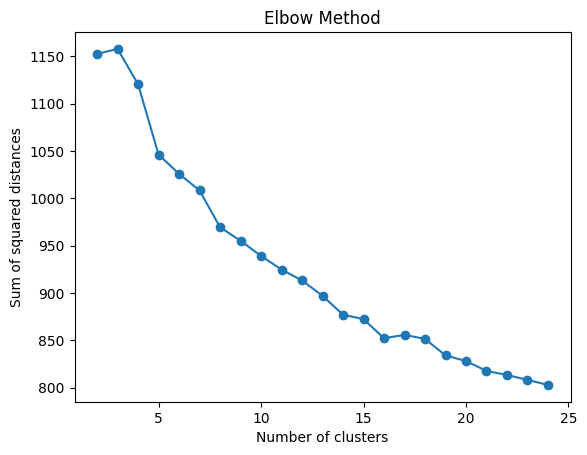

In [717]:
plot_elbow_method(X)

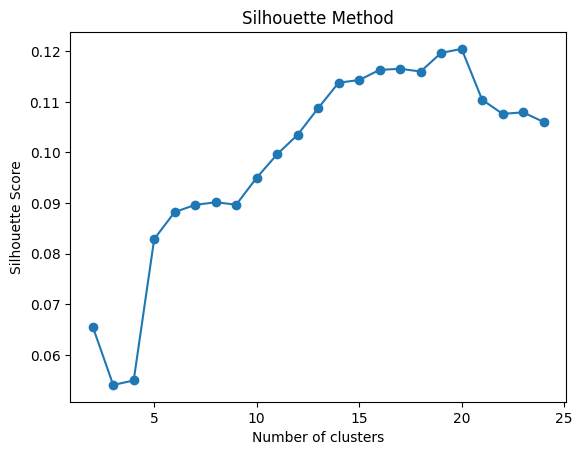

In [718]:
plot_silhouette_method(X)

In [719]:
# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=42)

In [720]:
# Get the cluster labels
labels = kmeans.labels_
print(labels)

[0 6 2 ... 3 2 2]


In [721]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.08963762148989775


In [722]:
# Create a DataFrame to display the results
clustered_docs1 = pd.DataFrame({'Document': st_nlp_cluster['lemmatized_clean_Skills_Statement'], 'Cluster': labels})

In [723]:
merged_df1 = pd.concat([clustered_docs1, tt_nlp_cluster], axis=1)


In [726]:
# Get the unique cluster(s) where 'Data Analyst' appears
# Filter rows where 'ANZSCO Title' is 'Data Scientist'
data_scientist_cluster = merged_df1[merged_df1['ANZSCO Title'] == 'Data Scientist']
data_scientist_cluster1 = merged_df1[merged_df1['ANZSCO Title'] == 'Data Analyst']
data_scientist_cluster2 = merged_df1[merged_df1['ANZSCO Title'] == 'Mathematician']

# Display the cluster(s) where 'Data Scientist' appears
print(data_scientist_cluster[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster1[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster2[['ANZSCO Title', 'Cluster']])




       ANZSCO Title  Cluster
303  Data Scientist        6
     ANZSCO Title  Cluster
301  Data Analyst        3
      ANZSCO Title  Cluster
715  Mathematician        2


In [728]:
data_scientist_clusters1 = merged_df1[merged_df1['ANZSCO Title'] == 'Data Scientist']['Cluster'].unique()

# Create a new DataFrame with only rows in the same cluster(s) as 'Data Analyst'
same_cluster_df1 = merged_df1[merged_df1['Cluster'].isin(data_scientist_clusters1)]

# Display the new DataFrame
print(same_cluster_df1.head())


                                             Document  Cluster  \
1   [apply, industry, standard, guideline, regulat...        6   
22  [pilot, aircraft, across, distance, manage, ta...        6   
23  [administer, health, care, medical, treatment,...        6   
24  [administer, health, care, medical, treatment,...        6   
37  [actively, communicate, others, coordinate, mo...        6   

                                  ANZSCO Title        Occupation Type_x  \
1                             Abattoir Manager  NEC Category Occupation   
22                    Aged and Disabled Carers                 ANZSCO 4   
23                      Aged or Disabled Carer                 ANZSCO 6   
24                     Agricultural Consultant                 ANZSCO 6   
37  Airconditioning and Refrigeration Mechanic                 ANZSCO 6   

    ANZSCO Code_x Sub-Profile Code_x  \
1        149999.0                N01   
22         4231.0               None   
23       423111.0               

In [729]:
# Export same_topic_jobs to an Excel file
same_cluster_df1[['ANZSCO Title', 'Cluster']].to_excel('ST_Cluster_Job.xlsx', index=False)

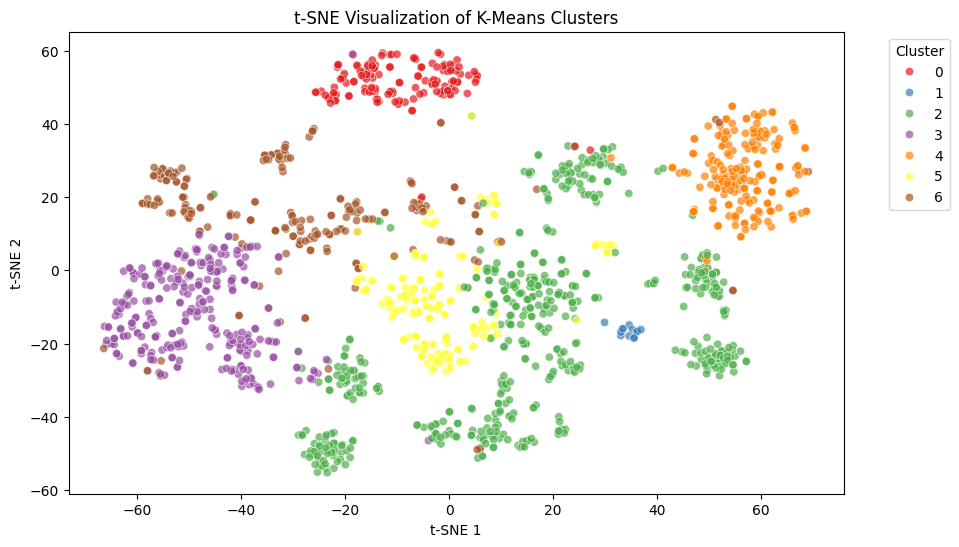

In [730]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Ensure kmeans is trained
#kmeans = KMeans(n_clusters=16, random_state=42, n_init=10)
kmeans_labels = labels  # Assign cluster labels

# 🔹 (Optional) Apply PCA first (use only if X is high-dimensional)
use_pca = False  # Change to True to enable PCA before t-SNE

if use_pca:
    pca = PCA(n_components=50, random_state=42)  # Reduce to 50D before t-SNE
    X_reduced = pca.fit_transform(X.toarray())
else:
    X_reduced = X.toarray()

# 🔹 Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(X_reduced)

# 🔹 Convert to DataFrame for easy plotting
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE 1', 'TSNE 2'])
df_tsne['Cluster'] = kmeans_labels

# 🔹 Plot t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE 1', y='TSNE 2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
